<h1 style="text-align:center;">Quantitative Trading</h1>

<br>

<br>

# 01. Initial Deployment

---

### 01.1. Import the Libraries

In [1]:
# Import the libraries
import requests, time, datetime, pytz, talib, warnings
import yfinance as yf
from tqdm import tqdm
from itertools import compress
import numpy as np
import pandas as pd
from IPython import display

In [2]:
# Import the deep learning libraries
from tensorflow import keras

In [3]:
# Import machine learning libraries
import sklearn
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, HuberRegressor, LassoLars, PassiveAggressiveRegressor, SGDRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
# Import the visualization libraries
import seaborn as sns
import mplfinance as fplt
import matplotlib.pyplot as plt
%matplotlib inline

### 01.2. Customize the Pandas

In [5]:
# Show max rows
pd.set_option('display.max_rows', 200)

In [6]:
# Show max columns
pd.set_option('display.max_columns', None)

In [7]:
# Show 4 decimal point in dataframe
pd.options.display.float_format = "{:,.3f}".format

### 01.3. Customize the Matplotlib

In [8]:
# Set the matplotlib style
plt.style.use("seaborn-darkgrid")

### 01.4. Turn-Off the Warnings

In [9]:
# Turn off all warnings
warnings.filterwarnings('ignore')

<br>

# 02. Load the Dataset 

---

<br>

### 02.1. Yahoo Finance API

In [39]:
def load_dataset_yf(ticker_name, period='max', interval='1d',):
    
    # Set the ticker
    ticker = yf.Ticker(ticker_name)
    
    # Load the dataset
    df = ticker.history(period, interval, prepost=True).reset_index()
    
    # Rename the columns
    df.columns = ['date', 'open', 'high', 'low', 'close', 'volume', 'dividends', 'stock splits']

    # Drop some columns
    df = df.drop(["dividends", "stock splits"], axis=1)
    
    return df

In [11]:
df = load_dataset_yf(ticker_name="SPY", period='max', interval='1d',)
df

,date,open,high,low,close,volume
0,1993-01-29,25.903,25.903,25.774,25.884,1003200
1,1993-02-01,25.903,26.068,25.903,26.068,480500
2,1993-02-02,26.050,26.142,25.995,26.123,201300
3,1993-02-03,26.160,26.418,26.142,26.400,529400
4,1993-02-04,26.492,26.565,26.197,26.510,531500
...,...,...,...,...,...,...
7137,2021-06-03,417.850,419.990,416.280,418.770,58138800
7138,2021-06-04,420.750,422.920,418.840,422.600,55910700
7139,2021-06-07,422.590,422.780,421.190,422.190,51555000
7140,2021-06-08,423.110,423.210,420.320,422.280,47134300


In [12]:
# Set data as index
df = df.set_index("date")
df

,open,high,low,close,volume
date,,,,,
1993-01-29,25.903,25.903,25.774,25.884,1003200
1993-02-01,25.903,26.068,25.903,26.068,480500
1993-02-02,26.050,26.142,25.995,26.123,201300
1993-02-03,26.160,26.418,26.142,26.400,529400
1993-02-04,26.492,26.565,26.197,26.510,531500
...,...,...,...,...,...
2021-06-03,417.850,419.990,416.280,418.770,58138800
2021-06-04,420.750,422.920,418.840,422.600,55910700
2021-06-07,422.590,422.780,421.190,422.190,51555000


<br>

### 02.2. Local Dataset

In [559]:
df = pd.read_csv('./../ES_continuous_adjusted_1min.txt', names=["date", "open", "high", "low", "close", "volume"])
df

,date,open,high,low,close,volume
0,2005-09-06 16:32:00,"1,138.250","1,138.500","1,138.250","1,138.250",98
1,2005-09-06 16:33:00,"1,138.500","1,138.750","1,138.250","1,138.500",423
2,2005-09-06 16:34:00,"1,138.500","1,138.500","1,138.250","1,138.500",131
3,2005-09-06 16:35:00,"1,138.250","1,138.500","1,138.250","1,138.250",274
4,2005-09-06 16:36:00,"1,138.250","1,138.500","1,138.250","1,138.500",46
...,...,...,...,...,...,...
5245980,2021-02-26 16:55:00,"3,806.250","3,806.750","3,806.000","3,806.000",221
5245981,2021-02-26 16:56:00,"3,806.000","3,806.500","3,805.000","3,805.750",385
5245982,2021-02-26 16:57:00,"3,805.750","3,810.000","3,805.500","3,809.500",1181
5245983,2021-02-26 16:58:00,"3,809.500","3,810.000","3,807.750","3,808.750",798


In [ ]:
df["date"] = pd.to_datetime(df["date"])
df

In [ ]:
# Add each date and time into a sperate column
df["year"] = df["date"].map(lambda x: x.year)
df["month"] = df["date"].map(lambda x: x.month)
df["day"] = df["date"].map(lambda x: x.day)
df["day name"] = df["date"].map(lambda x: x.day_name())
df["hour"] = df["date"].map(lambda x: x.hour)
df["minute"] = df["date"].map(lambda x: x.minute)

In [ ]:
df

In [ ]:
# Set data as index
#df = df.set_index("date")
#df

In [476]:
# Get after 2008 only
df = df[df["year"]>=2008].reset_index().iloc[:, 1:]
df

,date,open,high,low,close,volume,year,month,day,day name,hour,minute
0,2008-01-02 06:00:00,"1,273.500","1,275.000","1,273.250","1,274.750",2317,2008,1,2,Wednesday,6,0
1,2008-01-02 06:01:00,"1,274.500","1,275.000","1,274.250","1,275.000",777,2008,1,2,Wednesday,6,1
2,2008-01-02 06:02:00,"1,275.250","1,275.500","1,275.000","1,275.500",593,2008,1,2,Wednesday,6,2
3,2008-01-02 06:03:00,"1,275.500","1,275.750","1,275.250","1,275.500",472,2008,1,2,Wednesday,6,3
4,2008-01-02 06:04:00,"1,275.500","1,275.500","1,275.250","1,275.250",57,2008,1,2,Wednesday,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4572602,2021-02-26 16:55:00,"3,806.250","3,806.750","3,806.000","3,806.000",221,2021,2,26,Friday,16,55
4572603,2021-02-26 16:56:00,"3,806.000","3,806.500","3,805.000","3,805.750",385,2021,2,26,Friday,16,56
4572604,2021-02-26 16:57:00,"3,805.750","3,810.000","3,805.500","3,809.500",1181,2021,2,26,Friday,16,57
4572605,2021-02-26 16:58:00,"3,809.500","3,810.000","3,807.750","3,808.750",798,2021,2,26,Friday,16,58


<br>

# 03. Feature Engineering

---

<br>

### 03.1. Add Indicators

In [13]:
# Add relative volume (i.e. percentage of change in volume)
df["price change"] = df["close"].pct_change()
df

,open,high,low,close,volume,price change
date,,,,,,
1993-01-29,25.903,25.903,25.774,25.884,1003200,NaN
1993-02-01,25.903,26.068,25.903,26.068,480500,0.007
1993-02-02,26.050,26.142,25.995,26.123,201300,0.002
1993-02-03,26.160,26.418,26.142,26.400,529400,0.011
1993-02-04,26.492,26.565,26.197,26.510,531500,0.004
...,...,...,...,...,...,...
2021-06-03,417.850,419.990,416.280,418.770,58138800,-0.004
2021-06-04,420.750,422.920,418.840,422.600,55910700,0.009
2021-06-07,422.590,422.780,421.190,422.190,51555000,-0.001


In [14]:
# Add relative volume (i.e. percentage of change in volume)
df["relative volume"] = df["volume"].pct_change()
df

,open,high,low,close,volume,price change,relative volume
date,,,,,,,
1993-01-29,25.903,25.903,25.774,25.884,1003200,NaN,NaN
1993-02-01,25.903,26.068,25.903,26.068,480500,0.007,-0.521
1993-02-02,26.050,26.142,25.995,26.123,201300,0.002,-0.581
1993-02-03,26.160,26.418,26.142,26.400,529400,0.011,1.630
1993-02-04,26.492,26.565,26.197,26.510,531500,0.004,0.004
...,...,...,...,...,...,...,...
2021-06-03,417.850,419.990,416.280,418.770,58138800,-0.004,0.184
2021-06-04,420.750,422.920,418.840,422.600,55910700,0.009,-0.038
2021-06-07,422.590,422.780,421.190,422.190,51555000,-0.001,-0.078


In [15]:
# Add RSI
time_periods = [14]
for i in time_periods:
    df.loc[:, f"RSI_{i}"] = talib.RSI(df["close"], timeperiod = i)

In [16]:
# Add EMA
time_periods = [9, 20, 50, 200]
for i in time_periods:
    df.loc[:, f"EMA_{i}"] = talib.EMA(df["close"], timeperiod = i)

In [17]:
# Add MACD
df["macd"], df["macdsignal"], df["macdhist"] = talib.MACD(df["close"], fastperiod=12, slowperiod=26, signalperiod=9)

In [18]:
# TODO: Add ATR

In [19]:
# TODO: Add momenum indicato

In [20]:
# TODO: Add Fibonacci 

In [21]:
# TODO: Add more indicators

In [22]:
# Replace infinity with NaN
df = df.replace([np.inf, -np.inf], np.nan)

In [23]:
# Remove rows with NaN values
#df.dropna(inplace=True)

In [24]:
df

,open,high,low,close,volume,price change,relative volume,RSI_14,EMA_9,EMA_20,EMA_50,EMA_200,macd,macdsignal,macdhist
date,,,,,,,,,,,,,,,
1993-01-29,25.903,25.903,25.774,25.884,1003200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-01,25.903,26.068,25.903,26.068,480500,0.007,-0.521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-02,26.050,26.142,25.995,26.123,201300,0.002,-0.581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-03,26.160,26.418,26.142,26.400,529400,0.011,1.630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-04,26.492,26.565,26.197,26.510,531500,0.004,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-03,417.850,419.990,416.280,418.770,58138800,-0.004,0.184,55.524,418.526,416.901,410.753,376.796,2.120,2.047,0.072
2021-06-04,420.750,422.920,418.840,422.600,55910700,0.009,-0.038,60.972,419.341,417.444,411.217,377.252,2.326,2.103,0.223
2021-06-07,422.590,422.780,421.190,422.190,51555000,-0.001,-0.078,60.123,419.911,417.896,411.648,377.699,2.429,2.168,0.261


<br>

### 03.2. Add Trendlines and Support Resistance Lines

##### Horizontal 

In [25]:
temp_df = df.iloc[-350:-250]

In [26]:
def isSupport(df,i):
    support = df['low'][i] < df['low'][i-1]  and df['low'][i] < df['low'][i+1] \
    and df['low'][i+1] < df['low'][i+2] and df['low'][i-1] < df['low'][i-2]

    return support

def isResistance(df,i):
    resistance = df['high'][i] > df['high'][i-1]  and df['high'][i] > df['high'][i+1] \
    and df['high'][i+1] > df['high'][i+2] and df['high'][i-1] > df['high'][i-2] 

    return resistance

def isFarFromLevel(l, s, levels):
    return np.sum([abs(l-x) < s  for x in levels]) == 0

In [27]:
def find_levels(temp_df, remove_near_lines = True):
    
    s =  np.mean(temp_df['high'] - temp_df['low'])
    
    levels = []
    for i in range(2, temp_df.shape[0]-2):
        if isSupport(temp_df,i):
            l = temp_df['low'][i]

            if remove_near_lines:
                if isFarFromLevel(l, s, levels):
                    levels.append((i,l))
            else:
                levels.append((i,l))

        elif isResistance(temp_df,i):
            l = temp_df['high'][i]

            if remove_near_lines:
                if isFarFromLevel(l, s, levels):
                    levels.append((i,l))
            else:
                levels.append((i,l))
                
    return levels

In [28]:
levels = find_levels(temp_df, remove_near_lines = True)

In [29]:
levels

[(4, 315.71084011580734),
 (14, 324.0571283993988),
 (27, 279.39027227107704),
 (29, 307.08078260424384),
 (43, 214.81508310580784),
 (49, 259.1737234470435),
 (63, 267.7265487449145),
 (69, 290.22574694620056)]

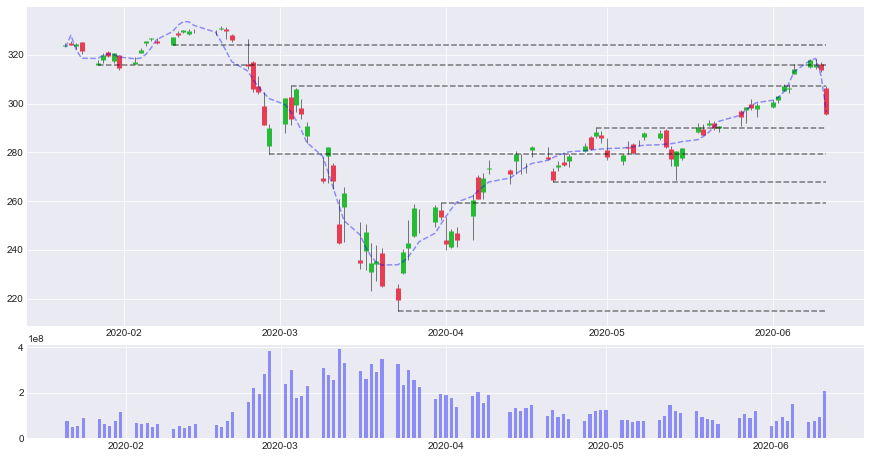

In [30]:
### TOP PLT

top_plt = plt.subplot2grid(shape=(5,4), loc=(0, 0), rowspan=3, colspan=4)

# Vertical lines from low to high
top_plt.vlines(temp_df.index, temp_df["low"], temp_df["high"], alpha=0.5, linewidth=1, color="black")

# Green candle
green_df = temp_df[temp_df["open"]<temp_df["close"]]
top_plt.vlines(green_df.index, green_df["open"], green_df["close"], alpha=1, linewidth=5, color="#27ba36")

# Red candle
red_df = temp_df[temp_df["open"]>temp_df["close"]]
top_plt.vlines(red_df.index, red_df["open"], red_df["close"], alpha=1, linewidth=5, color="#e83c53")

# Draw horizontal support and resistance lines
for level in levels:
    top_plt.hlines(level[1], xmin=temp_df.index.values[level[0]], xmax=max(temp_df.index.values), 
                   linestyles="dashed", colors='black', alpha=0.5)

# Draw trendline    
x = temp_df["close"].reset_index().iloc[:, 1:].index.to_list()
y = list(temp_df["close"].reset_index().iloc[:, 1:].values.reshape(-1))
z = np.polyfit(x, y, 20)
p = np.poly1d(z)
top_plt.plot(temp_df.index, p(x), "--", color="blue", alpha=0.4)        
    
    
### BOTTOM PLT

bottom_plt = plt.subplot2grid(shape=(5,4), loc=(3, 0), rowspan=1, colspan=4)
bottom_plt.bar(temp_df.index.values, temp_df.volume, color="blue", alpha=0.4, width=0.6)


plt.gcf().set_size_inches(15,10)

##### With Slope

In [31]:
from scipy.signal import savgol_filter
import math
from sklearn.linear_model import LinearRegression

In [32]:
temp_df = df.iloc[:40]

In [33]:
def support_resistance_line(price_series):
    
    def pythag(pt1, pt2):
        a_sq = (pt2[0] - pt1[0]) ** 2
        b_sq = (pt2[1] - pt1[1]) ** 2
        return math.sqrt(a_sq + b_sq)
    
    def regression_ceof(pts):
        X = np.array([pt[0] for pt in pts]).reshape(-1, 1)
        y = np.array([pt[1] for pt in pts])
        model = LinearRegression()
        model.fit(X, y)
        return model.coef_[0], model.intercept_
    
    def local_min_max(pts):
        local_min = []
        local_max = []
        prev_pts = [(0, pts[0]), (1, pts[1])]
        for i in range(1, len(pts) - 1):
            append_to = ''
            if pts[i-1] > pts[i] < pts[i+1]:
                append_to = 'min'
            elif pts[i-1] < pts[i] > pts[i+1]:
                append_to = 'max'
            if append_to:
                if local_min or local_max:
                    prev_distance = pythag(prev_pts[0], prev_pts[1]) * 0.5
                    curr_distance = pythag(prev_pts[1], (i, pts[i]))
                    if curr_distance >= prev_distance:
                        prev_pts[0] = prev_pts[1]
                        prev_pts[1] = (i, pts[i])
                        if append_to == 'min':
                            local_min.append((i, pts[i]))
                        else:
                            local_max.append((i, pts[i]))
                else:
                    prev_pts[0] = prev_pts[1]
                    prev_pts[1] = (i, pts[i])
                    if append_to == 'min':
                        local_min.append((i, pts[i]))
                    else:
                        local_max.append((i, pts[i]))
        return local_min, local_max
    
    
    
    month_diff = price_series.shape[0] // 30 # Integer divide the number of prices we have by 30
    if month_diff == 0: # We want a value greater than 0
        month_diff = 1
    smooth = int(2 * month_diff + 3) # Simple algo to determine smoothness
    pts = savgol_filter(x=price_series, window_length=smooth, polyorder=3) # Get the smoothened price data
    
    pts = savgol_filter(x=price_series, window_length=9, polyorder=5) # Get the smoothened price data
    
    local_min, local_max = local_min_max(pts)

    local_min_slope, local_min_int = regression_ceof(local_min)
    local_max_slope, local_max_int = regression_ceof(local_max)
    support = (local_min_slope * np.array(price_series.reset_index().iloc[:, 1:].index)) + local_min_int
    resistance = (local_max_slope * np.array(price_series.reset_index().iloc[:, 1:].index)) + local_max_int
    
    return support, resistance

In [34]:
support, _ = support_resistance_line(price_series=temp_df["low"])
_, resistance = support_resistance_line(price_series=temp_df["high"])

In [35]:
def visualize(temp_df, support, resistance):
    
    ### TOP PLT

    top_plt = plt.subplot2grid(shape=(5,4), loc=(0, 0), rowspan=3, colspan=4)

    # Vertical lines from low to high
    top_plt.vlines(temp_df.index, temp_df["low"], temp_df["high"], alpha=0.5, linewidth=1, color="black")

    # Green candle
    green_df = temp_df[temp_df["open"]<temp_df["close"]]
    top_plt.vlines(green_df.index, green_df["open"], green_df["close"], alpha=1, linewidth=5, color="#27ba36")

    # Red candle
    red_df = temp_df[temp_df["open"]>temp_df["close"]]
    top_plt.vlines(red_df.index, red_df["open"], red_df["close"], alpha=1, linewidth=5, color="#e83c53")

    # Draw trendline    
    #top_plt.plot(temp_df.index, pts)
    top_plt.plot(temp_df.index, support, c='r')
    top_plt.plot(temp_df.index, resistance, c='g')     


    ### BOTTOM PLT

    bottom_plt = plt.subplot2grid(shape=(5,4), loc=(3, 0), rowspan=1, colspan=4)
    bottom_plt.bar(temp_df.index.values, temp_df.volume, color="blue", alpha=0.4, width=0.6)

    plt.gcf().set_size_inches(15,10)

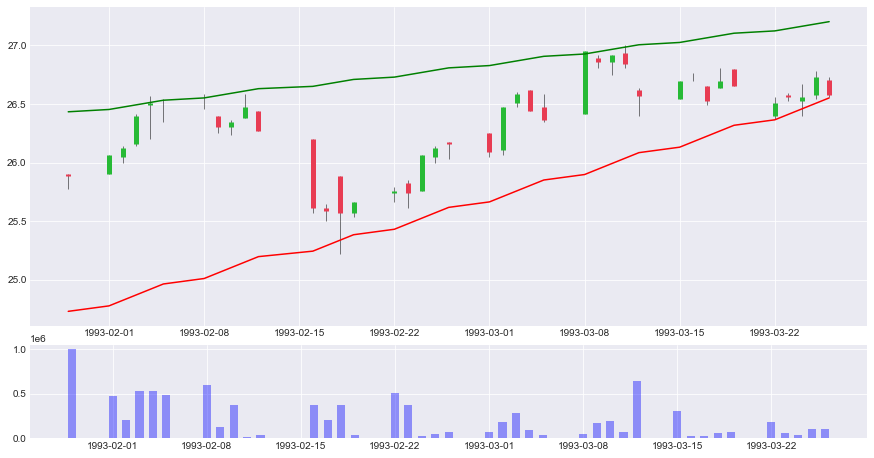

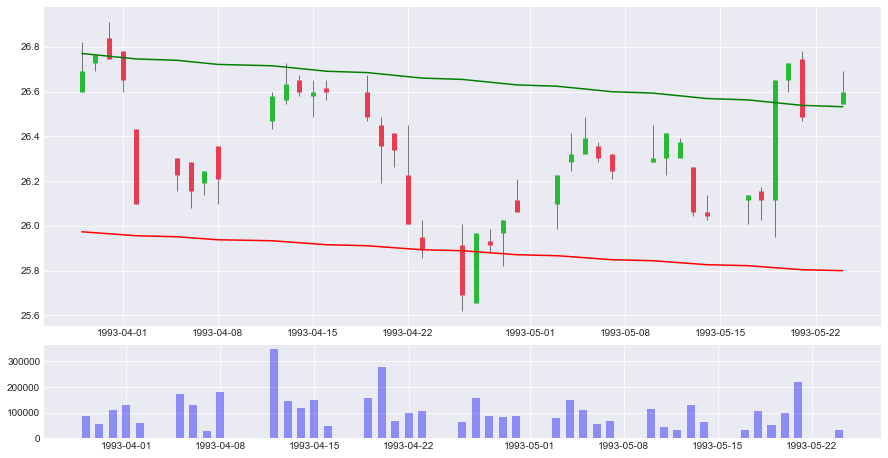

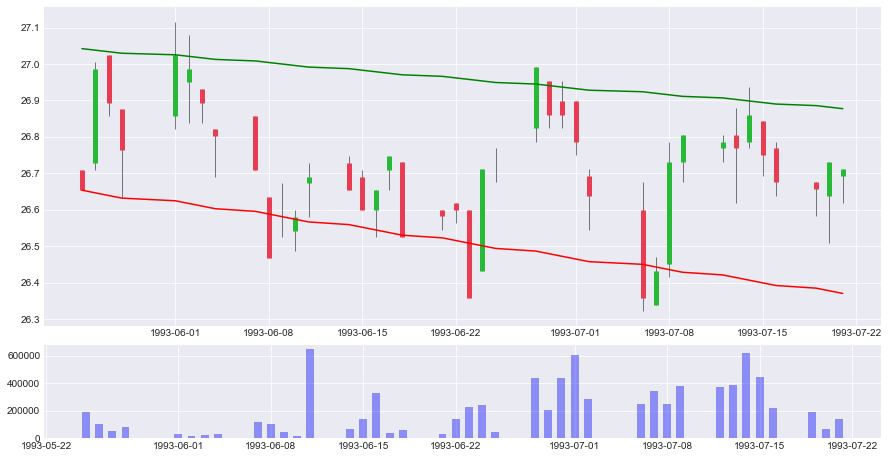

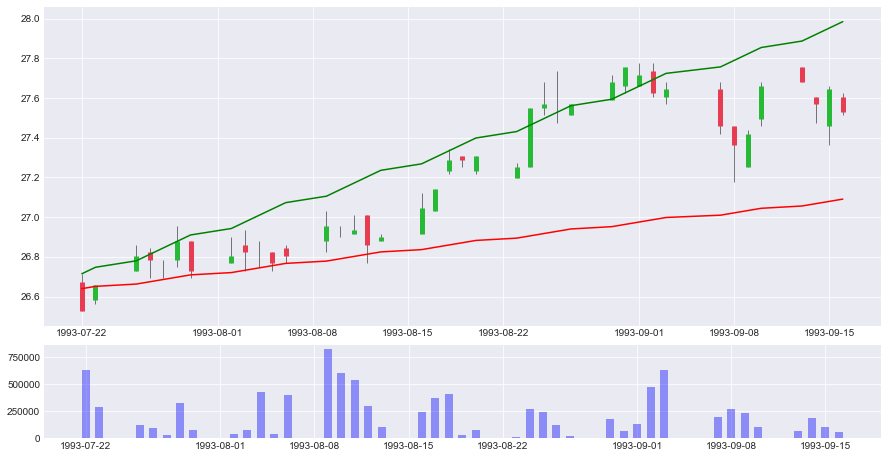

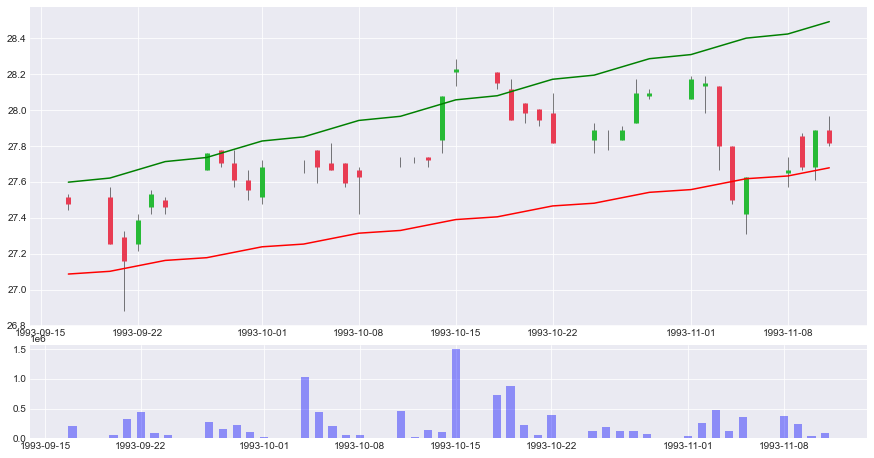

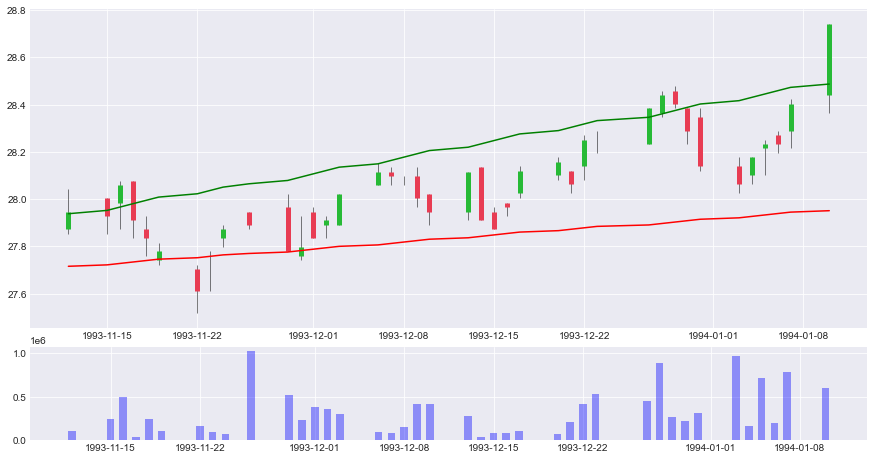

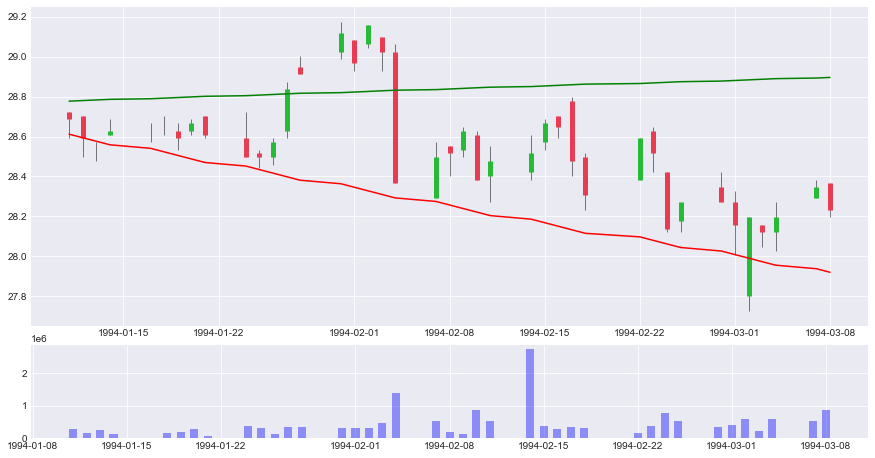

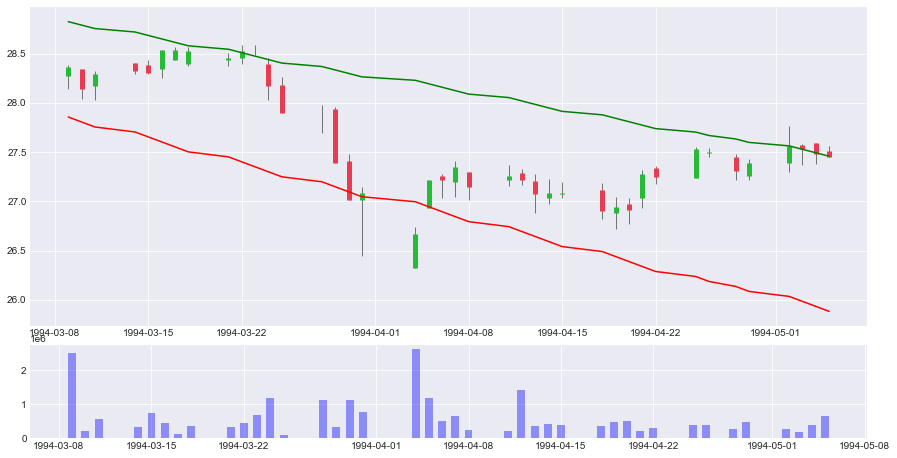

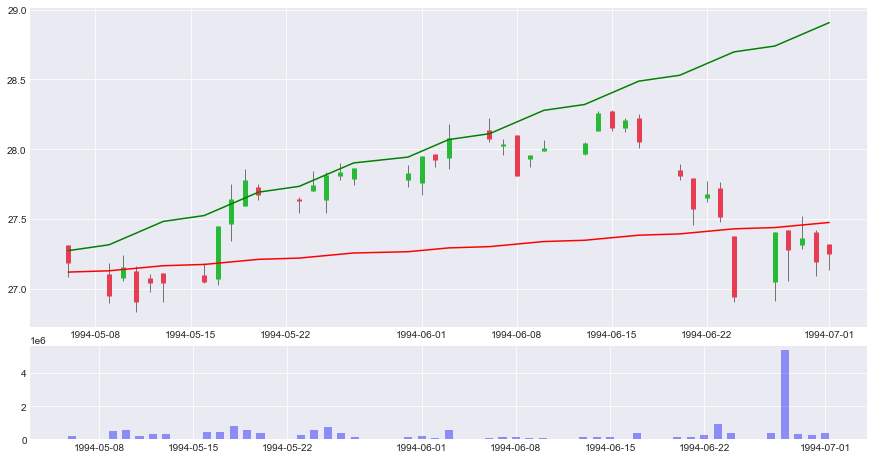

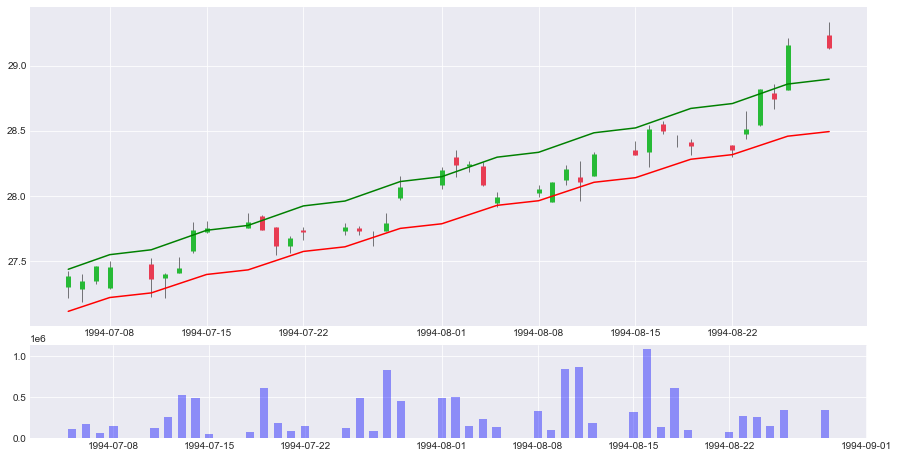

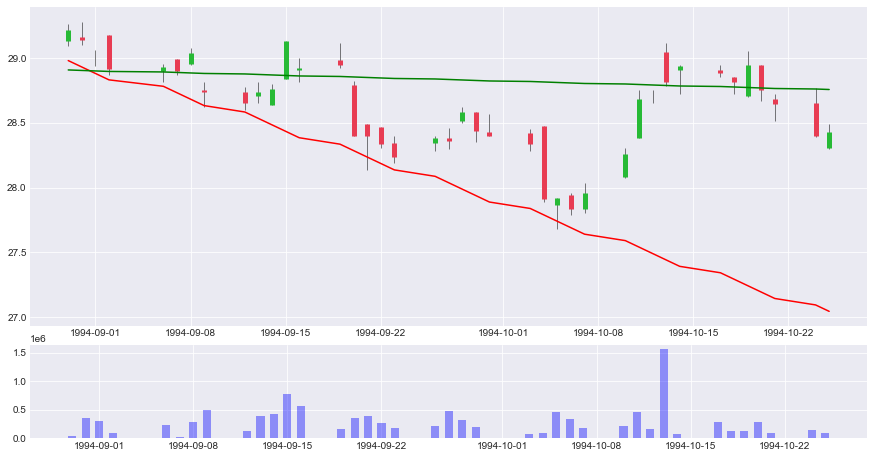

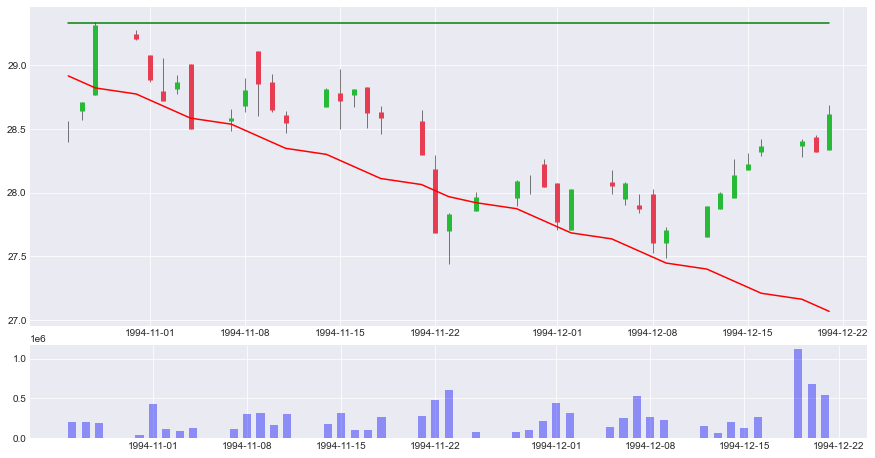

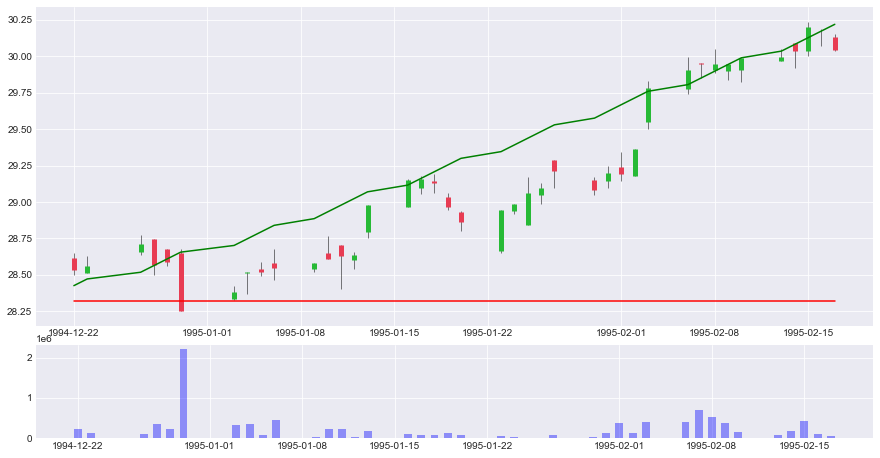

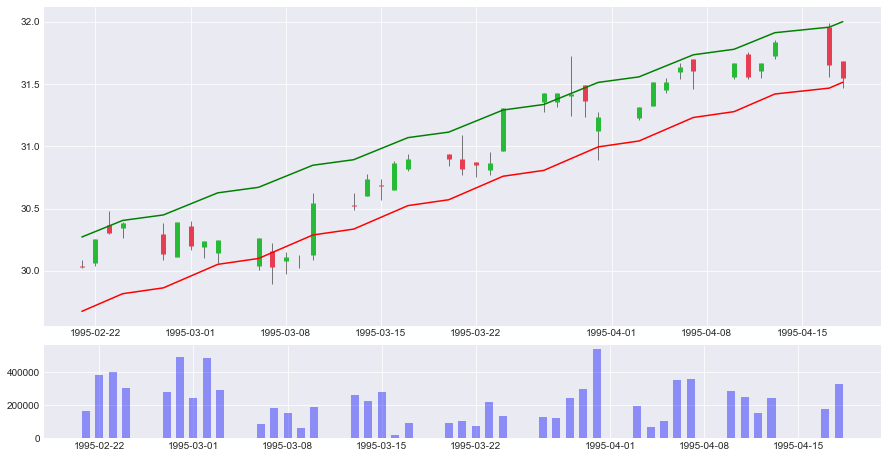

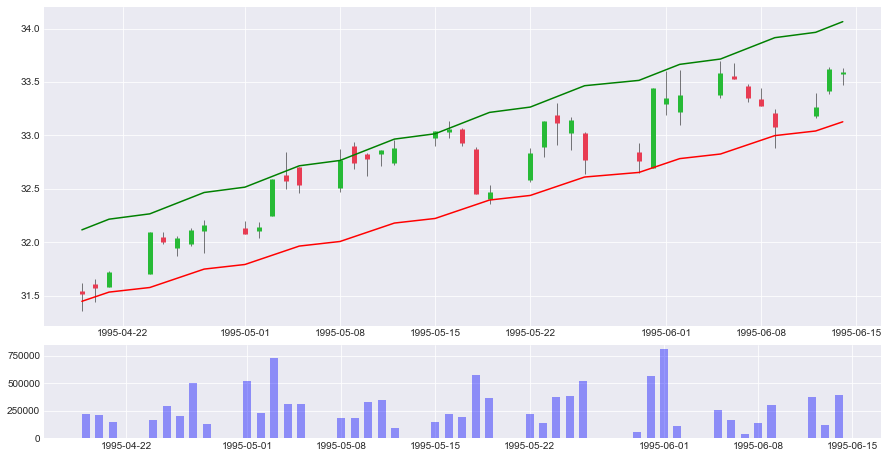

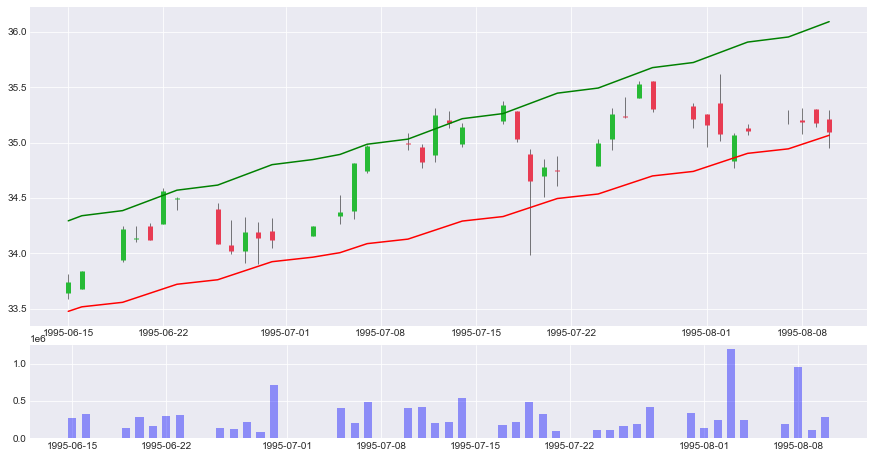

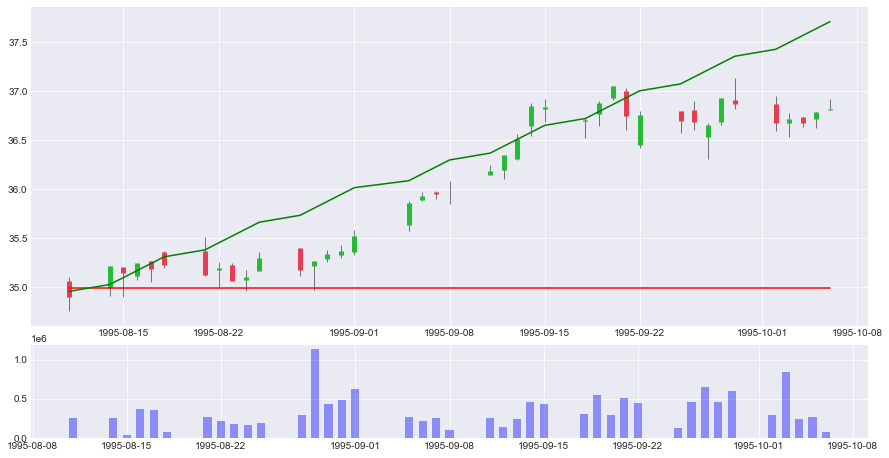

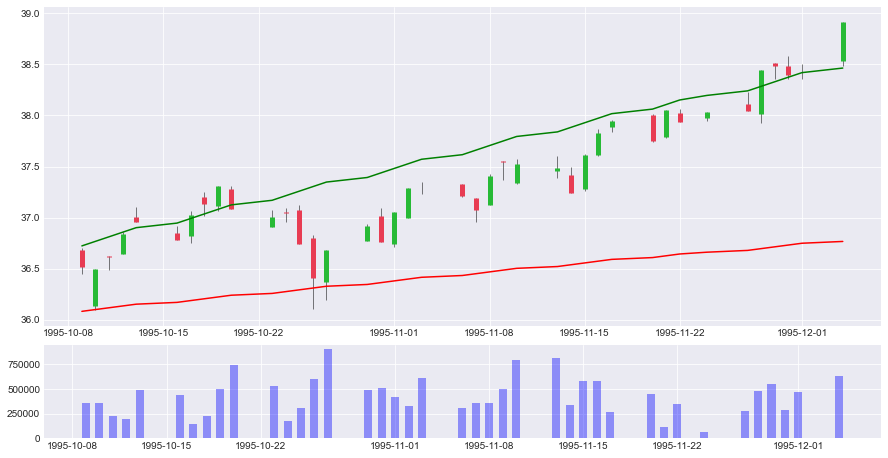

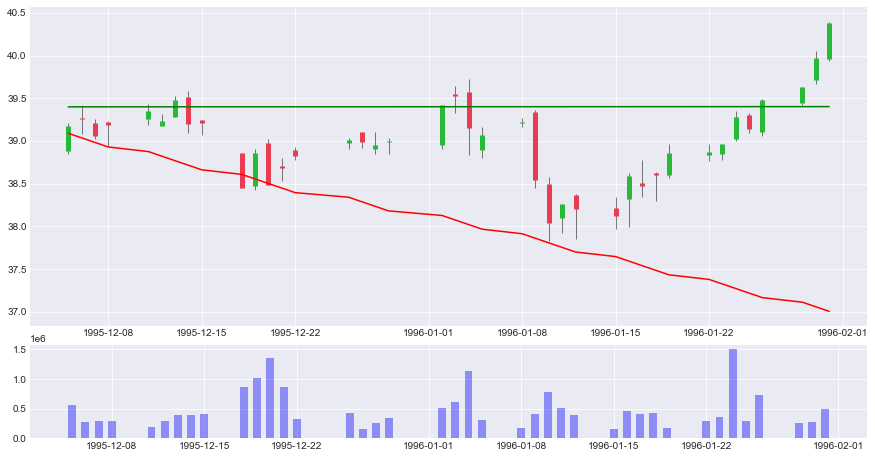

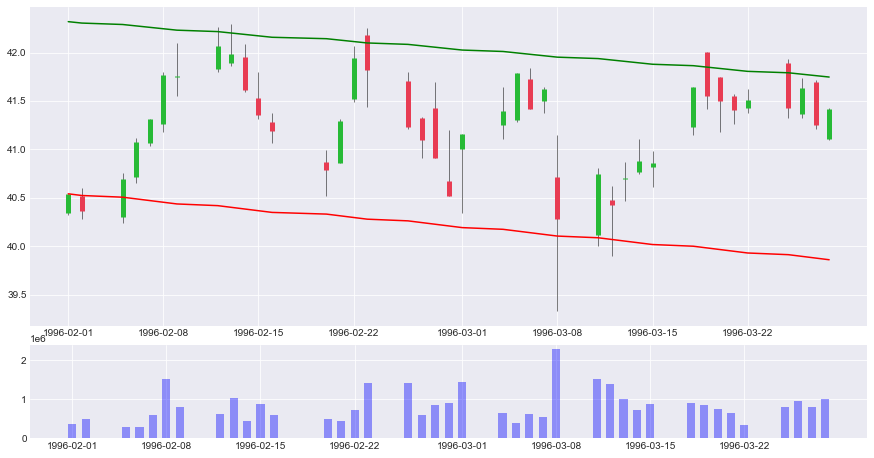

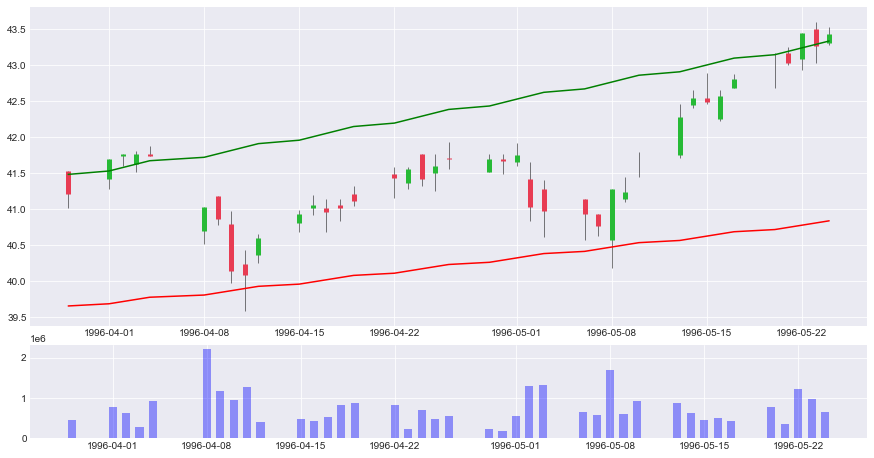

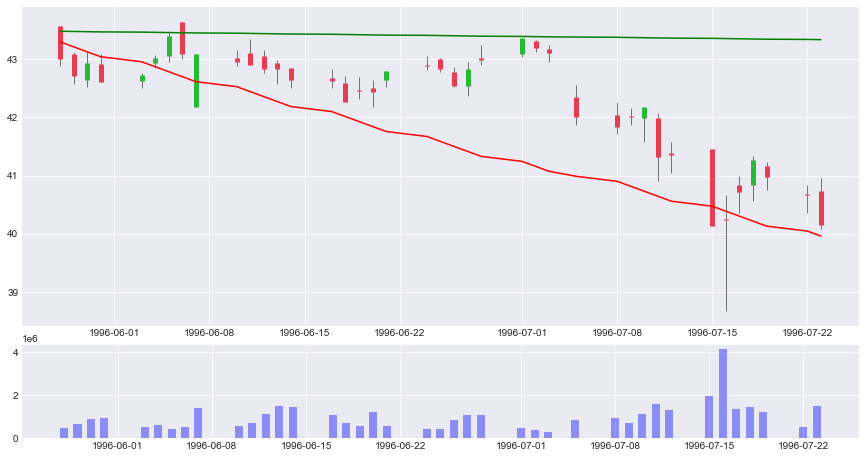

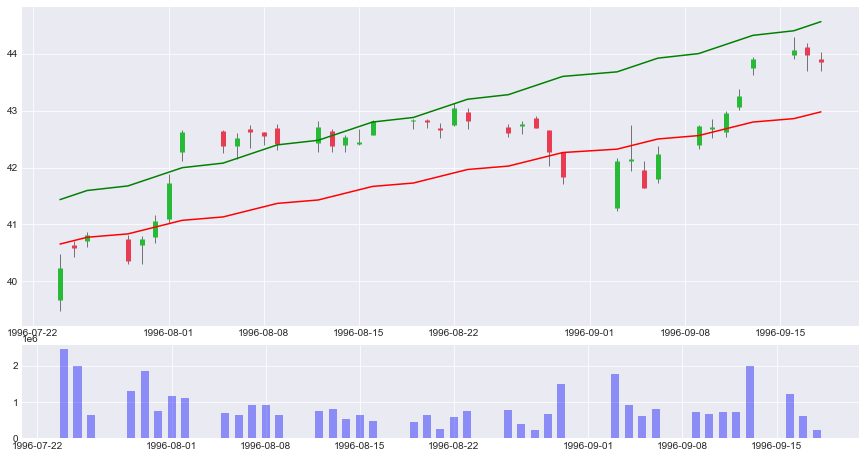

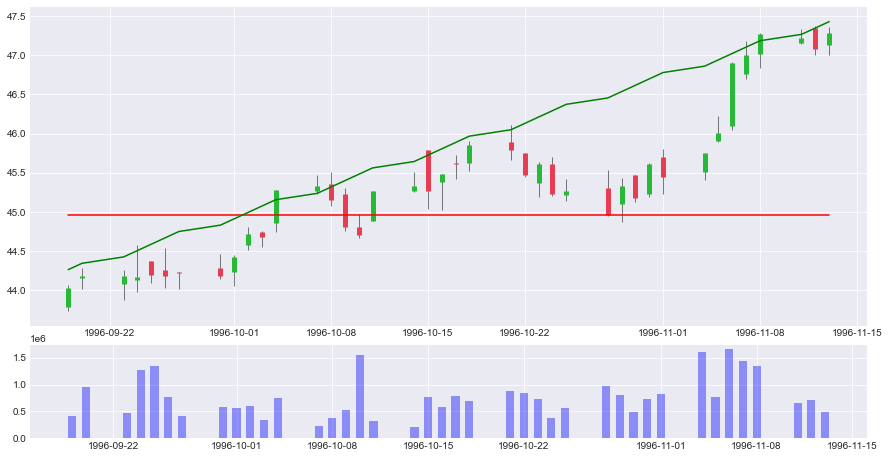

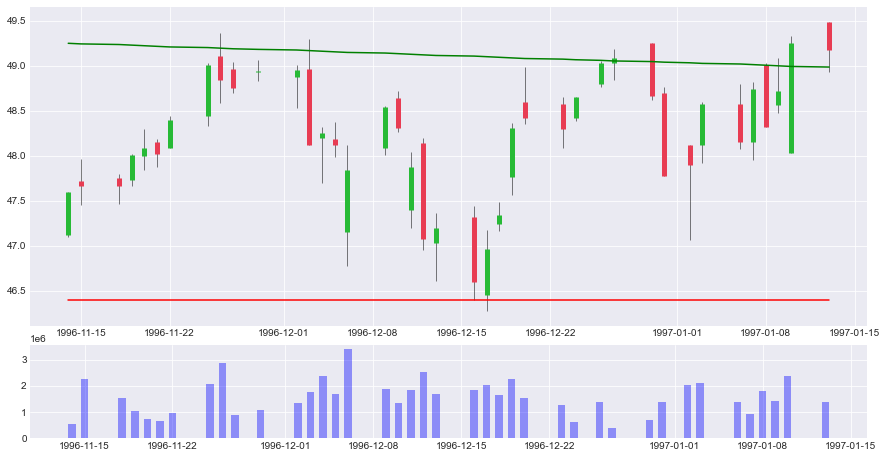

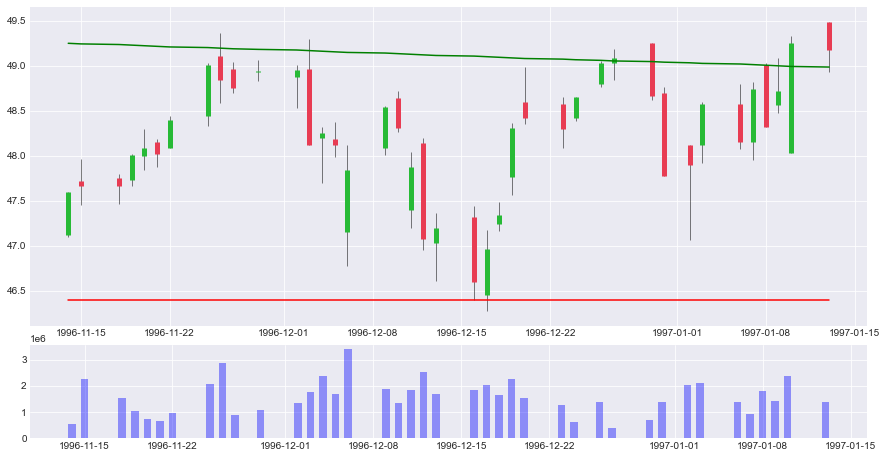

In [36]:
for i in range(0, 1000, 40):

    temp_df = df.iloc[i:i+40]

    support, _ = support_resistance_line(price_series=temp_df["low"])
    _, resistance = support_resistance_line(price_series=temp_df["high"])

    visualize(temp_df, support, resistance)
    display.display(plt.gcf())

<br>

### 03.3. Add Correlated Asset Classes

In [40]:
# Add future S&P 500
spy_futures = load_dataset_yf(ticker_name="ES=F")
df = df.merge(spy_futures[["date", "close"]].rename({"close":"s&p futures price"}, axis=1), on="date")

In [41]:
# Add gold price
gold = load_dataset_yf(ticker_name="GLD")
df = df.merge(gold[["date", "close"]].rename({"close":"gold price"}, axis=1), on="date")

In [42]:
# Add gold future price
gold_futures = load_dataset_yf(ticker_name="GC=F")
df = df.merge(gold_futures[["date", "close"]].rename({"close":"gold futures price"}, axis=1), on="date")

In [43]:
# Add tresury bond 20 years price
bond = load_dataset_yf(ticker_name="TLT")
df = df.merge(bond[["date", "close"]].rename({"close":"20 years treasury bond"}, axis=1), on="date")

In [44]:
# TODO: Add more assets

In [45]:
df.head()

,date,open,high,low,close,volume,price change,relative volume,RSI_14,EMA_9,EMA_20,EMA_50,EMA_200,macd,macdsignal,macdhist,s&p futures price,gold price,gold futures price,20 years treasury bond
0,2004-11-18,85.450,85.645,85.234,85.602,31854300,0.001,-0.415,72.189,84.787,83.563,82.000,79.712,1.303,1.077,0.226,"1,185.000",44.380,442.600,52.069
1,2004-11-19,85.573,85.587,84.448,84.650,54276500,-0.011,0.704,61.991,84.759,83.666,82.104,79.761,1.226,1.107,0.119,"1,172.250",44.780,446.800,51.653
2,2004-11-22,84.470,85.155,84.369,85.054,37560200,0.005,-0.308,64.296,84.818,83.798,82.220,79.814,1.184,1.122,0.062,"1,178.000",44.950,448.800,51.922
3,2004-11-23,85.018,85.256,84.614,85.184,41968800,0.002,0.117,65.029,84.891,83.930,82.336,79.867,1.148,1.128,0.021,"1,179.250",44.750,447.800,51.987
4,2004-11-24,85.263,85.494,85.104,85.386,29724800,0.002,-0.292,66.194,84.990,84.069,82.456,79.922,1.123,1.127,-0.004,"1,182.000",45.050,449.300,51.987


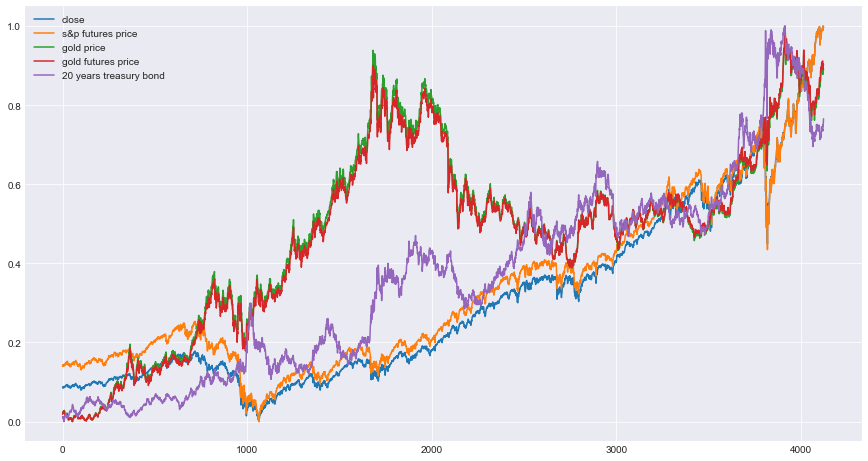

<AxesSubplot:>

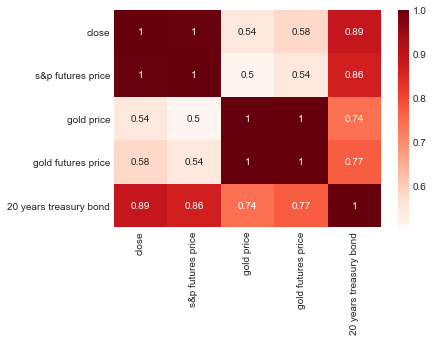

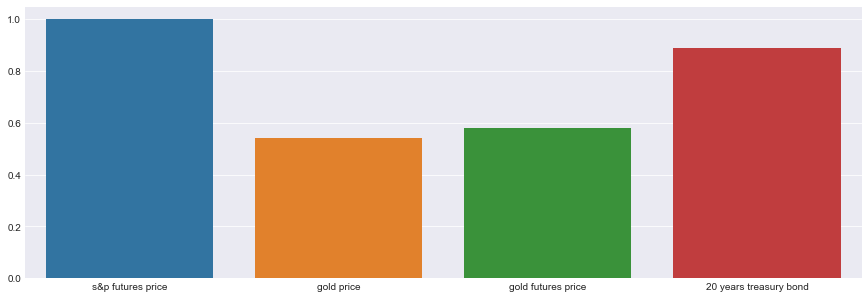

In [46]:
### Visualize the normalized prices

# Get the df
temp_df = df[["close", "s&p futures price", "gold price", "gold futures price", "20 years treasury bond"]]

# Get the scaler
scaler = sklearn.preprocessing.MinMaxScaler()
prices = scaler.fit_transform(temp_df.values)
temp_df = pd.DataFrame(prices, columns=temp_df.columns)

# Plot the prices
temp_df.plot(figsize=(15, 8))

# Plot
plt.show()

# Plot the correlation heatmap
sns.heatmap(temp_df.corr(), annot=True, cmap="Reds")

# Plot the correlated percentage to close prices
plt.figure(figsize=(15, 5))
sns.barplot(temp_df.corr()["close"][1:].index, temp_df.corr()["close"][1:].values, )

<br>

### 03.4. Add Candlestick Patterns

In [47]:
def add_candlestick_patterns(df):
    
    # Get the name of all the candle patterns in talib
    candle_names = talib.get_function_groups()['Pattern Recognition']
    
    # Dictionary for mapping the names into the pattern names
    candlestick_name_mapper = {"CDL2CROWS": "Two Crows", "CDL3BLACKCROWS":"Three Black Crows", "CDL3INSIDE":"Three Inside Up/Down", "CDL3LINESTRIKE":"Three-Line Strike", "CDL3OUTSIDE":"Three Outside Up/Down", "CDL3STARSINSOUTH":"Three Stars In The South", "CDL3WHITESOLDIERS":"Three Advancing White Soldiers", "CDLABANDONEDBABY":"Abandoned Baby", "CDLADVANCEBLOCK":"Advance Block", "CDLBELTHOLD":"Belt-hold", "CDLBREAKAWAY":"Breakaway", "CDLCLOSINGMARUBOZU":"Closing Marubozu", "CDLCONCEALBABYSWALL":"Concealing Baby Swallow", "CDLCOUNTERATTACK":"Counterattack", "CDLDARKCLOUDCOVER":"Dark Cloud Cover", "CDLDOJI":"Doji", "CDLDOJISTAR":"Doji Star", "CDLDRAGONFLYDOJI":"Dragonfly Doji", "CDLENGULFING":"Engulfing Pattern", "CDLEVENINGDOJISTAR":"Evening Doji Star", "CDLEVENINGSTAR":"Evening Star", "CDLGAPSIDESIDEWHITE":"Up/Down-gap side-by-side white lines", "CDLGRAVESTONEDOJI":"Gravestone Doji", "CDLHAMMER":"Hammer", "CDLHANGINGMAN":"Hanging Man", "CDLHARAMI":"Harami Pattern", "CDLHARAMICROSS":"Harami Cross Pattern", "CDLHIGHWAVE":"High-Wave Candle", "CDLHIKKAKE":"Hikkake Pattern", "CDLHIKKAKEMOD":"Modified Hikkake Pattern", "CDLHOMINGPIGEON":"Homing Pigeon", "CDLIDENTICAL3CROWS":"Identical Three Crows", "CDLINNECK":"In-Neck Pattern", "CDLINVERTEDHAMMER":"Inverted Hammer", "CDLKICKING":"Kicking", "CDLKICKINGBYLENGTH":"Kicking - bull/bear determined by the longer marubozu", "CDLLADDERBOTTOM":"Ladder Bottom", "CDLLONGLEGGEDDOJI":"Long Legged Doji", "CDLLONGLINE":"Long Line Candle", "CDLMARUBOZU":"Marubozu", "CDLMATCHINGLOW":"Matching Low", "CDLMATHOLD":"Mat Hold", "CDLMORNINGDOJISTAR":"Morning Doji Star", "CDLMORNINGSTAR":"Morning Star", "CDLONNECK":"On-Neck Pattern", "CDLPIERCING":"Piercing Pattern", "CDLRICKSHAWMAN":"Rickshaw Man", "CDLRISEFALL3METHODS":"Rising/Falling Three Methods", "CDLSEPARATINGLINES":"Separating Lines", "CDLSHOOTINGSTAR":"Shooting Star", "CDLSHORTLINE":"Short Line Candle", "CDLSPINNINGTOP":"Spinning Top", "CDLSTALLEDPATTERN":"Stalled Pattern", "CDLSTICKSANDWICH":"Stick Sandwich", "CDLTAKURI":"Takuri (Dragonfly Doji with very long lower shadow)", "CDLTASUKIGAP":"Tasuki Gap", "CDLTHRUSTING":"Thrusting Pattern", "CDLTRISTAR":"Tristar Pattern", "CDLUNIQUE3RIVER":"Unique 3 River", "CDLUPSIDEGAP2CROWS":"Upside Gap Two Crows","CDLXSIDEGAP3METHODS":"Upside/Downside Gap Three Methods",}
    
    # Initialize a column for candlestick pattern
    df["candlestick pattern"] = np.nan

    # Loop over different candle names
    for candle in tqdm(candle_names):

        # Get the df that shows at which point we have the given candle pattern
        temp_df = getattr(talib, candle)(df['open'], df['high'], df['low'], df['close'])

        # Only get the rows that the pattern exists
        temp_df = temp_df[temp_df!=0]

        # Loop over the rows of temp_df
        for i_index, i_row in pd.DataFrame(temp_df, columns=["value"]).iterrows():

            # If value is positive (bullish)
            if i_row["value"] > 0:

                # If there is already a pattern exist
                if isinstance(df.loc[i_index, "candlestick pattern"], str):
                    df.loc[i_index, "candlestick pattern"] = df.loc[i_index, "candlestick pattern"] + " / " + candlestick_name_mapper[candle] + " - Bullish"

                # If this is the first found pattern
                else:
                    df.loc[i_index, "candlestick pattern"] = candlestick_name_mapper[candle] + " - Bullish"

            # If value is negative (bearish)
            else:


                # If there is already a pattern exist
                if isinstance(df.loc[i_index, "candlestick pattern"], str):
                    df.loc[i_index, "candlestick pattern"] = df.loc[i_index, "candlestick pattern"] + " / " + candlestick_name_mapper[candle] + " - Bearish"

                # If this is the first found pattern
                else:
                    df.loc[i_index, "candlestick pattern"] = candlestick_name_mapper[candle] + " - Bearish"


    return df

In [48]:
df = add_candlestick_patterns(df)
df

100%|██████████████████████████████████████████████████████████████████████████████████| 61/61 [00:02<00:00, 20.77it/s]


,date,open,high,low,close,volume,price change,relative volume,RSI_14,EMA_9,EMA_20,EMA_50,EMA_200,macd,macdsignal,macdhist,s&p futures price,gold price,gold futures price,20 years treasury bond,candlestick pattern
0,2004-11-18,85.450,85.645,85.234,85.602,31854300,0.001,-0.415,72.189,84.787,83.563,82.000,79.712,1.303,1.077,0.226,"1,185.000",44.380,442.600,52.069,NaN
1,2004-11-19,85.573,85.587,84.448,84.650,54276500,-0.011,0.704,61.991,84.759,83.666,82.104,79.761,1.226,1.107,0.119,"1,172.250",44.780,446.800,51.653,NaN
2,2004-11-22,84.470,85.155,84.369,85.054,37560200,0.005,-0.308,64.296,84.818,83.798,82.220,79.814,1.184,1.122,0.062,"1,178.000",44.950,448.800,51.922,NaN
3,2004-11-23,85.018,85.256,84.614,85.184,41968800,0.002,0.117,65.029,84.891,83.930,82.336,79.867,1.148,1.128,0.021,"1,179.250",44.750,447.800,51.987,NaN
4,2004-11-24,85.263,85.494,85.104,85.386,29724800,0.002,-0.292,66.194,84.990,84.069,82.456,79.922,1.123,1.127,-0.004,"1,182.000",45.050,449.300,51.987,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4120,2021-06-03,417.850,419.990,416.280,418.770,58138800,-0.004,0.184,55.524,418.526,416.901,410.753,376.796,2.120,2.047,0.072,"4,191.250",175.270,"1,871.200",138.010,Hikkake Pattern - Bullish / Spinning Top - Bul...
4121,2021-06-04,420.750,422.920,418.840,422.600,55910700,0.009,-0.038,60.972,419.341,417.444,411.217,377.252,2.326,2.103,0.223,"4,228.250",177.160,"1,889.800",139.900,Hikkake Pattern - Bullish
4122,2021-06-07,422.590,422.780,421.190,422.190,51555000,-0.001,-0.078,60.123,419.911,417.896,411.648,377.699,2.429,2.168,0.261,"4,225.500",177.870,"1,896.800",139.470,Harami Pattern - Bearish
4123,2021-06-08,423.110,423.210,420.320,422.280,47134300,0.000,-0.086,60.254,420.385,418.313,412.065,378.142,2.489,2.232,0.257,"4,225.750",177.320,"1,892.200",140.450,Hanging Man - Bearish / Matching Low - Bullish


In [49]:
temp_df = df.iloc[:50]

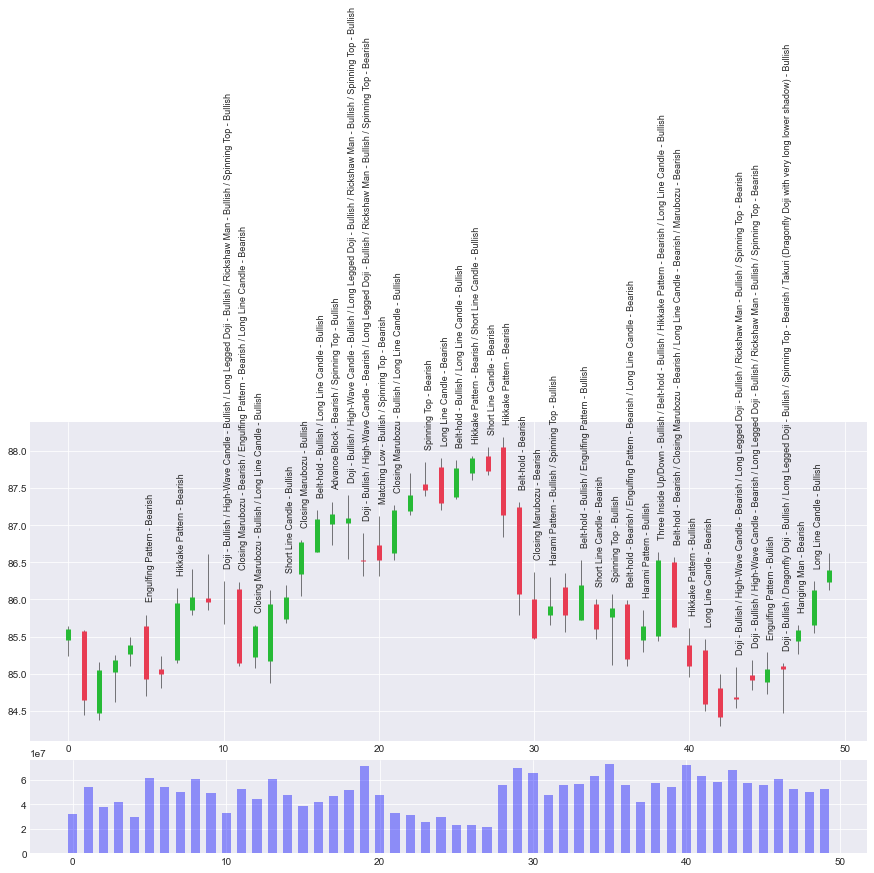

In [50]:
### TOP PLT

top_plt = plt.subplot2grid(shape=(5,4), loc=(0, 0), rowspan=3, colspan=4)

# Vertical lines from low to high
top_plt.vlines(temp_df.index, temp_df["low"], temp_df["high"], alpha=0.5, linewidth=1, color="black")

# Green candle
green_df = temp_df[temp_df["open"]<temp_df["close"]]
top_plt.vlines(green_df.index, green_df["open"], green_df["close"], alpha=1, linewidth=5, color="#27ba36")

# Red candle
red_df = temp_df[temp_df["open"]>temp_df["close"]]
top_plt.vlines(red_df.index, red_df["open"], red_df["close"], alpha=1, linewidth=5, color="#e83c53")

# Plot the texts
for i in range(len(temp_df)):
    if isinstance(temp_df["candlestick pattern"][i], str):
        plt.text(x=temp_df.index.values[i], 
                 y=temp_df.high[i]+0.2, 
                 s=temp_df["candlestick pattern"][i], 
                 rotation=90, 
                 fontdict={"size":9}) 
    
    
### BOTTOM PLT

bottom_plt = plt.subplot2grid(shape=(5,4), loc=(3, 0), rowspan=1, colspan=4)
bottom_plt.bar(temp_df.index.values, temp_df.volume, color="blue", alpha=0.4, width=0.6)


plt.gcf().set_size_inches(15,10)

### TODO: Convert Candlestick words into digit numbers so it will take less space.

In [51]:
def add_candlestick_patterns_in_int(df):
    
    # Get the name of all the candle patterns in talib
    candle_names = talib.get_function_groups()['Pattern Recognition']
    
    # Dictionary for mapping the names into the pattern names
    candlestick_name_mapper = {"CDL2CROWS": "Two Crows", "CDL3BLACKCROWS":"Three Black Crows", "CDL3INSIDE":"Three Inside Up/Down", "CDL3LINESTRIKE":"Three-Line Strike", "CDL3OUTSIDE":"Three Outside Up/Down", "CDL3STARSINSOUTH":"Three Stars In The South", "CDL3WHITESOLDIERS":"Three Advancing White Soldiers", "CDLABANDONEDBABY":"Abandoned Baby", "CDLADVANCEBLOCK":"Advance Block", "CDLBELTHOLD":"Belt-hold", "CDLBREAKAWAY":"Breakaway", "CDLCLOSINGMARUBOZU":"Closing Marubozu", "CDLCONCEALBABYSWALL":"Concealing Baby Swallow", "CDLCOUNTERATTACK":"Counterattack", "CDLDARKCLOUDCOVER":"Dark Cloud Cover", "CDLDOJI":"Doji", "CDLDOJISTAR":"Doji Star", "CDLDRAGONFLYDOJI":"Dragonfly Doji", "CDLENGULFING":"Engulfing Pattern", "CDLEVENINGDOJISTAR":"Evening Doji Star", "CDLEVENINGSTAR":"Evening Star", "CDLGAPSIDESIDEWHITE":"Up/Down-gap side-by-side white lines", "CDLGRAVESTONEDOJI":"Gravestone Doji", "CDLHAMMER":"Hammer", "CDLHANGINGMAN":"Hanging Man", "CDLHARAMI":"Harami Pattern", "CDLHARAMICROSS":"Harami Cross Pattern", "CDLHIGHWAVE":"High-Wave Candle", "CDLHIKKAKE":"Hikkake Pattern", "CDLHIKKAKEMOD":"Modified Hikkake Pattern", "CDLHOMINGPIGEON":"Homing Pigeon", "CDLIDENTICAL3CROWS":"Identical Three Crows", "CDLINNECK":"In-Neck Pattern", "CDLINVERTEDHAMMER":"Inverted Hammer", "CDLKICKING":"Kicking", "CDLKICKINGBYLENGTH":"Kicking - bull/bear determined by the longer marubozu", "CDLLADDERBOTTOM":"Ladder Bottom", "CDLLONGLEGGEDDOJI":"Long Legged Doji", "CDLLONGLINE":"Long Line Candle", "CDLMARUBOZU":"Marubozu", "CDLMATCHINGLOW":"Matching Low", "CDLMATHOLD":"Mat Hold", "CDLMORNINGDOJISTAR":"Morning Doji Star", "CDLMORNINGSTAR":"Morning Star", "CDLONNECK":"On-Neck Pattern", "CDLPIERCING":"Piercing Pattern", "CDLRICKSHAWMAN":"Rickshaw Man", "CDLRISEFALL3METHODS":"Rising/Falling Three Methods", "CDLSEPARATINGLINES":"Separating Lines", "CDLSHOOTINGSTAR":"Shooting Star", "CDLSHORTLINE":"Short Line Candle", "CDLSPINNINGTOP":"Spinning Top", "CDLSTALLEDPATTERN":"Stalled Pattern", "CDLSTICKSANDWICH":"Stick Sandwich", "CDLTAKURI":"Takuri (Dragonfly Doji with very long lower shadow)", "CDLTASUKIGAP":"Tasuki Gap", "CDLTHRUSTING":"Thrusting Pattern", "CDLTRISTAR":"Tristar Pattern", "CDLUNIQUE3RIVER":"Unique 3 River", "CDLUPSIDEGAP2CROWS":"Upside Gap Two Crows","CDLXSIDEGAP3METHODS":"Upside/Downside Gap Three Methods",}
    
    #
    id2word = {index: i for index, i in enumerate(candlestick_name_mapper.values())}
    word2id = {i: index for index, i in enumerate(candlestick_name_mapper.values())}

    # Initialize a column for candlestick pattern
    df["candlestick pattern"] = np.nan

    # Loop over different candle names
    for candle in tqdm(candle_names):

        # Get the df that shows at which point we have the given candle pattern
        temp_df = getattr(talib, candle)(df['open'], df['high'], df['low'], df['close'])

        # Only get the rows that the pattern exists
        temp_df = temp_df[temp_df!=0]

        # Loop over the rows of temp_df
        for i_index, i_row in pd.DataFrame(temp_df, columns=["value"]).iterrows():

            # If value is positive (bullish)
            if i_row["value"] > 0:

                # If there is already a pattern exist
                if isinstance(df.loc[i_index, "candlestick pattern"], str):
                    df.loc[i_index, "candlestick pattern"] = df.loc[i_index, "candlestick pattern"] + " / " + str(word2id[candlestick_name_mapper[candle]]) + "BU"

                # If this is the first found pattern
                else:
                    df.loc[i_index, "candlestick pattern"] = str(word2id[candlestick_name_mapper[candle]]) + "BU"

            # If value is negative (bearish)
            else:


                # If there is already a pattern exist
                if isinstance(df.loc[i_index, "candlestick pattern"], str):
                    df.loc[i_index, "candlestick pattern"] = df.loc[i_index, "candlestick pattern"] + " / " + str(word2id[candlestick_name_mapper[candle]]) + "BE"

                # If this is the first found pattern
                else:
                    df.loc[i_index, "candlestick pattern"] = str(word2id[candlestick_name_mapper[candle]]) + "BE"


    return df

In [52]:
df = add_candlestick_patterns_in_int(df)

100%|██████████████████████████████████████████████████████████████████████████████████| 61/61 [00:02<00:00, 20.60it/s]


In [53]:
df

,date,open,high,low,close,volume,price change,relative volume,RSI_14,EMA_9,EMA_20,EMA_50,EMA_200,macd,macdsignal,macdhist,s&p futures price,gold price,gold futures price,20 years treasury bond,candlestick pattern
0,2004-11-18,85.450,85.645,85.234,85.602,31854300,0.001,-0.415,72.189,84.787,83.563,82.000,79.712,1.303,1.077,0.226,"1,185.000",44.380,442.600,52.069,NaN
1,2004-11-19,85.573,85.587,84.448,84.650,54276500,-0.011,0.704,61.991,84.759,83.666,82.104,79.761,1.226,1.107,0.119,"1,172.250",44.780,446.800,51.653,NaN
2,2004-11-22,84.470,85.155,84.369,85.054,37560200,0.005,-0.308,64.296,84.818,83.798,82.220,79.814,1.184,1.122,0.062,"1,178.000",44.950,448.800,51.922,NaN
3,2004-11-23,85.018,85.256,84.614,85.184,41968800,0.002,0.117,65.029,84.891,83.930,82.336,79.867,1.148,1.128,0.021,"1,179.250",44.750,447.800,51.987,NaN
4,2004-11-24,85.263,85.494,85.104,85.386,29724800,0.002,-0.292,66.194,84.990,84.069,82.456,79.922,1.123,1.127,-0.004,"1,182.000",45.050,449.300,51.987,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4120,2021-06-03,417.850,419.990,416.280,418.770,58138800,-0.004,0.184,55.524,418.526,416.901,410.753,376.796,2.120,2.047,0.072,"4,191.250",175.270,"1,871.200",138.010,28BU / 51BU
4121,2021-06-04,420.750,422.920,418.840,422.600,55910700,0.009,-0.038,60.972,419.341,417.444,411.217,377.252,2.326,2.103,0.223,"4,228.250",177.160,"1,889.800",139.900,28BU
4122,2021-06-07,422.590,422.780,421.190,422.190,51555000,-0.001,-0.078,60.123,419.911,417.896,411.648,377.699,2.429,2.168,0.261,"4,225.500",177.870,"1,896.800",139.470,25BE
4123,2021-06-08,423.110,423.210,420.320,422.280,47134300,0.000,-0.086,60.254,420.385,418.313,412.065,378.142,2.489,2.232,0.257,"4,225.750",177.320,"1,892.200",140.450,24BE / 40BU


In [54]:
temp_df = df.iloc[:50]

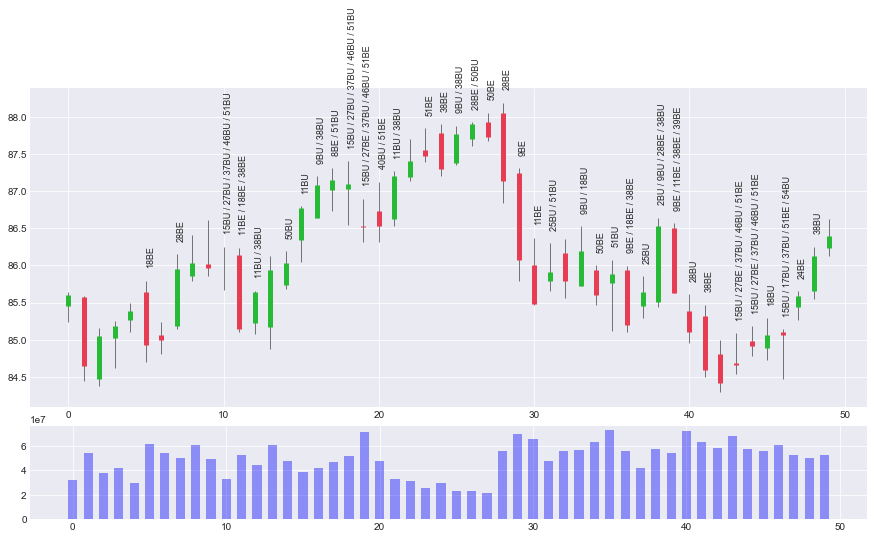

In [55]:
### TOP PLT

top_plt = plt.subplot2grid(shape=(5,4), loc=(0, 0), rowspan=3, colspan=4)

# Vertical lines from low to high
top_plt.vlines(temp_df.index, temp_df["low"], temp_df["high"], alpha=0.5, linewidth=1, color="black")

# Green candle
green_df = temp_df[temp_df["open"]<temp_df["close"]]
top_plt.vlines(green_df.index, green_df["open"], green_df["close"], alpha=1, linewidth=5, color="#27ba36")

# Red candle
red_df = temp_df[temp_df["open"]>temp_df["close"]]
top_plt.vlines(red_df.index, red_df["open"], red_df["close"], alpha=1, linewidth=5, color="#e83c53")

# Plot the texts
for i in range(len(temp_df)):
    if isinstance(temp_df["candlestick pattern"][i], str):
        plt.text(x=temp_df.index.values[i], 
                 y=temp_df.high[i]+0.2, 
                 s=temp_df["candlestick pattern"][i], 
                 rotation=90, 
                 fontdict={"size":9}) 
    
    
### BOTTOM PLT

bottom_plt = plt.subplot2grid(shape=(5,4), loc=(3, 0), rowspan=1, colspan=4)
bottom_plt.bar(temp_df.index.values, temp_df.volume, color="blue", alpha=0.4, width=0.6)


plt.gcf().set_size_inches(15,10)

In [46]:
df_candles = pd.DataFrame(index=df.index.values)

for i_index, i_row in df.iterrows():
    
    if not i_row.isnull()["candlestick pattern"]:

        all_patterns = i_row["candlestick pattern"].split("/")

        for i_pattern in all_patterns:
            
            if i_pattern not in df_candles.columns.values:
                df_candles[[i_pattern]] = 0

            df_candles.loc[i_index, i_pattern] = 1

df_candles = df_candles.astype(int)

In [47]:
df_candles

,Engulfing Pattern - Bearish,Hikkake Pattern - Bearish,Doji - Bullish,High-Wave Candle - Bullish,Long Legged Doji - Bullish,Rickshaw Man - Bullish,Spinning Top - Bullish,Closing Marubozu - Bearish,Engulfing Pattern - Bearish,Long Line Candle - Bearish,Closing Marubozu - Bullish,Long Line Candle - Bullish,Short Line Candle - Bullish,Closing Marubozu - Bullish,Belt-hold - Bullish,Advance Block - Bearish,High-Wave Candle - Bearish,Spinning Top - Bearish,Matching Low - Bullish,Spinning Top - Bearish,Long Line Candle - Bearish,Hikkake Pattern - Bearish,Short Line Candle - Bullish,Short Line Candle - Bearish,Belt-hold - Bearish,Closing Marubozu - Bearish,Harami Pattern - Bullish,Engulfing Pattern - Bullish,Spinning Top - Bullish,Belt-hold - Bearish,Harami Pattern - Bullish,Three Inside Up,Down - Bullish,Belt-hold - Bullish,Hikkake Pattern - Bearish,Closing Marubozu - Bearish,Long Line Candle - Bearish,Marubozu - Bearish,Hikkake Pattern - Bullish,Engulfing Pattern - Bullish,Dragonfly Doji - Bullish,Spinning Top - Bearish,Takuri (Dragonfly Doji with very long lower shadow) - Bullish,Hanging Man - Bearish,Long Line Candle - Bullish,Harami Pattern - Bullish,Harami Cross Pattern - Bullish,Hikkake Pattern - Bearish,Harami Pattern - Bearish,Harami Cross Pattern - Bearish,Short Line Candle - Bearish,Hammer - Bullish,Harami Pattern - Bullish,Closing Marubozu - Bullish,Belt-hold - Bullish,Harami Pattern - Bearish,High-Wave Candle - Bullish,Three Outside Up,Down - Bearish,Down - Bearish,Belt-hold - Bearish,Shooting Star - Bearish,Gravestone Doji - Bullish,Long Legged Doji - Bullish,Hikkake Pattern - Bullish,Shooting Star - Bearish,Short Line Candle - Bearish,Long Line Candle - Bullish,Marubozu - Bullish,Homing Pigeon - Bullish,Hikkake Pattern - Bullish,Harami Pattern - Bearish,Up,Down-gap side-by-side white lines - Bullish,Engulfing Pattern - Bullish,Stalled Pattern - Bearish,Down - Bullish,Hanging Man - Bearish,Engulfing Pattern - Bullish,High-Wave Candle - Bearish,Short Line Candle - Bullish,Engulfing Pattern - Bearish,Marubozu - Bullish,Piercing Pattern - Bullish,Stalled Pattern - Bearish,Long Line Candle - Bearish,Upside,Downside Gap Three Methods - Bullish,Short Line Candle - Bearish,Separating Lines - Bearish,Doji Star - Bullish,Matching Low - Bullish,Hikkake Pattern - Bullish,Hanging Man - Bearish,Ladder Bottom - Bullish,Doji Star - Bearish,Shooting Star - Bearish,Doji - Bullish,Closing Marubozu - Bearish,Hammer - Bullish,Morning Star - Bullish,Upside,Spinning Top - Bullish,Tasuki Gap - Bearish,Modified Hikkake Pattern - Bearish,Inverted Hammer - Bullish,Modified Hikkake Pattern - Bearish,Hammer - Bullish,Engulfing Pattern - Bearish,Downside Gap Three Methods - Bearish,Short Line Candle - Bullish,Matching Low - Bullish,Thrusting Pattern - Bearish,Marubozu - Bearish,Evening Star - Bearish,On-Neck Pattern - Bearish,Belt-hold - Bearish,Two Crows - Bearish,Long Line Candle - Bullish,Thrusting Pattern - Bearish,Hammer - Bullish,Morning Star - Bullish,Piercing Pattern - Bullish,Spinning Top - Bullish,Evening Star - Bearish,Two Crows - Bearish,Evening Star - Bearish,Belt-hold - Bullish,Down-gap side-by-side white lines - Bullish,Inverted Hammer - Bullish,Separating Lines - Bullish,Tasuki Gap - Bullish,Homing Pigeon - Bullish,Advance Block - Bearish,Matching Low - Bullish,Harami Pattern - Bearish,Unique 3 River - Bullish,Ladder Bottom - Bullish,Inverted Hammer - Bullish,Unique 3 River - Bullish,Tasuki Gap - Bullish,Dark Cloud Cover - Bearish,Dark Cloud Cover - Bearish,Evening Doji Star - Bearish,Morning Star - Bullish,Ladder Bottom - Bullish,Modified Hikkake Pattern - Bullish,Modified Hikkake Pattern - Bullish,Hanging Man - Bearish,Counterattack - Bullish,On-Neck Pattern - Bearish,Tristar Pattern - Bearish,Counterattack - Bearish,Tristar Pattern - Bullish,Evening Doji Star - Bearish,Dark Cloud Cover - Bearish,In-Neck Pattern - Bearish,Tasuki Gap - Bearish,Morning Doji Star - Bullish,Dark Cloud Cover - Bearish,Closing Marubozu - Bullish,Countera

In [48]:
from sklearn.decomposition import PCA
n_components=6
pca = PCA(n_components=n_components)
x_pca = pca.fit_transform(df_candles)
x_pca = pd.DataFrame(x_pca, columns=[f"candlestick pattern - PCA {i+1}" for i in range(n_components)])
x_pca

,candlestick pattern - PCA 1,candlestick pattern - PCA 2,candlestick pattern - PCA 3,candlestick pattern - PCA 4,candlestick pattern - PCA 5,candlestick pattern - PCA 6
0,-0.244,0.004,-0.082,-0.084,-0.076,-0.035
1,-0.244,0.004,-0.082,-0.084,-0.076,-0.035
2,-0.244,0.004,-0.082,-0.084,-0.076,-0.035
3,-0.244,0.004,-0.082,-0.084,-0.076,-0.035
4,-0.244,0.004,-0.082,-0.084,-0.076,-0.035
...,...,...,...,...,...,...
4118,-0.325,0.014,-0.360,0.802,0.073,0.739
4119,1.780,1.102,0.093,0.030,0.018,-0.025
4120,0.010,-0.562,-0.117,-0.113,-0.113,-0.099
4121,-0.253,0.004,-0.091,-0.098,-0.092,-0.045


In [49]:
df = pd.merge(df, x_pca, left_index=True, right_index=True)
df

,date,open,high,low,close,volume,price change,relative volume,RSI_14,EMA_9,EMA_20,EMA_50,EMA_200,macd,macdsignal,macdhist,key chart level,s&p futures price,gold price,gold futures price,20 years treasury bond,candlestick pattern,candlestick pattern - PCA 1,candlestick pattern - PCA 2,candlestick pattern - PCA 3,candlestick pattern - PCA 4,candlestick pattern - PCA 5,candlestick pattern - PCA 6
0,2004-11-18,85.450,85.645,85.234,85.602,31854300,0.001,-0.415,72.189,84.787,83.563,82.000,79.712,1.303,1.077,0.226,0,"1,185.000",44.380,442.600,52.069,NaN,-0.244,0.004,-0.082,-0.084,-0.076,-0.035
1,2004-11-19,85.573,85.587,84.448,84.650,54276500,-0.011,0.704,61.991,84.759,83.666,82.104,79.761,1.226,1.107,0.119,0,"1,172.250",44.780,446.800,51.653,NaN,-0.244,0.004,-0.082,-0.084,-0.076,-0.035
2,2004-11-22,84.470,85.155,84.369,85.054,37560200,0.005,-0.308,64.296,84.818,83.798,82.220,79.814,1.184,1.122,0.062,1,"1,178.000",44.950,448.800,51.922,NaN,-0.244,0.004,-0.082,-0.084,-0.076,-0.035
3,2004-11-23,85.018,85.256,84.614,85.184,41968800,0.002,0.117,65.029,84.891,83.930,82.336,79.867,1.148,1.128,0.021,0,"1,179.250",44.750,447.800,51.987,NaN,-0.244,0.004,-0.082,-0.084,-0.076,-0.035
4,2004-11-24,85.263,85.494,85.104,85.386,29724800,0.002,-0.292,66.194,84.990,84.069,82.456,79.922,1.123,1.127,-0.004,0,"1,182.000",45.050,449.300,51.987,NaN,-0.244,0.004,-0.082,-0.084,-0.076,-0.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,2021-06-01,422.570,422.720,419.200,419.670,54216600,-0.001,-0.074,57.693,417.999,416.323,410.021,375.932,2.145,1.983,0.163,1,"4,198.500",177.900,"1,902.900",138.210,Belt-hold - Bearish / Long Line Candle - Bearish,-0.325,0.014,-0.360,0.802,0.073,0.739
4119,2021-06-02,420.370,421.230,419.290,420.330,49097100,0.002,-0.094,58.619,418.465,416.704,410.425,376.374,2.215,2.029,0.186,0,"4,206.250",178.770,"1,907.500",138.530,Doji - Bullish / Harami Pattern - Bullish / Ha...,1.780,1.102,0.093,0.030,0.018,-0.025
4120,2021-06-03,417.850,419.990,416.280,418.770,58138800,-0.004,0.184,55.524,418.526,416.901,410.753,376.796,2.120,2.047,0.072,0,"4,191.250",175.270,"1,871.200",138.010,Hikkake Pattern - Bullish / Spinning Top - Bul...,0.010,-0.562,-0.117,-0.113,-0.113,-0.099
4121,2021-06-04,420.750,422.920,418.840,422.600,55910700,0.009,-0.038,60.972,419.341,417.444,411.217,377.252,2.326,2.103,0.223,0,"4,228.250",177.160,"1,889.800",139.900,Hikkake Pattern - Bullish,-0.253,0.004,-0.091,-0.098,-0.092,-0.045


In [50]:
# Remove the candlestick pattern columns
#df = df.drop("candlestick pattern", axis=1)
#df

,date,open,high,low,close,volume,price change,relative volume,RSI_14,EMA_9,EMA_20,EMA_50,EMA_200,macd,macdsignal,macdhist,key chart level,s&p futures price,gold price,gold futures price,20 years treasury bond,candlestick pattern - PCA 1,candlestick pattern - PCA 2,candlestick pattern - PCA 3,candlestick pattern - PCA 4,candlestick pattern - PCA 5,candlestick pattern - PCA 6
0,2004-11-18,85.450,85.645,85.234,85.602,31854300,0.001,-0.415,72.189,84.787,83.563,82.000,79.712,1.303,1.077,0.226,0,"1,185.000",44.380,442.600,52.069,-0.244,0.004,-0.082,-0.084,-0.076,-0.035
1,2004-11-19,85.573,85.587,84.448,84.650,54276500,-0.011,0.704,61.991,84.759,83.666,82.104,79.761,1.226,1.107,0.119,0,"1,172.250",44.780,446.800,51.653,-0.244,0.004,-0.082,-0.084,-0.076,-0.035
2,2004-11-22,84.470,85.155,84.369,85.054,37560200,0.005,-0.308,64.296,84.818,83.798,82.220,79.814,1.184,1.122,0.062,1,"1,178.000",44.950,448.800,51.922,-0.244,0.004,-0.082,-0.084,-0.076,-0.035
3,2004-11-23,85.018,85.256,84.614,85.184,41968800,0.002,0.117,65.029,84.891,83.930,82.336,79.867,1.148,1.128,0.021,0,"1,179.250",44.750,447.800,51.987,-0.244,0.004,-0.082,-0.084,-0.076,-0.035
4,2004-11-24,85.263,85.494,85.104,85.386,29724800,0.002,-0.292,66.194,84.990,84.069,82.456,79.922,1.123,1.127,-0.004,0,"1,182.000",45.050,449.300,51.987,-0.244,0.004,-0.082,-0.084,-0.076,-0.035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,2021-06-01,422.570,422.720,419.200,419.670,54216600,-0.001,-0.074,57.693,417.999,416.323,410.021,375.932,2.145,1.983,0.163,1,"4,198.500",177.900,"1,902.900",138.210,-0.325,0.014,-0.360,0.802,0.073,0.739
4119,2021-06-02,420.370,421.230,419.290,420.330,49097100,0.002,-0.094,58.619,418.465,416.704,410.425,376.374,2.215,2.029,0.186,0,"4,206.250",178.770,"1,907.500",138.530,1.780,1.102,0.093,0.030,0.018,-0.025
4120,2021-06-03,417.850,419.990,416.280,418.770,58138800,-0.004,0.184,55.524,418.526,416.901,410.753,376.796,2.120,2.047,0.072,0,"4,191.250",175.270,"1,871.200",138.010,0.010,-0.562,-0.117,-0.113,-0.113,-0.099
4121,2021-06-04,420.750,422.920,418.840,422.600,55910700,0.009,-0.038,60.972,419.341,417.444,411.217,377.252,2.326,2.103,0.223,0,"4,228.250",177.160,"1,889.800",139.900,-0.253,0.004,-0.091,-0.098,-0.092,-0.045


<br>

### 03.5. Add Chart Patterns

##### Bull / Bear Flag

In [ ]:
# Bar 1-3 should be green
# Bar 4-5 should be red
# Set high of bar 5 is entry
# Loop over bar 6 to 10
#         If current bar's high is lower than previous bar's high
#                 Update the entry point
#         else
#                 Buy the stock
#                 Exit the loop
# Loop over next 5 bars
#         

In [245]:
counter_list = []  # ["green", "red"]
detected_flag = False
have_position = False
total_pl = 0

for i_index, i_row in df.iterrows():
    
    counter_list.append("green" if i_row["close"]>i_row["open"] else "red")
    
    # Set the detected_flag on if we detected bull flag
    if (counter_list[-5:]==["green", "green", "green", "red", "red"]) & (have_position==False):
        detected_flag = True
        target_exit_price = max(df.loc[-5:, "high"])
        bar_counter_from_entry = 0
        #starting_index = counter_list[-5].index
        
    # If detected_flag is on AND the last candle is green
    if (detected_flag) and (counter_list[-1]=="green"):
        
        # Set the flag off
        detected_flag = False
        
        # Set the "close" of current candle as entry
        buy_price = i_row["close"]
        
        # Set the have_position flag to on
        have_position = True
        
    # If we already have position
    if have_position:
        
        # If 5 bar already passed the sell the stock
        if bar_counter_from_entry>=5:
            sell_price = i_row["close"]
            have_position = False
            total_pl += sell_price - buy_price
            print("Profit/Loss: ", int(sell_price - buy_price))
        
        # Increment the bar counter (from entry)
        bar_counter_from_entry += 1
        
        # If current bar already passed the target exit price
        if (i_row["low"] >= target_exit_price) | (i_row["high"] >= target_exit_price):
            
            sell_price = i_row["close"]
            have_position = False
            
            total_pl += sell_price - buy_price
            
            print("Profit/Loss: ", int(sell_price - buy_price))
        
    

Profit/Loss:  0
Profit/Loss:  0
Profit/Loss:  -2
Profit/Loss:  0
Profit/Loss:  0
Profit/Loss:  2
Profit/Loss:  0
Profit/Loss:  0
Profit/Loss:  0
Profit/Loss:  1
Profit/Loss:  0
Profit/Loss:  1
Profit/Loss:  1
Profit/Loss:  -1
Profit/Loss:  0
Profit/Loss:  -2
Profit/Loss:  0
Profit/Loss:  -4
Profit/Loss:  -3
Profit/Loss:  1
Profit/Loss:  3
Profit/Loss:  -5
Profit/Loss:  -5
Profit/Loss:  3
Profit/Loss:  0
Profit/Loss:  0
Profit/Loss:  -2
Profit/Loss:  0
Profit/Loss:  -2
Profit/Loss:  0
Profit/Loss:  1
Profit/Loss:  1
Profit/Loss:  -2
Profit/Loss:  1
Profit/Loss:  0
Profit/Loss:  1
Profit/Loss:  2
Profit/Loss:  2
Profit/Loss:  1
Profit/Loss:  -1
Profit/Loss:  -2
Profit/Loss:  2
Profit/Loss:  -7
Profit/Loss:  0
Profit/Loss:  0
Profit/Loss:  -1
Profit/Loss:  -3
Profit/Loss:  0
Profit/Loss:  -3
Profit/Loss:  2
Profit/Loss:  3
Profit/Loss:  1
Profit/Loss:  0
Profit/Loss:  -3
Profit/Loss:  0
Profit/Loss:  0
Profit/Loss:  -1
Profit/Loss:  -3
Profit/Loss:  -1
Profit/Loss:  0
Profit/Loss:  0
Prof

##### Flat Top/Bottom Pattern

In [ ]:
# TODO

<br>

### 03.6. Add Fundamental Information

In [56]:
# Add Average True Rate (ATR)
high_low = df['high'] - df['low']
high_close = np.abs(df['high'] - df['close'].shift())
low_close = np.abs(df['low'] - df['close'].shift())

ranges = pd.concat([high_low, high_close, low_close], axis=1)
true_range = np.max(ranges, axis=1)

atr = true_range.rolling(14).sum()/14

df = pd.merge(df, pd.DataFrame(atr, columns=["ATR"]), 
              left_index=True, right_index=True)
df

,date,open,high,low,close,volume,price change,relative volume,RSI_14,EMA_9,EMA_20,EMA_50,EMA_200,macd,macdsignal,macdhist,s&p futures price,gold price,gold futures price,20 years treasury bond,candlestick pattern,ATR
0,2004-11-18,85.450,85.645,85.234,85.602,31854300,0.001,-0.415,72.189,84.787,83.563,82.000,79.712,1.303,1.077,0.226,"1,185.000",44.380,442.600,52.069,NaN,NaN
1,2004-11-19,85.573,85.587,84.448,84.650,54276500,-0.011,0.704,61.991,84.759,83.666,82.104,79.761,1.226,1.107,0.119,"1,172.250",44.780,446.800,51.653,NaN,NaN
2,2004-11-22,84.470,85.155,84.369,85.054,37560200,0.005,-0.308,64.296,84.818,83.798,82.220,79.814,1.184,1.122,0.062,"1,178.000",44.950,448.800,51.922,NaN,NaN
3,2004-11-23,85.018,85.256,84.614,85.184,41968800,0.002,0.117,65.029,84.891,83.930,82.336,79.867,1.148,1.128,0.021,"1,179.250",44.750,447.800,51.987,NaN,NaN
4,2004-11-24,85.263,85.494,85.104,85.386,29724800,0.002,-0.292,66.194,84.990,84.069,82.456,79.922,1.123,1.127,-0.004,"1,182.000",45.050,449.300,51.987,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4120,2021-06-03,417.850,419.990,416.280,418.770,58138800,-0.004,0.184,55.524,418.526,416.901,410.753,376.796,2.120,2.047,0.072,"4,191.250",175.270,"1,871.200",138.010,28BU / 51BU,3.884
4121,2021-06-04,420.750,422.920,418.840,422.600,55910700,0.009,-0.038,60.972,419.341,417.444,411.217,377.252,2.326,2.103,0.223,"4,228.250",177.160,"1,889.800",139.900,28BU,3.665
4122,2021-06-07,422.590,422.780,421.190,422.190,51555000,-0.001,-0.078,60.123,419.911,417.896,411.648,377.699,2.429,2.168,0.261,"4,225.500",177.870,"1,896.800",139.470,25BE,3.549
4123,2021-06-08,423.110,423.210,420.320,422.280,47134300,0.000,-0.086,60.254,420.385,418.313,412.065,378.142,2.489,2.232,0.257,"4,225.750",177.320,"1,892.200",140.450,24BE / 40BU,3.449


<br>

### 03.7. Add News Sentiment

<br>

### 03.8. Feature Importance & Feature Selection

<br>

# 04. Dataset Establishment


---

In [57]:
df = df.dropna()

In [61]:
temp_df = df.iloc[:50].reset_index().iloc[:, 1:]
temp_df

,date,open,high,low,close,volume,price change,relative volume,RSI_14,EMA_9,EMA_20,EMA_50,EMA_200,macd,macdsignal,macdhist,s&p futures price,gold price,gold futures price,20 years treasury bond,candlestick pattern,ATR
0,2004-12-10,85.732,86.193,85.681,86.027,47828600,0.001,-0.215,63.681,85.690,85.152,83.594,80.517,0.775,0.882,-0.108,"1,189.750",43.440,433.900,52.212,50BU,0.793
1,2004-12-13,86.337,86.799,86.042,86.777,38541000,0.009,-0.194,68.674,85.908,85.307,83.719,80.579,0.813,0.869,-0.055,"1,200.250",43.910,438.900,52.323,11BU,0.766
2,2004-12-14,86.640,87.202,86.640,87.080,41500700,0.003,0.077,70.441,86.142,85.475,83.851,80.644,0.859,0.867,-0.008,"1,204.000",43.550,435.900,52.529,9BU / 38BU,0.750
3,2004-12-15,87.015,87.310,86.734,87.145,46699200,0.001,0.125,70.821,86.343,85.634,83.980,80.708,0.889,0.871,0.018,"1,204.750",43.990,440.800,53.005,8BE / 51BU,0.745
4,2004-12-16,87.029,87.404,86.539,87.094,51641800,-0.001,0.106,70.067,86.493,85.773,84.102,80.772,0.899,0.877,0.023,"1,204.250",43.680,436.900,52.223,15BU / 27BU / 37BU / 46BU / 51BU,0.779
5,2004-12-17,86.528,86.897,86.310,86.513,70761900,-0.007,0.370,61.895,86.497,85.844,84.197,80.829,0.851,0.872,-0.021,"1,190.450",44.190,441.600,52.153,15BU / 27BE / 37BU / 46BU / 51BE,0.756
6,2004-12-20,86.738,87.129,86.318,86.535,47187400,0.000,-0.333,62.073,86.505,85.910,84.288,80.886,0.804,0.858,-0.054,"1,198.750",44.340,442.400,52.247,40BU / 51BE,0.783
7,2004-12-21,86.629,87.267,86.528,87.201,33094200,0.008,-0.299,67.147,86.644,86.033,84.402,80.949,0.812,0.849,-0.037,"1,208.000",44.220,441.800,52.406,11BU / 38BU,0.753
8,2004-12-23,87.549,87.846,87.397,87.477,25646100,0.001,-0.186,69.024,86.933,86.289,84.636,81.077,0.832,0.842,-0.010,"1,211.750",44.270,441.900,52.059,51BE,0.727
9,2004-12-27,87.788,87.904,87.201,87.296,29944100,-0.002,0.168,66.190,87.006,86.385,84.741,81.139,0.813,0.836,-0.023,"1,208.500",44.480,445.200,51.653,38BE,0.736


In [62]:
def visualize_all_charts(temp_df):
    
    # Initialize the figure
    fig = plt.figure(constrained_layout=True, figsize=(8, 40))

    # Add grid spaces
    gs = fig.add_gridspec(nrows=20, ncols=1)

    ###############
    # Price Chart #
    ###############

    ### CANDLESTICK

    ax1 = fig.add_subplot(gs[0:3, 0])

    ax1.set_title("Candlestick Chart", fontdict={"size":21}, pad=15)

    # Vertical lines from low to high
    ax1.vlines(temp_df.index, temp_df["low"], temp_df["high"], alpha=0.5, linewidth=1, color="black")

    # Green candle
    green_df = temp_df[temp_df["open"]<temp_df["close"]]
    ax1.vlines(green_df.index, green_df["open"], green_df["close"], alpha=1, linewidth=5, color="#27ba36")

    # Red candle
    red_df = temp_df[temp_df["open"]>temp_df["close"]]
    ax1.vlines(red_df.index, red_df["open"], red_df["close"], alpha=1, linewidth=5, color="#e83c53")

    ### VOLUME

    ax2 = fig.add_subplot(gs[3:4, 0])
    ax2.bar(temp_df["volume"].index.values, temp_df["volume"], alpha=0.6)


    ### RELATIVE VOLUME

    ax3 = fig.add_subplot(gs[4:5, 0])
    ax3.bar(temp_df["relative volume"].index.values, temp_df["relative volume"], alpha=0.6, color="purple")



    ######################
    # TECHNICAL ANALYSIS #
    ######################

    ### EMA

    ax4 = fig.add_subplot(gs[5:8, 0])

    ax4.set_title("Technical Analysis", fontdict={"size":21}, pad=15)


    # Vertical lines from low to high
    ax4.vlines(temp_df.index, temp_df["low"], temp_df["high"], alpha=0.5, linewidth=1, color="black")

    # Green candle
    green_df = temp_df[temp_df["open"]<temp_df["close"]]
    ax4.vlines(green_df.index, green_df["open"], green_df["close"], alpha=1, linewidth=5, color="#27ba36")

    # Red candle
    red_df = temp_df[temp_df["open"]>temp_df["close"]]
    ax4.vlines(red_df.index, red_df["open"], red_df["close"], alpha=1, linewidth=5, color="#e83c53")

    ax4.plot(temp_df[["EMA_9", "EMA_20", "EMA_50", "EMA_200"]], label=["EMA_9", "EMA_20", "EMA_50", "EMA_200"])
    ax4.legend(loc='upper left')

    ### MACD

    ax5 = fig.add_subplot(gs[8:9, 0])

    green_df = temp_df[temp_df["macdhist"]>0]
    ax5.bar(green_df.index.values, green_df["macdhist"], color="darkgreen", alpha=0.8)

    red_df = temp_df[temp_df["macdhist"]<=0]
    ax5.bar(red_df.index.values, red_df["macdhist"], color="darkred", alpha=0.8)

    ax5.plot(temp_df[["macd", "macdsignal"]])


    ###################
    # Key Chart Level #
    ###################

    ax6 = fig.add_subplot(gs[9:12, 0])

    ax6.set_title("Key Chart Levels", fontdict={"size":21}, pad=15)


    # Vertical lines from low to high
    ax6.vlines(temp_df.index, temp_df["low"], temp_df["high"], alpha=0.5, linewidth=1, color="black")

    # Green candle
    green_df = temp_df[temp_df["open"]<temp_df["close"]]
    ax6.vlines(green_df.index, green_df["open"], green_df["close"], alpha=1, linewidth=5, color="#27ba36")

    # Red candle
    red_df = temp_df[temp_df["open"]>temp_df["close"]]
    ax6.vlines(red_df.index, red_df["open"], red_df["close"], alpha=1, linewidth=5, color="#e83c53")

    # Draw horizontal support and resistance lines
    levels = find_levels(temp_df, remove_near_lines = True)
    for level in levels:
        ax6.hlines(level[1], xmin=temp_df.index.values[level[0]], xmax=max(temp_df.index.values), 
                       linestyles="dashed", colors='black', alpha=0.5)

    # Draw trendline    
    x = temp_df["close"].reset_index().iloc[:, 1:].index.to_list()
    y = list(temp_df["close"].reset_index().iloc[:, 1:].values.reshape(-1))
    z = np.polyfit(x, y, 20)
    p = np.poly1d(z)
    ax6.plot(temp_df.index, p(x), "--", color="blue", alpha=0.4)        


    #####################
    # Correlated Assets #
    #####################

    ax7 = fig.add_subplot(gs[12:15, 0])

    ax7.set_title("Correlated Asset Classes", fontdict={"size":21}, pad=15)


    temp_df_v2 = StandardScaler().fit_transform(temp_df[["open", "high", "low", "close", "s&p futures price", "gold price", "20 years treasury bond"]])
    temp_df_v2 = pd.DataFrame(temp_df_v2, columns=["open", "high", "low", "close", "s&p futures price", "gold price", "20 years treasury bond"])

    # Vertical lines from low to high
    ax7.vlines(temp_df_v2.index, temp_df_v2["low"], temp_df_v2["high"], alpha=0.5, linewidth=1, color="black")

    # Green candle
    green_df = temp_df_v2[temp_df_v2["open"]<temp_df_v2["close"]]
    ax7.vlines(green_df.index, green_df["open"], green_df["close"], alpha=1, linewidth=5, color="#27ba36")

    # Red candle
    red_df = temp_df_v2[temp_df_v2["open"]>temp_df_v2["close"]]
    ax7.vlines(red_df.index, red_df["open"], red_df["close"], alpha=1, linewidth=5, color="#e83c53")

    ax7.plot(temp_df_v2[["s&p futures price", "gold price", "20 years treasury bond"]], label=["s&p futures price", "gold price", "20 years treasury bond"])
    ax7.legend(loc='upper left')


    ########################
    # Candlestick Patterns #
    ########################

    ax8 = fig.add_subplot(gs[15:18, 0])

    ax8.set_title("Candlestick Patterns", fontdict={"size":21}, pad=15)

    # Vertical lines from low to high
    ax8.vlines(temp_df.index, temp_df["low"], temp_df["high"], alpha=0.5, linewidth=1, color="black")

    # Green candle
    green_df = temp_df[temp_df["open"]<temp_df["close"]]
    ax8.vlines(green_df.index, green_df["open"], green_df["close"], alpha=1, linewidth=5, color="#27ba36")

    # Red candle
    red_df = temp_df[temp_df["open"]>temp_df["close"]]
    ax8.vlines(red_df.index, red_df["open"], red_df["close"], alpha=1, linewidth=5, color="#e83c53")

    # Plot the texts
    for i in range(len(temp_df)):
        if isinstance(temp_df["candlestick pattern"][i], str):
            ax8.text(x=temp_df.index.values[i], 
                     y=temp_df.high[i]+0.2, 
                     s=temp_df["candlestick pattern"][i], 
                     rotation=90, 
                     fontdict={"size":9}) 


    plt.show()

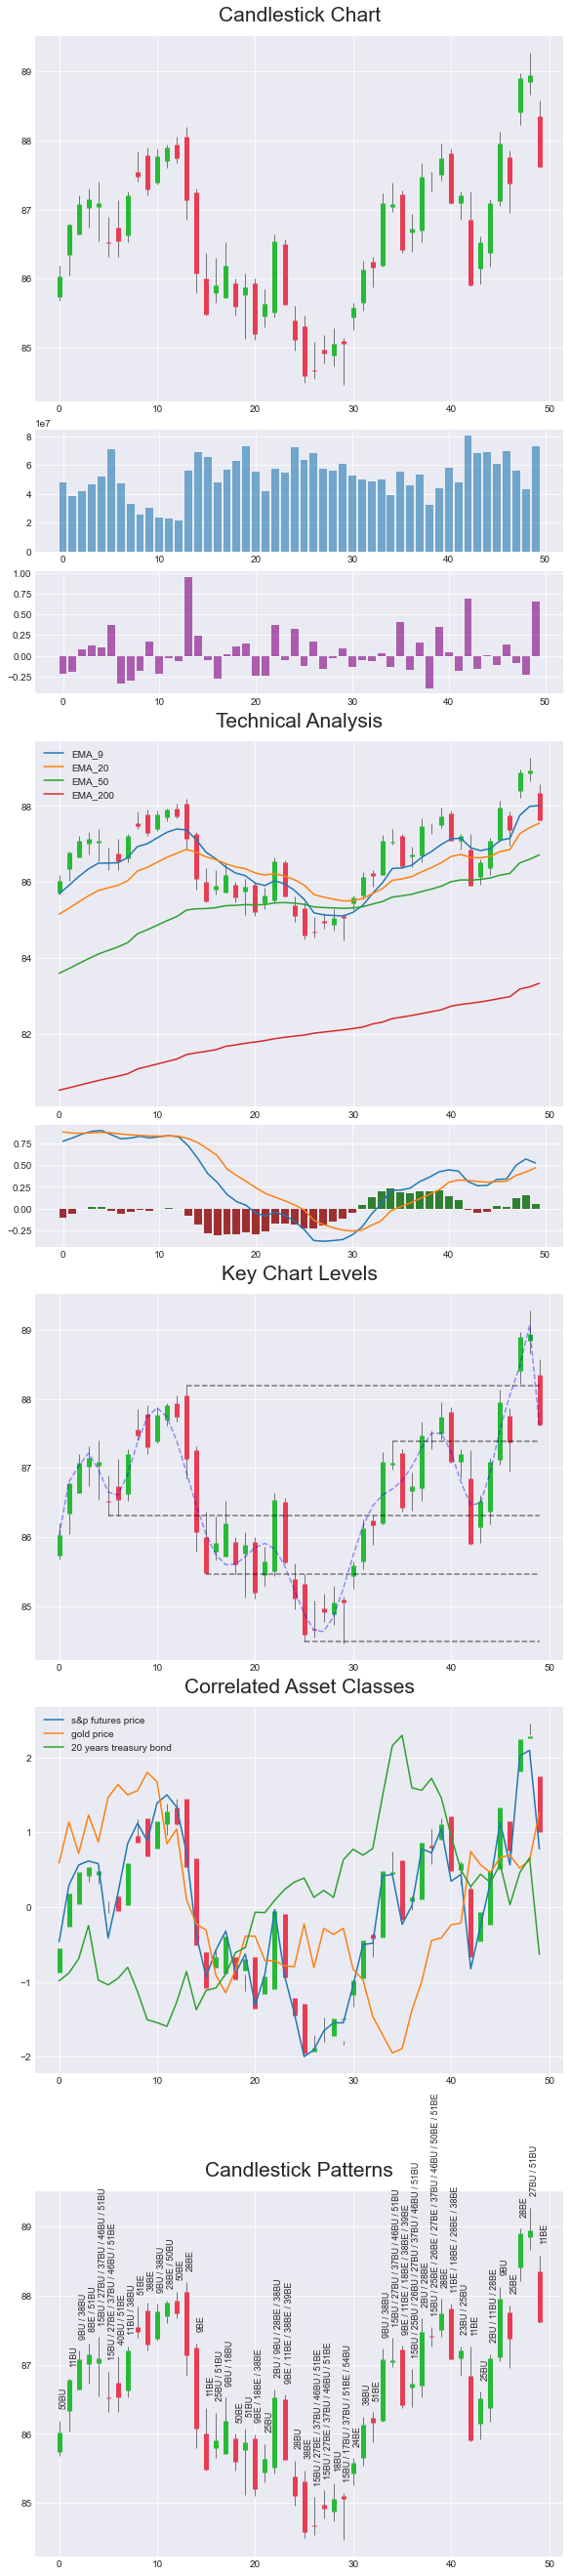

In [63]:
visualize_all_charts(temp_df)

### TODO: Predict if Next Candle will be Green or Red

<br>

### 04.1. Prepare Input and Output

In [167]:
### Numbers only

# Drop NaN values
df = df.dropna()
df = df.reset_index().iloc[:, 1:]

# Drop the unwanted columns
df = df.drop(["date"], axis=1)

#
x_df = df.copy()
y_df = df["close"].shift(-1) - df["close"]

#
y_df = y_df.map(lambda x: 1 if x>0 else 0)

#
sc = StandardScaler()
x_df_transform = sc.fit_transform(x_df)
x_df_transform = pd.DataFrame(x_df_transform, columns=x_df.columns.values)

,open,high,low,close,volume,price change,relative volume,RSI_14,EMA_9,EMA_20,EMA_50,EMA_200,macd,macdsignal,macdhist,key chart level,s&p futures price,gold price,gold futures price,20 years treasury bond,candlestick pattern - PCA 1,candlestick pattern - PCA 2,candlestick pattern - PCA 3,candlestick pattern - PCA 4,candlestick pattern - PCA 5,candlestick pattern - PCA 6,ATR
0,85.169,86.121,84.874,85.941,60922800,0.004,0.388,63.050,85.606,85.060,83.495,80.461,0.791,0.909,-0.119,1,"1,188.500",43.780,435.800,52.082,-0.244,0.004,-0.082,-0.084,-0.076,-0.035,0.786
1,85.732,86.193,85.681,86.027,47828600,0.001,-0.215,63.681,85.690,85.152,83.594,80.517,0.775,0.882,-0.108,0,"1,189.750",43.440,433.900,52.212,-0.275,0.006,-0.128,-0.164,-0.188,-0.154,0.793
2,86.337,86.799,86.042,86.777,38541000,0.009,-0.194,68.674,85.908,85.307,83.719,80.579,0.813,0.869,-0.055,0,"1,200.250",43.910,438.900,52.323,-0.258,0.004,-0.099,-0.110,-0.107,-0.056,0.766
3,86.640,87.202,86.640,87.080,41500700,0.003,0.077,70.441,86.142,85.475,83.851,80.644,0.859,0.867,-0.008,0,"1,204.000",43.550,435.900,52.529,-0.350,-0.036,0.698,-0.134,0.783,0.057,0.750
4,87.015,87.310,86.734,87.145,46699200,0.001,0.125,70.821,86.343,85.634,83.980,80.708,0.889,0.871,0.018,0,"1,204.750",43.990,440.800,53.005,0.014,-0.565,-0.114,-0.107,-0.112,-0.094,0.745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105,422.570,422.720,419.200,419.670,54216600,-0.001,-0.074,57.693,417.999,416.323,410.021,375.932,2.145,1.983,0.163,1,"4,198.500",177.900,"1,902.900",138.210,-0.325,0.014,-0.360,0.802,0.073,0.739,4.681
4106,420.370,421.230,419.290,420.330,49097100,0.002,-0.094,58.619,418.465,416.704,410.425,376.374,2.215,2.029,0.186,0,"4,206.250",178.770,"1,907.500",138.530,1.780,1.102,0.093,0.030,0.018,-0.025,4.090
4107,417.850,419.990,416.280,418.770,58138800,-0.004,0.184,55.524,418.526,416.901,410.753,376.796,2.120,2.047,0.072,0,"4,191.250",175.270,"1,871.200",138.010,0.010,-0.562,-0.117,-0.113,-0.113,-0.099,3.884
4108,420.750,422.920,418.840,422.600,55910700,0.009,-0.038,60.972,419.341,417.444,411.217,377.252,2.326,2.103,0.223,0,"4,228.250",177.160,"1,889.800",139.900,-0.253,0.004,-0.091,-0.098,-0.092,-0.045,3.665


In [417]:
### Using chart images

outputs_df = pd.DataFrame(columns=["image path", "next candlestick", "next candlestick ohlc"])

for index in tqdm(range(df.shape[0]-1)):
    next_candlestick = "green" if df.iloc[index+1]["close"]>df.iloc[index+1]["open"] else "red"
    next_candlestick_ohlc = list(df.iloc[index+1][["open", "high", "low", "close"]].values)
    next_candlestick_ohlc = [float("{:.2f}".format(i)) for i in next_candlestick_ohlc]
    outputs_df = outputs_df.append({"image path": None, 
                                    "next candlestick": next_candlestick,
                                    "next candlestick ohlc": next_candlestick_ohlc}, ignore_index=True)

100%|█████████████████████████████████████████████████████████████████████████████| 4109/4109 [00:10<00:00, 377.73it/s]


In [ ]:
# TODOs:
# 1. Loop over each day (1min or 5min timesteps)
# 2. Use a sliding window of N size to get temp_df in that day
# 3. Save the visualization chart
# 4. Add all the necessary information into the output_df
# IMPORTANT NOTE: NEVER GET PRICES FROM END OF CURRENT DAY TO START OF NEXT DAY

In [418]:
outputs_df

,image path,next candlestick,next candlestick ohlc
0,None,green,"[85.73, 86.19, 85.68, 86.03]"
1,None,green,"[86.34, 86.8, 86.04, 86.78]"
2,None,green,"[86.64, 87.2, 86.64, 87.08]"
3,None,green,"[87.01, 87.31, 86.73, 87.14]"
4,None,green,"[87.03, 87.4, 86.54, 87.09]"
...,...,...,...
4104,None,red,"[422.57, 422.72, 419.2, 419.67]"
4105,None,red,"[420.37, 421.23, 419.29, 420.33]"
4106,None,green,"[417.85, 419.99, 416.28, 418.77]"
4107,None,green,"[420.75, 422.92, 418.84, 422.6]"


In [382]:
df

,open,high,low,close,volume,price change,relative volume,RSI_14,EMA_9,EMA_20,EMA_50,EMA_200,macd,macdsignal,macdhist,key chart level,s&p futures price,gold price,gold futures price,20 years treasury bond,candlestick pattern - PCA 1,candlestick pattern - PCA 2,candlestick pattern - PCA 3,candlestick pattern - PCA 4,candlestick pattern - PCA 5,candlestick pattern - PCA 6,ATR,candlestick pattern
0,85.169,86.121,84.874,85.941,60922800,0.004,0.388,63.050,85.606,85.060,83.495,80.461,0.791,0.909,-0.119,1,"1,188.500",43.780,435.800,52.082,-0.244,0.004,-0.082,-0.084,-0.076,-0.035,0.786,NaN
1,85.732,86.193,85.681,86.027,47828600,0.001,-0.215,63.681,85.690,85.152,83.594,80.517,0.775,0.882,-0.108,0,"1,189.750",43.440,433.900,52.212,-0.275,0.006,-0.128,-0.164,-0.188,-0.154,0.793,NaN
2,86.337,86.799,86.042,86.777,38541000,0.009,-0.194,68.674,85.908,85.307,83.719,80.579,0.813,0.869,-0.055,0,"1,200.250",43.910,438.900,52.323,-0.258,0.004,-0.099,-0.110,-0.107,-0.056,0.766,NaN
3,86.640,87.202,86.640,87.080,41500700,0.003,0.077,70.441,86.142,85.475,83.851,80.644,0.859,0.867,-0.008,0,"1,204.000",43.550,435.900,52.529,-0.350,-0.036,0.698,-0.134,0.783,0.057,0.750,NaN
4,87.015,87.310,86.734,87.145,46699200,0.001,0.125,70.821,86.343,85.634,83.980,80.708,0.889,0.871,0.018,0,"1,204.750",43.990,440.800,53.005,0.014,-0.565,-0.114,-0.107,-0.112,-0.094,0.745,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105,422.570,422.720,419.200,419.670,54216600,-0.001,-0.074,57.693,417.999,416.323,410.021,375.932,2.145,1.983,0.163,1,"4,198.500",177.900,"1,902.900",138.210,-0.325,0.014,-0.360,0.802,0.073,0.739,4.681,Belt-hold - Bearish / Long Line Candle - Bearish
4106,420.370,421.230,419.290,420.330,49097100,0.002,-0.094,58.619,418.465,416.704,410.425,376.374,2.215,2.029,0.186,0,"4,206.250",178.770,"1,907.500",138.530,1.780,1.102,0.093,0.030,0.018,-0.025,4.090,Doji - Bullish / Harami Pattern - Bullish / Ha...
4107,417.850,419.990,416.280,418.770,58138800,-0.004,0.184,55.524,418.526,416.901,410.753,376.796,2.120,2.047,0.072,0,"4,191.250",175.270,"1,871.200",138.010,0.010,-0.562,-0.117,-0.113,-0.113,-0.099,3.884,Hikkake Pattern - Bullish / Spinning Top - Bul...
4108,420.750,422.920,418.840,422.600,55910700,0.009,-0.038,60.972,419.341,417.444,411.217,377.252,2.326,2.103,0.223,0,"4,228.250",177.160,"1,889.800",139.900,-0.253,0.004,-0.091,-0.098,-0.092,-0.045,3.665,Hikkake Pattern - Bullish


<br>

### 04.2. Split the Data into Training and Testing Set

In [173]:
def split_dateset(df, percentage=0.9):
    
    index_to_split = int(percentage*df.shape[0])
    
    df_train = df.iloc[:index_to_split] 
    df_test = df.iloc[index_to_split:]
    
    return df_train, df_test

In [226]:
# Get the training and testing set
x_train, x_test = split_dateset(df, percentage=0.9)
y_train, y_test = split_dateset(y_df, percentage=0.9)

In [227]:
# Convert to numpy array
x_train, x_test = x_train.to_numpy(), x_test.to_numpy()
y_train, y_test = y_train.to_numpy(), y_test.to_numpy()

In [228]:
# Get the last 30 steps as input and 1 output

<br>

### 04.3. Reshape Dataset for the Model

<br>

# 05. Model Construction


---

##### DL

In [ ]:
### ANN

# Reshape the data
batch, timestep, feature = -1, 1, 27
x_train = x_train.reshape((batch, timestep, feature))
y_train = y_train.reshape(-1, 1)

# Architecture
model = keras.models.Sequential()
model.add(keras.layers.LSTM(256, return_sequences=True, input_shape=(None, 27)))
model.add(keras.layers.LSTM(256, return_sequences=True))
model.add(keras.layers.LSTM(256, return_sequences=True))
model.add(keras.layers.LSTM(256, return_sequences=True))
model.add(keras.layers.LSTM(256, return_sequences=False))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

# Fit the model
model.fit(x_train, y_train, batch_size=128, epochs=40)

# Test the model
batch, timestep, feature = -1, 1, 27
x_test = x_test.reshape((batch, timestep, feature))
y_test = y_train.reshape(-1, 1)
preds = model.predict(x_test)


In [ ]:
### CNN (Inception)

# TODO

In [ ]:
### Transformer Vision

# TODO

##### ML

In [229]:
# Function containing regression models
def get_models_regression(models=dict()):
    
    # Linear models
    models['linear_regression'] = LinearRegression()
    models['lasso_regressor'] = Lasso()
    models['ridge_regressor'] = Ridge()
    models['elastic_net_regressor'] = ElasticNet()
    models['huber_regressor'] = HuberRegressor()
    models['lasso_lars_regressor'] = LassoLars()
    models['passive_aggressive_regressor'] = PassiveAggressiveRegressor( tol=1e-3)
    models['sgd_regressor'] = SGDRegressor(tol=1e-3)
    
    # Non-linear models
    models['knn_regressor'] = KNeighborsRegressor(n_neighbors=7)
    models['cart_decision_tree_regressor'] = DecisionTreeRegressor()
    models['extra_tree_regressor'] = ExtraTreeRegressor()
    models['support_vector_regressor'] = SVR()
    
    # Ensemble models
    n_trees = 100
    models['ada_boost_regressor'] = AdaBoostRegressor(n_estimators=n_trees)
    models['bagging_regressor'] = BaggingRegressor(n_estimators=n_trees)
    models['random_forest_regressor'] = RandomForestRegressor(n_estimators=n_trees)
    models['extra_tree_regressor_2'] = ExtraTreesRegressor(n_estimators=n_trees)
    models['gradient_boosting_regressor'] = GradientBoostingRegressor(n_estimators=n_trees)
    
    print('Defined %d models' % len(models))
    
    return models

In [230]:
# Get the regression models
models = get_models_regression()
models

Defined 17 models


{'linear_regression': LinearRegression(),
 'lasso_regressor': Lasso(),
 'ridge_regressor': Ridge(),
 'elastic_net_regressor': ElasticNet(),
 'huber_regressor': HuberRegressor(),
 'lasso_lars_regressor': LassoLars(),
 'passive_aggressive_regressor': PassiveAggressiveRegressor(),
 'sgd_regressor': SGDRegressor(),
 'knn_regressor': KNeighborsRegressor(n_neighbors=7),
 'cart_decision_tree_regressor': DecisionTreeRegressor(),
 'extra_tree_regressor': ExtraTreeRegressor(),
 'support_vector_regressor': SVR(),
 'ada_boost_regressor': AdaBoostRegressor(n_estimators=100),
 'bagging_regressor': BaggingRegressor(n_estimators=100),
 'random_forest_regressor': RandomForestRegressor(),
 'extra_tree_regressor_2': ExtraTreesRegressor(),
 'gradient_boosting_regressor': GradientBoostingRegressor()}

In [234]:
for i_key in models.keys():

    # Fit the model to the dataset
    models[i_key].fit(X=x_train, y=y_train)

    # Make prediction
    preds = models[i_key].predict(x_test)
    
    # Calculate metrics
    mse = sklearn.metrics.mean_squared_error(np.array(y_test), preds)
    accuracy = sklearn.metrics.accuracy_score(np.array(y_test, "int"), np.array(np.round(preds), "int"))

    # Report
    print("Model: '{}'... MSE: {:.2f}... Accuracy: %{:.2f}".format(i_key, mse, accuracy*100))

Model: 'linear_regression'... MSE: 24.28... Accuracy: %17.80
Model: 'lasso_regressor'... MSE: 24.36... Accuracy: %26.59
Model: 'ridge_regressor'... MSE: 24.28... Accuracy: %18.05
Model: 'elastic_net_regressor'... MSE: 24.33... Accuracy: %26.59
Model: 'huber_regressor'... MSE: 24.39... Accuracy: %26.59
Model: 'lasso_lars_regressor'... MSE: 24.39... Accuracy: %26.59
Model: 'passive_aggressive_regressor'... MSE: 24.37... Accuracy: %26.34
Model: 'sgd_regressor'... MSE: 458786490225750216637616974756793248576278787784704.00... Accuracy: %0.00
Model: 'knn_regressor'... MSE: 24.64... Accuracy: %23.41
Model: 'cart_decision_tree_regressor'... MSE: 27.78... Accuracy: %11.95
Model: 'extra_tree_regressor'... MSE: 31.40... Accuracy: %5.12
Model: 'support_vector_regressor'... MSE: 24.39... Accuracy: %26.59
Model: 'ada_boost_regressor'... MSE: 27.72... Accuracy: %8.05
Model: 'bagging_regressor'... MSE: 27.22... Accuracy: %7.32
Model: 'random_forest_regressor'... MSE: 26.26... Accuracy: %8.54
Model: '

In [235]:
# Fit the model to the dataset
models['lasso_regressor'].fit(X=x_train, y=y_train)

# Make prediction
preds = models['lasso_regressor'].predict(x_test)

In [236]:
preds

array([0.0968428 , 0.09491968, 0.09554181, 0.09627355, 0.09377488,
       0.09621716, 0.09505087, 0.09739248, 0.09802137, 0.09694046,
       0.09649662, 0.0959964 , 0.09589592, 0.09517422, 0.0946462 ,
       0.09586831, 0.095632  , 0.09600994, 0.09292104, 0.09328517,
       0.09433293, 0.09280728, 0.09275201, 0.09391407, 0.09228244,
       0.09406948, 0.09211618, 0.0907703 , 0.09278305, 0.09392162,
       0.0929347 , 0.09448889, 0.09315323, 0.09026765, 0.09181615,
       0.09434726, 0.09556217, 0.09311241, 0.09476362, 0.09297476,
       0.09345602, 0.08824522, 0.0907203 , 0.09052533, 0.09300353,
       0.09433942, 0.09049727, 0.08303001, 0.09460823, 0.09942257,
       0.09845313, 0.09767667, 0.09724455, 0.09742429, 0.09734779,
       0.1013356 , 0.10356479, 0.09912922, 0.10094964, 0.1009087 ,
       0.10083308, 0.09850199, 0.0982474 , 0.10007568, 0.09605087,
       0.09794928, 0.10120106, 0.10162927, 0.098044  , 0.09893107,
       0.10063884, 0.10184301, 0.10048859, 0.09598876, 0.10070

In [240]:
y_test[0]

2.852874755859375

In [244]:
prediction_

0.0949196754575824

In [246]:
thumps_up_counter = 0
thumps_down_counter = 0

for i in range(1, len(x_test)):
    input_ = x_test[i][0]
    prediction_ = preds[i]
    true_output_ = y_test[i]
    print("===================================================")
    print(f"PREDICTION #{i}")
    print("Prediction: {}, True Output: {}.".format(prediction_, true_output_))
    print("Price difference (between prediction and true price): ${:.2f}".format(abs(prediction_-true_output_)))
    if (preds[i]<preds[i-1]) & (y_test[i]<y_test[i-1]):
        print("Trend: Correctly predicted the trend 👍")
        thumps_up_counter+= 1
    else:
        print("Trend: Incorrectly predicted the trend 👎")
        thumps_down_counter+= 1
    print("===================================================")
    
print(f"Total number of correct trend prediction: {thumps_up_counter} 👍 (or {round(thumps_up_counter/(thumps_up_counter+thumps_down_counter), 2)*100}% of the times)")
print(f"Total number of incorrect trend predictionn: {thumps_down_counter} 👎 (or {round(thumps_down_counter/(thumps_up_counter+thumps_down_counter), 2)*100}% of the times)")

PREDICTION #1
Prediction: 0.0949196754575824, True Output: -0.46734619140625.
Price difference (between prediction and true price): $0.56
Trend: Correctly predicted the trend 👍
PREDICTION #2
Prediction: 0.09554180573284879, True Output: 0.8568115234375.
Price difference (between prediction and true price): $0.76
Trend: Incorrectly predicted the trend 👎
PREDICTION #3
Prediction: 0.09627355253311845, True Output: -1.2755126953125.
Price difference (between prediction and true price): $1.37
Trend: Incorrectly predicted the trend 👎
PREDICTION #4
Prediction: 0.09377488312186136, True Output: 1.966796875.
Price difference (between prediction and true price): $1.87
Trend: Incorrectly predicted the trend 👎
PREDICTION #5
Prediction: 0.09621715541464385, True Output: -0.9542236328125.
Price difference (between prediction and true price): $1.05
Trend: Incorrectly predicted the trend 👎
PREDICTION #6
Prediction: 0.09505086837009882, True Output: 0.84716796875.
Price difference (between prediction a

##### RL

In [67]:
# TODO: Import all the libraries
import gym
import enum

In [69]:
# Class for possible actions
class Actions(enum.Enum):
    
    Skip, Buy, Sell = 0, 1, 2

In [ ]:
# TODO: Make the environment both for being bullish and also being bearish

In [ ]:
# Class for stock market environment
class Environment(gym.Env):
    
    # Set the meta data
    metadata = {'render.modes': ['human']}
    
    # Specification for a particular instance of the environment. Used to register the parameters for official evaluations.
    spec = EnvSpec("StocksEnv-v0")

    # Constructor
    def __init__(self, df, commission_rate, obs_step_size):
        
        # Initialization
        self.df = df                                           # All dataset
        self.obs_step_size = obs_step_size                     # Get the last n step size at each timestep
        self.commission_rate = commission_rate                 # Commission rate 
        self.all_capitals = []                                 # List for saving all capitals during different times
        self.counter_obs = 0                                   # Initialize a counter for observations
        
        # Reset the environment in the beginning
        self.reset()
        
    # Reset function
    def reset(self, starting_capital=10000):
        
        # Initialization
        self.starting_capital = starting_capital     # Capital
        self.capital = starting_capital              # Starting capital
        self.have_position = False                   # Flag for showing if we are in middle of a position or not
        self.reward = 0
        self.done = False+
        self.num_shares = 0
        self.total_buying_price = 0
        self.total_selling_price = 0
    
    # Render function
    def render(self, mode='human', close=False):
        
        # Report
        print("current capital: ", self.capital)
        print("profit/losee: ", self.capital-self.starting_capital)
        print("return rate: ", (self.capital-self.starting_capital)/self.starting_capital)
        
        # Visualization
        plt.plot(all_capitals)
    
    # Step function
    def step(self, action):
        
        ##############
        # BUY SHARES #
        ##############
        
        # If we want to buy + If we didn't have any position
        if (action == Actions.Buy) and (not self.have_position):
            
            # Set having position to true
            self.have_position = True
            
            # TODO: Buy shares
            self.per_share_price = None
            self.num_shares = int(self.capital / self.per_share_price)
            self.total_buying_price = self.num_shares * self.per_share_price
            self.capital -= self.total_buying_price
            
            # Pay the commission
            #self.capital -= self.commission_rate
        
        ###############
        # SELL SHARES #
        ###############
        
        # If we want to sell + If we did have a position
        elif (action == Actions.Sell) and (self.have_position):
            
            # Set having position to false
            self.have_position = False
            
            # Set done to true
            self.done = True
            
            # TODO: Sell shares
            self.per_share_price = None
            self.total_selling_price = self.num_shares * self.per_share_price
            self.capital -= total_buying_price
            
            # Pay the commission
            #self.capital -= self.commission_rate
            
            # Set done to true
            self.done = True
        
            # Get the return rate
            return_rate = (self.capital-self.starting_capital)/self.starting_capital
        
            # Get the reward
            self.reward = return_rate
        
        return observation, self.reward, self.done, info
    
    # Take action function
    def take_action(self):
        pass
    
    # Function for getting the observed data
    def get_observation_data(self):
        
        # TODO: Drop the outputs from df
        
        # Get the observation + Convert to array
        self.observations = self.df.iloc[self.counter_obs:self.counter_obs+self.obs_step_size, :].toarray()
        
    
    

In [65]:
# Class for stock market environment
class Environment(gym.Env):
    
    # Set the meta data
    metadata = {'render.modes': ['human']}
    
    # Specification for a particular instance of the environment. Used to register the parameters for official evaluations.
    spec = EnvSpec("StocksEnv-v0")

    # Constructor
    def __init__(self, observations, commission_rate, ):
        
        # Initialize the observations
        self._observations = observations
        
        
    
    
    # Constructor
    def __init__(self, prices, bars_count = DEFAULT_BARS_COUNT, commission = DEFAULT_COMMISSION_PERC,
                 reset_on_close = True, state_1d = False, random_ofs_on_reset = True, reward_on_close = False,
                 volumes = False):
        
        # Testing
        assert isinstance(prices, dict)
        
        # Set the prices
        self._prices = prices
        
        # If state_1d is true
        if state_1d:
            
            # Set the 1D state
            self._state = State1D(bars_count, commission, reset_on_close, reward_on_close = reward_on_close, 
                                  volumes = volumes)
            
        # If state_1d is false
        else:
            
            # Set the state
            self._state = State(bars_count, commission, reset_on_close, reward_on_close = reward_on_close, 
                                volumes = volumes)
            
        # Set the action space
        self.action_space = gym.spaces.Discrete(n = len(Actions))
        
        # Set the observation space
        self.observation_space = gym.spaces.Box(low = -np.inf, high = np.inf, shape = self._state.shape, 
                                                dtype = np.float32)
        
        # TODO
        self.random_ofs_on_reset = random_ofs_on_reset
        
        # Set the seed
        self.seed()

        
    # Function for reseting
    def reset(self):
        
        # Make selection of the instrument and it's offset. Then reset the state
        self._instrument = self.np_random.choice(list(self._prices.keys()))
        
        # Set the initial prices
        prices = self._prices[self._instrument]
        
        # Set the initial bars
        bars = self._state.bars_count
        
        # If random_ofs_on_reset is defined
        if self.random_ofs_on_reset:
            
            # Define offset
            offset = self.np_random.choice(prices.high.shape[0]-bars*10) + bars
            
        # If random_ofs_on_reset is NOT defined
        else:
            
            # Define offset
            offset = bars
            
        # Reset the states
        self._state.reset(prices, offset)
        
        return self._state.encode()

    
    # Function for handling the action chosen by the agent and return the next observation, reward, and done flag
    def step(self, action_idx):
        
        # Action
        action = Actions(action_idx)
        
        # Reward and done flag
        reward, done = self._state.step(action)
        
        # Observations
        obs = self._state.encode()
        
        # Extra info
        info = {"instrument": self._instrument, "offset": self._state._offset}
        
        return obs, reward, done, info

    
    # Function for rendering the current state
    def render(self, mode = 'human', close = False):
        
        # TODO: Add information for rendering
        # TODO: Use IPython for clearning the output at each timestep

        pass

    
    # Function for calling on the environment's destruction to free the allocated resources
    def close(self):
        pass

    
    # Function for setting the seeds
    def seed(self, seed = None):
        
        # 
        self.np_random, seed1 = seeding.np_random(seed)
        
        # 
        seed2 = seeding.hash_seed(seed1 + 1) % 2 ** 31
        
        return [seed1, seed2]

    
    # Using function without creation of class
    @classmethod
    
    # Getting the price dictionary from directory
    def from_dir(cls, data_dir, **kwargs):
        
        # Get the price dictionary (open, high, low, close, and volume) using load_relative() in data.py
        prices = {file: data.load_relative(file) for file in data.price_files(data_dir)}
        
        return StocksEnv(prices, **kwargs)

In [ ]:
# TODO: Set the hyperparameters

In [ ]:
# TODO: Rainbow model

In [ ]:
# TODO: 

In [21]:
from stable_baselines.common import make_vec_env
from stable_baselines.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines3 import DQN, PPO
import random
import json
import gym
from gym import spaces
import pandas as pd
import numpy as np

In [ ]:
MAX_ACCOUNT_BALANCE = 2147483647
MAX_NUM_SHARES = 2147483647
MAX_SHARE_PRICE = 5000
MAX_OPEN_POSITIONS = 5
MAX_STEPS = 20000
INITIAL_ACCOUNT_BALANCE = 10000

In [51]:
# Environment
class StockTradingEnv(gym.Env):

    # Meta data
    metadata = {'render.modes': ['human']}

    ###############
    # Constructor #
    ###############
    def __init__(self, df):
        
        # Inherite parent's constructor
        super(StockTradingEnv, self).__init__()

        # Initialization
        self.df = df

        # Action space
        self.action_space = spaces.Box(low=np.array([0, 0]), high=np.array([3, 1]), dtype=np.float16)

        # Observation space
        self.observation_space = spaces.Box(low=0, high=1, shape=(6, 6), dtype=np.float16)

        
    ########################
    # Get Next Observation #
    ########################
    def _next_observation(self):

        frame = np.array([ self.df.loc[self.current_step: self.current_step + 5, 'open'].values / MAX_SHARE_PRICE,
                           self.df.loc[self.current_step: self.current_step + 5, 'high'].values / MAX_SHARE_PRICE,
                           self.df.loc[self.current_step: self.current_step + 5, 'low'].values / MAX_SHARE_PRICE,
                           self.df.loc[self.current_step: self.current_step + 5, 'close'].values / MAX_SHARE_PRICE,
                           self.df.loc[self.current_step: self.current_step + 5, 'volume'].values / MAX_NUM_SHARES, ])

        obs = np.append(frame, [[ self.balance / MAX_ACCOUNT_BALANCE,
                                  self.max_net_worth / MAX_ACCOUNT_BALANCE,
                                  self.shares_held / MAX_NUM_SHARES,
                                  self.cost_basis / MAX_SHARE_PRICE,
                                  self.total_shares_sold / MAX_NUM_SHARES,
                                  self.total_sales_value / (MAX_NUM_SHARES * MAX_SHARE_PRICE),]], axis=0)

        return obs

    
    ###############
    # Take Action #
    ###############
    def _take_action(self, action):

        current_price = random.uniform(self.df.loc[self.current_step, "open"], self.df.loc[self.current_step, "close"])

        action_type = action[0]
        amount = action[1]

        if action_type < 1:

            total_possible = int(self.balance / current_price)
            shares_bought = int(total_possible * amount)
            prev_cost = self.cost_basis * self.shares_held
            additional_cost = shares_bought * current_price

            self.balance -= additional_cost
            self.cost_basis = (
                prev_cost + additional_cost) / (self.shares_held + shares_bought)
            self.shares_held += shares_bought

        elif action_type < 2:

            shares_sold = int(self.shares_held * amount)
            self.balance += shares_sold * current_price
            self.shares_held -= shares_sold
            self.total_shares_sold += shares_sold
            self.total_sales_value += shares_sold * current_price

        self.net_worth = self.balance + self.shares_held * current_price

        if self.net_worth > self.max_net_worth:
            self.max_net_worth = self.net_worth

        if self.shares_held == 0:
            self.cost_basis = 0

            
    ########
    # Step #
    ########
    def step(self, action):

        self._take_action(action)

        self.current_step += 1

        if self.current_step > len(self.df.loc[:, 'open'].values) - 6:
            self.current_step = 0

        delay_modifier = (self.current_step / MAX_STEPS)

        reward = self.balance * delay_modifier
        done = self.net_worth <= 0

        obs = self._next_observation()

        return obs, reward, done, {}

    
    #########
    # Reset #
    #########
    def reset(self):

        self.balance = INITIAL_ACCOUNT_BALANCE
        self.net_worth = INITIAL_ACCOUNT_BALANCE
        self.max_net_worth = INITIAL_ACCOUNT_BALANCE
        self.shares_held = 0
        self.cost_basis = 0
        self.total_shares_sold = 0
        self.total_sales_value = 0

        self.current_step = random.randint(
            0, len(self.df.loc[:, 'open'].values) - 6)

        return self._next_observation()

    
    ##########
    # Render #
    ##########
    def render(self, mode='human', close=False):

        profit = self.net_worth - INITIAL_ACCOUNT_BALANCE

        print("==================================================")
        print(f'                 Step {self.current_step}')
        print(f'Balance: {int(self.balance)}')
        print(f'Shares held: {self.shares_held} (Total sold: {self.total_shares_sold})')
        print(f'Avg cost for held shares: {int(self.cost_basis)} (Total sales value: {int(self.total_sales_value)})')
        print(f'Net worth: {int(self.net_worth)} (Max net worth: {int(self.max_net_worth)})')
        print(f'Profit: {int(profit)}')
        print("==================================================")

In [53]:
env = StockTradingEnv(df)

/opt/anaconda3/envs/trading/lib/python3.9/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float16
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [47]:
model = PPO("MlpPolicy", env, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [48]:
model.learn(total_timesteps=20000)

<ipython-input-45-61dc7e817c54>:61: RuntimeWarning: invalid value encountered in double_scalars
  self.cost_basis = (


In [54]:
obs = env.reset()
for i in range(2000):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    env.render()

<ipython-input-51-388e2ded93bf>:61: RuntimeWarning: invalid value encountered in double_scalars
  self.cost_basis = (


                 Step 371569
Balance: 10000
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0)
Net worth: 10000 (Max net worth: 10000)
Profit: 0
                 Step 371570
Balance: 6524
Shares held: 1 (Total sold: 0)
Avg cost for held shares: 3475 (Total sales value: 0)
Net worth: 10000 (Max net worth: 10000)
Profit: 0
                 Step 371571
Balance: 6524
Shares held: 1 (Total sold: 0)
Avg cost for held shares: 3475 (Total sales value: 0)
Net worth: 9999 (Max net worth: 10000)
Profit: 0
                 Step 371572
Balance: 6524
Shares held: 1 (Total sold: 0)
Avg cost for held shares: 3475 (Total sales value: 0)
Net worth: 9999 (Max net worth: 10000)
Profit: 0
                 Step 371573
Balance: 6524
Shares held: 1 (Total sold: 0)
Avg cost for held shares: 3475 (Total sales value: 0)
Net worth: 10000 (Max net worth: 10000)
Profit: 0
                 Step 371574
Balance: 6524
Shares held: 1 (Total sold: 0)
Avg cost for held shares: 3475 (Total sa

                 Step 371607
Balance: 3051
Shares held: 2 (Total sold: 2)
Avg cost for held shares: 3473 (Total sales value: 6950)
Net worth: 9999 (Max net worth: 10002)
Profit: 0
                 Step 371608
Balance: 3051
Shares held: 2 (Total sold: 2)
Avg cost for held shares: 3473 (Total sales value: 6950)
Net worth: 9999 (Max net worth: 10002)
Profit: 0
                 Step 371609
Balance: 3051
Shares held: 2 (Total sold: 2)
Avg cost for held shares: 3473 (Total sales value: 6950)
Net worth: 9999 (Max net worth: 10002)
Profit: 0
                 Step 371610
Balance: 3051
Shares held: 2 (Total sold: 2)
Avg cost for held shares: 3473 (Total sales value: 6950)
Net worth: 9998 (Max net worth: 10002)
Profit: -1
                 Step 371611
Balance: 3051
Shares held: 2 (Total sold: 2)
Avg cost for held shares: 3473 (Total sales value: 6950)
Net worth: 9995 (Max net worth: 10002)
Profit: -4
                 Step 371612
Balance: 3051
Shares held: 2 (Total sold: 2)
Avg cost for held shares

                 Step 371641
Balance: 3051
Shares held: 2 (Total sold: 2)
Avg cost for held shares: 3473 (Total sales value: 6950)
Net worth: 9991 (Max net worth: 10002)
Profit: -8
                 Step 371642
Balance: 3051
Shares held: 2 (Total sold: 2)
Avg cost for held shares: 3473 (Total sales value: 6950)
Net worth: 9992 (Max net worth: 10002)
Profit: -7
                 Step 371643
Balance: 3051
Shares held: 2 (Total sold: 2)
Avg cost for held shares: 3473 (Total sales value: 6950)
Net worth: 9992 (Max net worth: 10002)
Profit: -7
                 Step 371644
Balance: 3051
Shares held: 2 (Total sold: 2)
Avg cost for held shares: 3473 (Total sales value: 6950)
Net worth: 9992 (Max net worth: 10002)
Profit: -7
                 Step 371645
Balance: 3051
Shares held: 2 (Total sold: 2)
Avg cost for held shares: 3473 (Total sales value: 6950)
Net worth: 9992 (Max net worth: 10002)
Profit: -7
                 Step 371646
Balance: 3051
Shares held: 2 (Total sold: 2)
Avg cost for held sha

                 Step 371671
Balance: 9986
Shares held: 0 (Total sold: 5)
Avg cost for held shares: 0 (Total sales value: 17357)
Net worth: 9986 (Max net worth: 10002)
Profit: -13
                 Step 371672
Balance: 9986
Shares held: 0 (Total sold: 5)
Avg cost for held shares: 0 (Total sales value: 17357)
Net worth: 9986 (Max net worth: 10002)
Profit: -13
                 Step 371673
Balance: 9986
Shares held: 0 (Total sold: 5)
Avg cost for held shares: 0 (Total sales value: 17357)
Net worth: 9986 (Max net worth: 10002)
Profit: -13
                 Step 371674
Balance: 6521
Shares held: 1 (Total sold: 5)
Avg cost for held shares: 3464 (Total sales value: 17357)
Net worth: 9986 (Max net worth: 10002)
Profit: -13
                 Step 371675
Balance: 3056
Shares held: 2 (Total sold: 5)
Avg cost for held shares: 3464 (Total sales value: 17357)
Net worth: 9987 (Max net worth: 10002)
Profit: -12
                 Step 371676
Balance: 3056
Shares held: 2 (Total sold: 5)
Avg cost for held sh

                 Step 371706
Balance: 6519
Shares held: 1 (Total sold: 6)
Avg cost for held shares: 3464 (Total sales value: 20819)
Net worth: 9983 (Max net worth: 10002)
Profit: -16
                 Step 371707
Balance: 6519
Shares held: 1 (Total sold: 6)
Avg cost for held shares: 3464 (Total sales value: 20819)
Net worth: 9983 (Max net worth: 10002)
Profit: -16
                 Step 371708
Balance: 6519
Shares held: 1 (Total sold: 6)
Avg cost for held shares: 3464 (Total sales value: 20819)
Net worth: 9983 (Max net worth: 10002)
Profit: -16
                 Step 371709
Balance: 6519
Shares held: 1 (Total sold: 6)
Avg cost for held shares: 3464 (Total sales value: 20819)
Net worth: 9984 (Max net worth: 10002)
Profit: -15
                 Step 371710
Balance: 6519
Shares held: 1 (Total sold: 6)
Avg cost for held shares: 3464 (Total sales value: 20819)
Net worth: 9984 (Max net worth: 10002)
Profit: -15
                 Step 371711
Balance: 6519
Shares held: 1 (Total sold: 6)
Avg cost fo

                 Step 371756
Balance: 3055
Shares held: 2 (Total sold: 8)
Avg cost for held shares: 3463 (Total sales value: 27747)
Net worth: 9977 (Max net worth: 10002)
Profit: -22
                 Step 371757
Balance: 3055
Shares held: 2 (Total sold: 8)
Avg cost for held shares: 3463 (Total sales value: 27747)
Net worth: 9972 (Max net worth: 10002)
Profit: -27
                 Step 371758
Balance: 3055
Shares held: 2 (Total sold: 8)
Avg cost for held shares: 3463 (Total sales value: 27747)
Net worth: 9971 (Max net worth: 10002)
Profit: -28
                 Step 371759
Balance: 3055
Shares held: 2 (Total sold: 8)
Avg cost for held shares: 3463 (Total sales value: 27747)
Net worth: 9974 (Max net worth: 10002)
Profit: -25
                 Step 371760
Balance: 3055
Shares held: 2 (Total sold: 8)
Avg cost for held shares: 3463 (Total sales value: 27747)
Net worth: 9975 (Max net worth: 10002)
Profit: -24
                 Step 371761
Balance: 3055
Shares held: 2 (Total sold: 8)
Avg cost fo

                 Step 371786
Balance: 3058
Shares held: 2 (Total sold: 10)
Avg cost for held shares: 3457 (Total sales value: 34664)
Net worth: 9975 (Max net worth: 10002)
Profit: -24
                 Step 371787
Balance: 3058
Shares held: 2 (Total sold: 10)
Avg cost for held shares: 3457 (Total sales value: 34664)
Net worth: 9976 (Max net worth: 10002)
Profit: -23
                 Step 371788
Balance: 3058
Shares held: 2 (Total sold: 10)
Avg cost for held shares: 3457 (Total sales value: 34664)
Net worth: 9976 (Max net worth: 10002)
Profit: -23
                 Step 371789
Balance: 3058
Shares held: 2 (Total sold: 10)
Avg cost for held shares: 3457 (Total sales value: 34664)
Net worth: 9975 (Max net worth: 10002)
Profit: -24
                 Step 371790
Balance: 3058
Shares held: 2 (Total sold: 10)
Avg cost for held shares: 3457 (Total sales value: 34664)
Net worth: 9974 (Max net worth: 10002)
Profit: -25
                 Step 371791
Balance: 3058
Shares held: 2 (Total sold: 10)
Avg c

                 Step 371817
Balance: 3058
Shares held: 2 (Total sold: 12)
Avg cost for held shares: 3458 (Total sales value: 41582)
Net worth: 9974 (Max net worth: 10002)
Profit: -25
                 Step 371818
Balance: 3058
Shares held: 2 (Total sold: 12)
Avg cost for held shares: 3458 (Total sales value: 41582)
Net worth: 9974 (Max net worth: 10002)
Profit: -25
                 Step 371819
Balance: 3058
Shares held: 2 (Total sold: 12)
Avg cost for held shares: 3458 (Total sales value: 41582)
Net worth: 9974 (Max net worth: 10002)
Profit: -25
                 Step 371820
Balance: 3058
Shares held: 2 (Total sold: 12)
Avg cost for held shares: 3458 (Total sales value: 41582)
Net worth: 9976 (Max net worth: 10002)
Profit: -23
                 Step 371821
Balance: 3058
Shares held: 2 (Total sold: 12)
Avg cost for held shares: 3458 (Total sales value: 41582)
Net worth: 9975 (Max net worth: 10002)
Profit: -24
                 Step 371822
Balance: 3058
Shares held: 2 (Total sold: 12)
Avg c

                 Step 371847
Balance: 3058
Shares held: 2 (Total sold: 13)
Avg cost for held shares: 3458 (Total sales value: 45040)
Net worth: 9977 (Max net worth: 10002)
Profit: -22
                 Step 371848
Balance: 3058
Shares held: 2 (Total sold: 13)
Avg cost for held shares: 3458 (Total sales value: 45040)
Net worth: 9976 (Max net worth: 10002)
Profit: -23
                 Step 371849
Balance: 3058
Shares held: 2 (Total sold: 13)
Avg cost for held shares: 3458 (Total sales value: 45040)
Net worth: 9976 (Max net worth: 10002)
Profit: -23
                 Step 371850
Balance: 3058
Shares held: 2 (Total sold: 13)
Avg cost for held shares: 3458 (Total sales value: 45040)
Net worth: 9977 (Max net worth: 10002)
Profit: -22
                 Step 371851
Balance: 3058
Shares held: 2 (Total sold: 13)
Avg cost for held shares: 3458 (Total sales value: 45040)
Net worth: 9978 (Max net worth: 10002)
Profit: -21
                 Step 371852
Balance: 3058
Shares held: 2 (Total sold: 13)
Avg c

                 Step 371878
Balance: 3058
Shares held: 2 (Total sold: 13)
Avg cost for held shares: 3458 (Total sales value: 45040)
Net worth: 9984 (Max net worth: 10002)
Profit: -15
                 Step 371879
Balance: 3058
Shares held: 2 (Total sold: 13)
Avg cost for held shares: 3458 (Total sales value: 45040)
Net worth: 9983 (Max net worth: 10002)
Profit: -16
                 Step 371880
Balance: 3058
Shares held: 2 (Total sold: 13)
Avg cost for held shares: 3458 (Total sales value: 45040)
Net worth: 9983 (Max net worth: 10002)
Profit: -16
                 Step 371881
Balance: 3058
Shares held: 2 (Total sold: 13)
Avg cost for held shares: 3458 (Total sales value: 45040)
Net worth: 9982 (Max net worth: 10002)
Profit: -17
                 Step 371882
Balance: 9983
Shares held: 0 (Total sold: 15)
Avg cost for held shares: 0 (Total sales value: 51965)
Net worth: 9983 (Max net worth: 10002)
Profit: -16
                 Step 371883
Balance: 9983
Shares held: 0 (Total sold: 15)
Avg cost

                 Step 371919
Balance: 3058
Shares held: 2 (Total sold: 17)
Avg cost for held shares: 3463 (Total sales value: 58893)
Net worth: 9985 (Max net worth: 10002)
Profit: -14
                 Step 371920
Balance: 3058
Shares held: 2 (Total sold: 17)
Avg cost for held shares: 3463 (Total sales value: 58893)
Net worth: 9985 (Max net worth: 10002)
Profit: -14
                 Step 371921
Balance: 3058
Shares held: 2 (Total sold: 17)
Avg cost for held shares: 3463 (Total sales value: 58893)
Net worth: 9986 (Max net worth: 10002)
Profit: -13
                 Step 371922
Balance: 3058
Shares held: 2 (Total sold: 17)
Avg cost for held shares: 3463 (Total sales value: 58893)
Net worth: 9987 (Max net worth: 10002)
Profit: -12
                 Step 371923
Balance: 3058
Shares held: 2 (Total sold: 17)
Avg cost for held shares: 3463 (Total sales value: 58893)
Net worth: 9987 (Max net worth: 10002)
Profit: -12
                 Step 371924
Balance: 3058
Shares held: 2 (Total sold: 17)
Avg c

                 Step 371966
Balance: 3060
Shares held: 2 (Total sold: 19)
Avg cost for held shares: 3456 (Total sales value: 65809)
Net worth: 9975 (Max net worth: 10002)
Profit: -24
                 Step 371967
Balance: 3060
Shares held: 2 (Total sold: 19)
Avg cost for held shares: 3456 (Total sales value: 65809)
Net worth: 9975 (Max net worth: 10002)
Profit: -24
                 Step 371968
Balance: 3060
Shares held: 2 (Total sold: 19)
Avg cost for held shares: 3456 (Total sales value: 65809)
Net worth: 9975 (Max net worth: 10002)
Profit: -24
                 Step 371969
Balance: 3060
Shares held: 2 (Total sold: 19)
Avg cost for held shares: 3456 (Total sales value: 65809)
Net worth: 9975 (Max net worth: 10002)
Profit: -24
                 Step 371970
Balance: 3060
Shares held: 2 (Total sold: 19)
Avg cost for held shares: 3456 (Total sales value: 65809)
Net worth: 9977 (Max net worth: 10002)
Profit: -22
                 Step 371971
Balance: 3060
Shares held: 2 (Total sold: 19)
Avg c

                 Step 372002
Balance: 3060
Shares held: 2 (Total sold: 19)
Avg cost for held shares: 3456 (Total sales value: 65809)
Net worth: 9970 (Max net worth: 10002)
Profit: -29
                 Step 372003
Balance: 3060
Shares held: 2 (Total sold: 19)
Avg cost for held shares: 3456 (Total sales value: 65809)
Net worth: 9970 (Max net worth: 10002)
Profit: -29
                 Step 372004
Balance: 3060
Shares held: 2 (Total sold: 19)
Avg cost for held shares: 3456 (Total sales value: 65809)
Net worth: 9967 (Max net worth: 10002)
Profit: -32
                 Step 372005
Balance: 3060
Shares held: 2 (Total sold: 19)
Avg cost for held shares: 3456 (Total sales value: 65809)
Net worth: 9967 (Max net worth: 10002)
Profit: -32
                 Step 372006
Balance: 3060
Shares held: 2 (Total sold: 19)
Avg cost for held shares: 3456 (Total sales value: 65809)
Net worth: 9968 (Max net worth: 10002)
Profit: -31
                 Step 372007
Balance: 3060
Shares held: 2 (Total sold: 19)
Avg c

                 Step 372047
Balance: 3056
Shares held: 2 (Total sold: 22)
Avg cost for held shares: 3454 (Total sales value: 76169)
Net worth: 9960 (Max net worth: 10002)
Profit: -39
                 Step 372048
Balance: 3056
Shares held: 2 (Total sold: 22)
Avg cost for held shares: 3454 (Total sales value: 76169)
Net worth: 9959 (Max net worth: 10002)
Profit: -40
                 Step 372049
Balance: 3056
Shares held: 2 (Total sold: 22)
Avg cost for held shares: 3454 (Total sales value: 76169)
Net worth: 9960 (Max net worth: 10002)
Profit: -39
                 Step 372050
Balance: 3056
Shares held: 2 (Total sold: 22)
Avg cost for held shares: 3454 (Total sales value: 76169)
Net worth: 9960 (Max net worth: 10002)
Profit: -39
                 Step 372051
Balance: 3056
Shares held: 2 (Total sold: 22)
Avg cost for held shares: 3454 (Total sales value: 76169)
Net worth: 9966 (Max net worth: 10002)
Profit: -33
                 Step 372052
Balance: 3056
Shares held: 2 (Total sold: 22)
Avg c

                 Step 372079
Balance: 6511
Shares held: 1 (Total sold: 24)
Avg cost for held shares: 3452 (Total sales value: 83074)
Net worth: 9962 (Max net worth: 10002)
Profit: -37
                 Step 372080
Balance: 6511
Shares held: 1 (Total sold: 24)
Avg cost for held shares: 3452 (Total sales value: 83074)
Net worth: 9961 (Max net worth: 10002)
Profit: -38
                 Step 372081
Balance: 6511
Shares held: 1 (Total sold: 24)
Avg cost for held shares: 3452 (Total sales value: 83074)
Net worth: 9959 (Max net worth: 10002)
Profit: -40
                 Step 372082
Balance: 6511
Shares held: 1 (Total sold: 24)
Avg cost for held shares: 3452 (Total sales value: 83074)
Net worth: 9959 (Max net worth: 10002)
Profit: -40
                 Step 372083
Balance: 6511
Shares held: 1 (Total sold: 24)
Avg cost for held shares: 3452 (Total sales value: 83074)
Net worth: 9960 (Max net worth: 10002)
Profit: -39
                 Step 372084
Balance: 6511
Shares held: 1 (Total sold: 24)
Avg c

                 Step 372132
Balance: 3070
Shares held: 2 (Total sold: 26)
Avg cost for held shares: 3437 (Total sales value: 89946)
Net worth: 9940 (Max net worth: 10002)
Profit: -59
                 Step 372133
Balance: 3070
Shares held: 2 (Total sold: 26)
Avg cost for held shares: 3437 (Total sales value: 89946)
Net worth: 9943 (Max net worth: 10002)
Profit: -56
                 Step 372134
Balance: 3070
Shares held: 2 (Total sold: 26)
Avg cost for held shares: 3437 (Total sales value: 89946)
Net worth: 9944 (Max net worth: 10002)
Profit: -55
                 Step 372135
Balance: 3070
Shares held: 2 (Total sold: 26)
Avg cost for held shares: 3437 (Total sales value: 89946)
Net worth: 9944 (Max net worth: 10002)
Profit: -55
                 Step 372136
Balance: 3070
Shares held: 2 (Total sold: 26)
Avg cost for held shares: 3437 (Total sales value: 89946)
Net worth: 9941 (Max net worth: 10002)
Profit: -58
                 Step 372137
Balance: 3070
Shares held: 2 (Total sold: 26)
Avg c

                 Step 372165
Balance: 3070
Shares held: 2 (Total sold: 27)
Avg cost for held shares: 3434 (Total sales value: 93378)
Net worth: 9931 (Max net worth: 10002)
Profit: -68
                 Step 372166
Balance: 3070
Shares held: 2 (Total sold: 27)
Avg cost for held shares: 3434 (Total sales value: 93378)
Net worth: 9928 (Max net worth: 10002)
Profit: -71
                 Step 372167
Balance: 3070
Shares held: 2 (Total sold: 27)
Avg cost for held shares: 3434 (Total sales value: 93378)
Net worth: 9928 (Max net worth: 10002)
Profit: -71
                 Step 372168
Balance: 3070
Shares held: 2 (Total sold: 27)
Avg cost for held shares: 3434 (Total sales value: 93378)
Net worth: 9928 (Max net worth: 10002)
Profit: -71
                 Step 372169
Balance: 3070
Shares held: 2 (Total sold: 27)
Avg cost for held shares: 3434 (Total sales value: 93378)
Net worth: 9928 (Max net worth: 10002)
Profit: -71
                 Step 372170
Balance: 3070
Shares held: 2 (Total sold: 27)
Avg c

                 Step 372200
Balance: 3075
Shares held: 2 (Total sold: 30)
Avg cost for held shares: 3435 (Total sales value: 103687)
Net worth: 9943 (Max net worth: 10002)
Profit: -56
                 Step 372201
Balance: 3075
Shares held: 2 (Total sold: 30)
Avg cost for held shares: 3435 (Total sales value: 103687)
Net worth: 9941 (Max net worth: 10002)
Profit: -58
                 Step 372202
Balance: 3075
Shares held: 2 (Total sold: 30)
Avg cost for held shares: 3435 (Total sales value: 103687)
Net worth: 9941 (Max net worth: 10002)
Profit: -58
                 Step 372203
Balance: 3075
Shares held: 2 (Total sold: 30)
Avg cost for held shares: 3435 (Total sales value: 103687)
Net worth: 9946 (Max net worth: 10002)
Profit: -53
                 Step 372204
Balance: 3075
Shares held: 2 (Total sold: 30)
Avg cost for held shares: 3435 (Total sales value: 103687)
Net worth: 9947 (Max net worth: 10002)
Profit: -52
                 Step 372205
Balance: 6511
Shares held: 1 (Total sold: 31)


                 Step 372232
Balance: 3074
Shares held: 2 (Total sold: 33)
Avg cost for held shares: 3439 (Total sales value: 114003)
Net worth: 9952 (Max net worth: 10002)
Profit: -47
                 Step 372233
Balance: 3074
Shares held: 2 (Total sold: 33)
Avg cost for held shares: 3439 (Total sales value: 114003)
Net worth: 9951 (Max net worth: 10002)
Profit: -48
                 Step 372234
Balance: 3074
Shares held: 2 (Total sold: 33)
Avg cost for held shares: 3439 (Total sales value: 114003)
Net worth: 9949 (Max net worth: 10002)
Profit: -50
                 Step 372235
Balance: 3074
Shares held: 2 (Total sold: 33)
Avg cost for held shares: 3439 (Total sales value: 114003)
Net worth: 9949 (Max net worth: 10002)
Profit: -50
                 Step 372236
Balance: 3074
Shares held: 2 (Total sold: 33)
Avg cost for held shares: 3439 (Total sales value: 114003)
Net worth: 9950 (Max net worth: 10002)
Profit: -49
                 Step 372237
Balance: 3074
Shares held: 2 (Total sold: 33)


                 Step 372295
Balance: 6516
Shares held: 1 (Total sold: 36)
Avg cost for held shares: 3439 (Total sales value: 124325)
Net worth: 9955 (Max net worth: 10002)
Profit: -44
                 Step 372296
Balance: 6516
Shares held: 1 (Total sold: 36)
Avg cost for held shares: 3439 (Total sales value: 124325)
Net worth: 9955 (Max net worth: 10002)
Profit: -44
                 Step 372297
Balance: 3080
Shares held: 2 (Total sold: 36)
Avg cost for held shares: 3438 (Total sales value: 124325)
Net worth: 9953 (Max net worth: 10002)
Profit: -46
                 Step 372298
Balance: 3080
Shares held: 2 (Total sold: 36)
Avg cost for held shares: 3438 (Total sales value: 124325)
Net worth: 9951 (Max net worth: 10002)
Profit: -48
                 Step 372299
Balance: 9949
Shares held: 0 (Total sold: 38)
Avg cost for held shares: 0 (Total sales value: 131195)
Net worth: 9949 (Max net worth: 10002)
Profit: -50
                 Step 372300
Balance: 9949
Shares held: 0 (Total sold: 38)
Avg

                 Step 372340
Balance: 6520
Shares held: 1 (Total sold: 40)
Avg cost for held shares: 3428 (Total sales value: 138063)
Net worth: 9948 (Max net worth: 10002)
Profit: -51
                 Step 372341
Balance: 6520
Shares held: 1 (Total sold: 40)
Avg cost for held shares: 3428 (Total sales value: 138063)
Net worth: 9951 (Max net worth: 10002)
Profit: -48
                 Step 372342
Balance: 6520
Shares held: 1 (Total sold: 40)
Avg cost for held shares: 3428 (Total sales value: 138063)
Net worth: 9952 (Max net worth: 10002)
Profit: -47
                 Step 372343
Balance: 9952
Shares held: 0 (Total sold: 41)
Avg cost for held shares: 0 (Total sales value: 141496)
Net worth: 9952 (Max net worth: 10002)
Profit: -47
                 Step 372344
Balance: 9952
Shares held: 0 (Total sold: 41)
Avg cost for held shares: 0 (Total sales value: 141496)
Net worth: 9952 (Max net worth: 10002)
Profit: -47
                 Step 372345
Balance: 3089
Shares held: 2 (Total sold: 41)
Avg co

                 Step 372402
Balance: 9955
Shares held: 0 (Total sold: 44)
Avg cost for held shares: 0 (Total sales value: 151793)
Net worth: 9955 (Max net worth: 10002)
Profit: -44
                 Step 372403
Balance: 9955
Shares held: 0 (Total sold: 44)
Avg cost for held shares: 0 (Total sales value: 151793)
Net worth: 9955 (Max net worth: 10002)
Profit: -44
                 Step 372404
Balance: 9955
Shares held: 0 (Total sold: 44)
Avg cost for held shares: 0 (Total sales value: 151793)
Net worth: 9955 (Max net worth: 10002)
Profit: -44
                 Step 372405
Balance: 9955
Shares held: 0 (Total sold: 44)
Avg cost for held shares: 0 (Total sales value: 151793)
Net worth: 9955 (Max net worth: 10002)
Profit: -44
                 Step 372406
Balance: 9955
Shares held: 0 (Total sold: 44)
Avg cost for held shares: 0 (Total sales value: 151793)
Net worth: 9955 (Max net worth: 10002)
Profit: -44
                 Step 372407
Balance: 6518
Shares held: 1 (Total sold: 44)
Avg cost for he

                 Step 372440
Balance: 6510
Shares held: 1 (Total sold: 46)
Avg cost for held shares: 3445 (Total sales value: 158677)
Net worth: 9950 (Max net worth: 10002)
Profit: -49
                 Step 372441
Balance: 6510
Shares held: 1 (Total sold: 46)
Avg cost for held shares: 3445 (Total sales value: 158677)
Net worth: 9953 (Max net worth: 10002)
Profit: -46
                 Step 372442
Balance: 3066
Shares held: 2 (Total sold: 46)
Avg cost for held shares: 3445 (Total sales value: 158677)
Net worth: 9955 (Max net worth: 10002)
Profit: -44
                 Step 372443
Balance: 3066
Shares held: 2 (Total sold: 46)
Avg cost for held shares: 3445 (Total sales value: 158677)
Net worth: 9957 (Max net worth: 10002)
Profit: -42
                 Step 372444
Balance: 3066
Shares held: 2 (Total sold: 46)
Avg cost for held shares: 3445 (Total sales value: 158677)
Net worth: 9953 (Max net worth: 10002)
Profit: -46
                 Step 372445
Balance: 3066
Shares held: 2 (Total sold: 46)


                 Step 372473
Balance: 9939
Shares held: 0 (Total sold: 50)
Avg cost for held shares: 0 (Total sales value: 172422)
Net worth: 9939 (Max net worth: 10002)
Profit: -60
                 Step 372474
Balance: 9939
Shares held: 0 (Total sold: 50)
Avg cost for held shares: 0 (Total sales value: 172422)
Net worth: 9939 (Max net worth: 10002)
Profit: -60
                 Step 372475
Balance: 9939
Shares held: 0 (Total sold: 50)
Avg cost for held shares: 0 (Total sales value: 172422)
Net worth: 9939 (Max net worth: 10002)
Profit: -60
                 Step 372476
Balance: 6502
Shares held: 1 (Total sold: 50)
Avg cost for held shares: 3437 (Total sales value: 172422)
Net worth: 9939 (Max net worth: 10002)
Profit: -60
                 Step 372477
Balance: 6502
Shares held: 1 (Total sold: 50)
Avg cost for held shares: 3437 (Total sales value: 172422)
Net worth: 9940 (Max net worth: 10002)
Profit: -59
                 Step 372478
Balance: 6502
Shares held: 1 (Total sold: 50)
Avg cost 

                 Step 372505
Balance: 3063
Shares held: 2 (Total sold: 53)
Avg cost for held shares: 3434 (Total sales value: 182728)
Net worth: 9963 (Max net worth: 10002)
Profit: -36
                 Step 372506
Balance: 3063
Shares held: 2 (Total sold: 53)
Avg cost for held shares: 3434 (Total sales value: 182728)
Net worth: 9962 (Max net worth: 10002)
Profit: -37
                 Step 372507
Balance: 3063
Shares held: 2 (Total sold: 53)
Avg cost for held shares: 3434 (Total sales value: 182728)
Net worth: 9966 (Max net worth: 10002)
Profit: -33
                 Step 372508
Balance: 3063
Shares held: 2 (Total sold: 53)
Avg cost for held shares: 3434 (Total sales value: 182728)
Net worth: 9966 (Max net worth: 10002)
Profit: -33
                 Step 372509
Balance: 3063
Shares held: 2 (Total sold: 53)
Avg cost for held shares: 3434 (Total sales value: 182728)
Net worth: 9965 (Max net worth: 10002)
Profit: -34
                 Step 372510
Balance: 3063
Shares held: 2 (Total sold: 53)


                 Step 372535
Balance: 6510
Shares held: 1 (Total sold: 55)
Avg cost for held shares: 3449 (Total sales value: 189626)
Net worth: 9960 (Max net worth: 10002)
Profit: -39
                 Step 372536
Balance: 6510
Shares held: 1 (Total sold: 55)
Avg cost for held shares: 3449 (Total sales value: 189626)
Net worth: 9962 (Max net worth: 10002)
Profit: -37
                 Step 372537
Balance: 3058
Shares held: 2 (Total sold: 55)
Avg cost for held shares: 3450 (Total sales value: 189626)
Net worth: 9963 (Max net worth: 10002)
Profit: -36
                 Step 372538
Balance: 6512
Shares held: 1 (Total sold: 56)
Avg cost for held shares: 3450 (Total sales value: 193079)
Net worth: 9965 (Max net worth: 10002)
Profit: -34
                 Step 372539
Balance: 3058
Shares held: 2 (Total sold: 56)
Avg cost for held shares: 3452 (Total sales value: 193079)
Net worth: 9965 (Max net worth: 10002)
Profit: -34
                 Step 372540
Balance: 3058
Shares held: 2 (Total sold: 56)


                 Step 372570
Balance: 3061
Shares held: 2 (Total sold: 58)
Avg cost for held shares: 3448 (Total sales value: 199978)
Net worth: 9953 (Max net worth: 10002)
Profit: -46
                 Step 372571
Balance: 3061
Shares held: 2 (Total sold: 58)
Avg cost for held shares: 3448 (Total sales value: 199978)
Net worth: 9953 (Max net worth: 10002)
Profit: -46
                 Step 372572
Balance: 3061
Shares held: 2 (Total sold: 58)
Avg cost for held shares: 3448 (Total sales value: 199978)
Net worth: 9950 (Max net worth: 10002)
Profit: -49
                 Step 372573
Balance: 3061
Shares held: 2 (Total sold: 58)
Avg cost for held shares: 3448 (Total sales value: 199978)
Net worth: 9950 (Max net worth: 10002)
Profit: -49
                 Step 372574
Balance: 3061
Shares held: 2 (Total sold: 58)
Avg cost for held shares: 3448 (Total sales value: 199978)
Net worth: 9950 (Max net worth: 10002)
Profit: -49
                 Step 372575
Balance: 3061
Shares held: 2 (Total sold: 58)


                 Step 372611
Balance: 3068
Shares held: 2 (Total sold: 63)
Avg cost for held shares: 3450 (Total sales value: 217215)
Net worth: 9969 (Max net worth: 10002)
Profit: -30
                 Step 372612
Balance: 3068
Shares held: 2 (Total sold: 63)
Avg cost for held shares: 3450 (Total sales value: 217215)
Net worth: 9969 (Max net worth: 10002)
Profit: -30
                 Step 372613
Balance: 3068
Shares held: 2 (Total sold: 63)
Avg cost for held shares: 3450 (Total sales value: 217215)
Net worth: 9969 (Max net worth: 10002)
Profit: -30
                 Step 372614
Balance: 3068
Shares held: 2 (Total sold: 63)
Avg cost for held shares: 3450 (Total sales value: 217215)
Net worth: 9969 (Max net worth: 10002)
Profit: -30
                 Step 372615
Balance: 3068
Shares held: 2 (Total sold: 63)
Avg cost for held shares: 3450 (Total sales value: 217215)
Net worth: 9970 (Max net worth: 10002)
Profit: -29
                 Step 372616
Balance: 3068
Shares held: 2 (Total sold: 63)


                 Step 372666
Balance: 3062
Shares held: 2 (Total sold: 66)
Avg cost for held shares: 3456 (Total sales value: 227576)
Net worth: 9981 (Max net worth: 10002)
Profit: -18
                 Step 372667
Balance: 3062
Shares held: 2 (Total sold: 66)
Avg cost for held shares: 3456 (Total sales value: 227576)
Net worth: 9980 (Max net worth: 10002)
Profit: -19
                 Step 372668
Balance: 3062
Shares held: 2 (Total sold: 66)
Avg cost for held shares: 3456 (Total sales value: 227576)
Net worth: 9981 (Max net worth: 10002)
Profit: -18
                 Step 372669
Balance: 3062
Shares held: 2 (Total sold: 66)
Avg cost for held shares: 3456 (Total sales value: 227576)
Net worth: 9981 (Max net worth: 10002)
Profit: -18
                 Step 372670
Balance: 3062
Shares held: 2 (Total sold: 66)
Avg cost for held shares: 3456 (Total sales value: 227576)
Net worth: 9982 (Max net worth: 10002)
Profit: -17
                 Step 372671
Balance: 3062
Shares held: 2 (Total sold: 66)


                 Step 372728
Balance: 3058
Shares held: 2 (Total sold: 70)
Avg cost for held shares: 3458 (Total sales value: 241412)
Net worth: 9985 (Max net worth: 10002)
Profit: -14
                 Step 372729
Balance: 3058
Shares held: 2 (Total sold: 70)
Avg cost for held shares: 3458 (Total sales value: 241412)
Net worth: 9985 (Max net worth: 10002)
Profit: -14
                 Step 372730
Balance: 3058
Shares held: 2 (Total sold: 70)
Avg cost for held shares: 3458 (Total sales value: 241412)
Net worth: 9984 (Max net worth: 10002)
Profit: -15
                 Step 372731
Balance: 3058
Shares held: 2 (Total sold: 70)
Avg cost for held shares: 3458 (Total sales value: 241412)
Net worth: 9984 (Max net worth: 10002)
Profit: -15
                 Step 372732
Balance: 3058
Shares held: 2 (Total sold: 70)
Avg cost for held shares: 3458 (Total sales value: 241412)
Net worth: 9986 (Max net worth: 10002)
Profit: -13
                 Step 372733
Balance: 3058
Shares held: 2 (Total sold: 70)


                 Step 372768
Balance: 3055
Shares held: 2 (Total sold: 71)
Avg cost for held shares: 3463 (Total sales value: 244878)
Net worth: 10000 (Max net worth: 10002)
Profit: 0
                 Step 372769
Balance: 3055
Shares held: 2 (Total sold: 71)
Avg cost for held shares: 3463 (Total sales value: 244878)
Net worth: 9998 (Max net worth: 10002)
Profit: -1
                 Step 372770
Balance: 3055
Shares held: 2 (Total sold: 71)
Avg cost for held shares: 3463 (Total sales value: 244878)
Net worth: 9994 (Max net worth: 10002)
Profit: -5
                 Step 372771
Balance: 3055
Shares held: 2 (Total sold: 71)
Avg cost for held shares: 3463 (Total sales value: 244878)
Net worth: 9993 (Max net worth: 10002)
Profit: -6
                 Step 372772
Balance: 3055
Shares held: 2 (Total sold: 71)
Avg cost for held shares: 3463 (Total sales value: 244878)
Net worth: 9989 (Max net worth: 10002)
Profit: -10
                 Step 372773
Balance: 3055
Shares held: 2 (Total sold: 71)
Avg 

                 Step 372805
Balance: 3055
Shares held: 2 (Total sold: 71)
Avg cost for held shares: 3463 (Total sales value: 244878)
Net worth: 9991 (Max net worth: 10002)
Profit: -8
                 Step 372806
Balance: 3055
Shares held: 2 (Total sold: 71)
Avg cost for held shares: 3463 (Total sales value: 244878)
Net worth: 9991 (Max net worth: 10002)
Profit: -8
                 Step 372807
Balance: 3055
Shares held: 2 (Total sold: 71)
Avg cost for held shares: 3463 (Total sales value: 244878)
Net worth: 9991 (Max net worth: 10002)
Profit: -8
                 Step 372808
Balance: 3055
Shares held: 2 (Total sold: 71)
Avg cost for held shares: 3463 (Total sales value: 244878)
Net worth: 9992 (Max net worth: 10002)
Profit: -7
                 Step 372809
Balance: 3055
Shares held: 2 (Total sold: 71)
Avg cost for held shares: 3463 (Total sales value: 244878)
Net worth: 9991 (Max net worth: 10002)
Profit: -8
                 Step 372810
Balance: 3055
Shares held: 2 (Total sold: 71)
Avg c

                 Step 372838
Balance: 6522
Shares held: 1 (Total sold: 73)
Avg cost for held shares: 3470 (Total sales value: 251815)
Net worth: 9991 (Max net worth: 10002)
Profit: -8
                 Step 372839
Balance: 6522
Shares held: 1 (Total sold: 73)
Avg cost for held shares: 3470 (Total sales value: 251815)
Net worth: 9991 (Max net worth: 10002)
Profit: -8
                 Step 372840
Balance: 6522
Shares held: 1 (Total sold: 73)
Avg cost for held shares: 3470 (Total sales value: 251815)
Net worth: 9992 (Max net worth: 10002)
Profit: -7
                 Step 372841
Balance: 6522
Shares held: 1 (Total sold: 73)
Avg cost for held shares: 3470 (Total sales value: 251815)
Net worth: 9993 (Max net worth: 10002)
Profit: -6
                 Step 372842
Balance: 6522
Shares held: 1 (Total sold: 73)
Avg cost for held shares: 3470 (Total sales value: 251815)
Net worth: 9993 (Max net worth: 10002)
Profit: -6
                 Step 372843
Balance: 6522
Shares held: 1 (Total sold: 73)
Avg c

                 Step 372869
Balance: 3052
Shares held: 2 (Total sold: 73)
Avg cost for held shares: 3470 (Total sales value: 251815)
Net worth: 9989 (Max net worth: 10002)
Profit: -10
                 Step 372870
Balance: 3052
Shares held: 2 (Total sold: 73)
Avg cost for held shares: 3470 (Total sales value: 251815)
Net worth: 9989 (Max net worth: 10002)
Profit: -10
                 Step 372871
Balance: 3052
Shares held: 2 (Total sold: 73)
Avg cost for held shares: 3470 (Total sales value: 251815)
Net worth: 9990 (Max net worth: 10002)
Profit: -9
                 Step 372872
Balance: 3052
Shares held: 2 (Total sold: 73)
Avg cost for held shares: 3470 (Total sales value: 251815)
Net worth: 9990 (Max net worth: 10002)
Profit: -9
                 Step 372873
Balance: 6521
Shares held: 1 (Total sold: 74)
Avg cost for held shares: 3470 (Total sales value: 255284)
Net worth: 9990 (Max net worth: 10002)
Profit: -9
                 Step 372874
Balance: 6521
Shares held: 1 (Total sold: 74)
Avg

                 Step 372916
Balance: 3050
Shares held: 2 (Total sold: 77)
Avg cost for held shares: 3472 (Total sales value: 265696)
Net worth: 10002 (Max net worth: 10002)
Profit: 2
                 Step 372917
Balance: 3050
Shares held: 2 (Total sold: 77)
Avg cost for held shares: 3472 (Total sales value: 265696)
Net worth: 10002 (Max net worth: 10002)
Profit: 2
                 Step 372918
Balance: 3050
Shares held: 2 (Total sold: 77)
Avg cost for held shares: 3472 (Total sales value: 265696)
Net worth: 10002 (Max net worth: 10002)
Profit: 2
                 Step 372919
Balance: 3050
Shares held: 2 (Total sold: 77)
Avg cost for held shares: 3472 (Total sales value: 265696)
Net worth: 10003 (Max net worth: 10003)
Profit: 3
                 Step 372920
Balance: 3050
Shares held: 2 (Total sold: 77)
Avg cost for held shares: 3472 (Total sales value: 265696)
Net worth: 10003 (Max net worth: 10003)
Profit: 3
                 Step 372921
Balance: 3050
Shares held: 2 (Total sold: 77)
Avg c

                 Step 372970
Balance: 3052
Shares held: 2 (Total sold: 80)
Avg cost for held shares: 3475 (Total sales value: 276125)
Net worth: 9997 (Max net worth: 10007)
Profit: -2
                 Step 372971
Balance: 3052
Shares held: 2 (Total sold: 80)
Avg cost for held shares: 3475 (Total sales value: 276125)
Net worth: 9997 (Max net worth: 10007)
Profit: -2
                 Step 372972
Balance: 3052
Shares held: 2 (Total sold: 80)
Avg cost for held shares: 3475 (Total sales value: 276125)
Net worth: 9997 (Max net worth: 10007)
Profit: -2
                 Step 372973
Balance: 3052
Shares held: 2 (Total sold: 80)
Avg cost for held shares: 3475 (Total sales value: 276125)
Net worth: 9998 (Max net worth: 10007)
Profit: -1
                 Step 372974
Balance: 3052
Shares held: 2 (Total sold: 80)
Avg cost for held shares: 3475 (Total sales value: 276125)
Net worth: 9996 (Max net worth: 10007)
Profit: -3
                 Step 372975
Balance: 3052
Shares held: 2 (Total sold: 80)
Avg c

                 Step 373013
Balance: 6525
Shares held: 1 (Total sold: 84)
Avg cost for held shares: 3475 (Total sales value: 290026)
Net worth: 10004 (Max net worth: 10007)
Profit: 4
                 Step 373014
Balance: 6525
Shares held: 1 (Total sold: 84)
Avg cost for held shares: 3475 (Total sales value: 290026)
Net worth: 10005 (Max net worth: 10007)
Profit: 5
                 Step 373015
Balance: 6525
Shares held: 1 (Total sold: 84)
Avg cost for held shares: 3475 (Total sales value: 290026)
Net worth: 10006 (Max net worth: 10007)
Profit: 6
                 Step 373016
Balance: 6525
Shares held: 1 (Total sold: 84)
Avg cost for held shares: 3475 (Total sales value: 290026)
Net worth: 10005 (Max net worth: 10007)
Profit: 5
                 Step 373017
Balance: 6525
Shares held: 1 (Total sold: 84)
Avg cost for held shares: 3475 (Total sales value: 290026)
Net worth: 10004 (Max net worth: 10007)
Profit: 4
                 Step 373018
Balance: 6525
Shares held: 1 (Total sold: 84)
Avg c

                 Step 373046
Balance: 3046
Shares held: 2 (Total sold: 86)
Avg cost for held shares: 3476 (Total sales value: 296979)
Net worth: 10002 (Max net worth: 10007)
Profit: 2
                 Step 373047
Balance: 3046
Shares held: 2 (Total sold: 86)
Avg cost for held shares: 3476 (Total sales value: 296979)
Net worth: 10003 (Max net worth: 10007)
Profit: 3
                 Step 373048
Balance: 10003
Shares held: 0 (Total sold: 88)
Avg cost for held shares: 0 (Total sales value: 303936)
Net worth: 10003 (Max net worth: 10007)
Profit: 3
                 Step 373049
Balance: 10003
Shares held: 0 (Total sold: 88)
Avg cost for held shares: 0 (Total sales value: 303936)
Net worth: 10003 (Max net worth: 10007)
Profit: 3
                 Step 373050
Balance: 10003
Shares held: 0 (Total sold: 88)
Avg cost for held shares: 0 (Total sales value: 303936)
Net worth: 10003 (Max net worth: 10007)
Profit: 3
                 Step 373051
Balance: 3045
Shares held: 2 (Total sold: 88)
Avg cost fo

                 Step 373086
Balance: 3045
Shares held: 2 (Total sold: 89)
Avg cost for held shares: 3478 (Total sales value: 307413)
Net worth: 10001 (Max net worth: 10007)
Profit: 1
                 Step 373087
Balance: 3045
Shares held: 2 (Total sold: 89)
Avg cost for held shares: 3478 (Total sales value: 307413)
Net worth: 10001 (Max net worth: 10007)
Profit: 1
                 Step 373088
Balance: 3045
Shares held: 2 (Total sold: 89)
Avg cost for held shares: 3478 (Total sales value: 307413)
Net worth: 10001 (Max net worth: 10007)
Profit: 1
                 Step 373089
Balance: 3045
Shares held: 2 (Total sold: 89)
Avg cost for held shares: 3478 (Total sales value: 307413)
Net worth: 10000 (Max net worth: 10007)
Profit: 0
                 Step 373090
Balance: 3045
Shares held: 2 (Total sold: 89)
Avg cost for held shares: 3478 (Total sales value: 307413)
Net worth: 10000 (Max net worth: 10007)
Profit: 0
                 Step 373091
Balance: 3045
Shares held: 2 (Total sold: 89)
Avg c

                 Step 373118
Balance: 3045
Shares held: 2 (Total sold: 89)
Avg cost for held shares: 3478 (Total sales value: 307413)
Net worth: 10002 (Max net worth: 10007)
Profit: 2
                 Step 373119
Balance: 3045
Shares held: 2 (Total sold: 89)
Avg cost for held shares: 3478 (Total sales value: 307413)
Net worth: 10001 (Max net worth: 10007)
Profit: 1
                 Step 373120
Balance: 3045
Shares held: 2 (Total sold: 89)
Avg cost for held shares: 3478 (Total sales value: 307413)
Net worth: 10002 (Max net worth: 10007)
Profit: 2
                 Step 373121
Balance: 3045
Shares held: 2 (Total sold: 89)
Avg cost for held shares: 3478 (Total sales value: 307413)
Net worth: 10002 (Max net worth: 10007)
Profit: 2
                 Step 373122
Balance: 3045
Shares held: 2 (Total sold: 89)
Avg cost for held shares: 3478 (Total sales value: 307413)
Net worth: 10001 (Max net worth: 10007)
Profit: 1
                 Step 373123
Balance: 3045
Shares held: 2 (Total sold: 89)
Avg c

                 Step 373148
Balance: 3045
Shares held: 2 (Total sold: 91)
Avg cost for held shares: 3477 (Total sales value: 314368)
Net worth: 9990 (Max net worth: 10007)
Profit: -9
                 Step 373149
Balance: 3045
Shares held: 2 (Total sold: 91)
Avg cost for held shares: 3477 (Total sales value: 314368)
Net worth: 9990 (Max net worth: 10007)
Profit: -9
                 Step 373150
Balance: 3045
Shares held: 2 (Total sold: 91)
Avg cost for held shares: 3477 (Total sales value: 314368)
Net worth: 9989 (Max net worth: 10007)
Profit: -10
                 Step 373151
Balance: 3045
Shares held: 2 (Total sold: 91)
Avg cost for held shares: 3477 (Total sales value: 314368)
Net worth: 9987 (Max net worth: 10007)
Profit: -12
                 Step 373152
Balance: 3045
Shares held: 2 (Total sold: 91)
Avg cost for held shares: 3477 (Total sales value: 314368)
Net worth: 9987 (Max net worth: 10007)
Profit: -12
                 Step 373153
Balance: 6516
Shares held: 1 (Total sold: 92)
Av

                 Step 373186
Balance: 3057
Shares held: 2 (Total sold: 95)
Avg cost for held shares: 3466 (Total sales value: 328242)
Net worth: 9992 (Max net worth: 10007)
Profit: -7
                 Step 373187
Balance: 3057
Shares held: 2 (Total sold: 95)
Avg cost for held shares: 3466 (Total sales value: 328242)
Net worth: 9992 (Max net worth: 10007)
Profit: -7
                 Step 373188
Balance: 3057
Shares held: 2 (Total sold: 95)
Avg cost for held shares: 3466 (Total sales value: 328242)
Net worth: 9991 (Max net worth: 10007)
Profit: -8
                 Step 373189
Balance: 3057
Shares held: 2 (Total sold: 95)
Avg cost for held shares: 3466 (Total sales value: 328242)
Net worth: 9992 (Max net worth: 10007)
Profit: -7
                 Step 373190
Balance: 3057
Shares held: 2 (Total sold: 95)
Avg cost for held shares: 3466 (Total sales value: 328242)
Net worth: 9992 (Max net worth: 10007)
Profit: -7
                 Step 373191
Balance: 3057
Shares held: 2 (Total sold: 95)
Avg c

                 Step 373216
Balance: 3056
Shares held: 2 (Total sold: 97)
Avg cost for held shares: 3466 (Total sales value: 335174)
Net worth: 9987 (Max net worth: 10007)
Profit: -12
                 Step 373217
Balance: 3056
Shares held: 2 (Total sold: 97)
Avg cost for held shares: 3466 (Total sales value: 335174)
Net worth: 9985 (Max net worth: 10007)
Profit: -14
                 Step 373218
Balance: 3056
Shares held: 2 (Total sold: 97)
Avg cost for held shares: 3466 (Total sales value: 335174)
Net worth: 9985 (Max net worth: 10007)
Profit: -14
                 Step 373219
Balance: 3056
Shares held: 2 (Total sold: 97)
Avg cost for held shares: 3466 (Total sales value: 335174)
Net worth: 9984 (Max net worth: 10007)
Profit: -15
                 Step 373220
Balance: 3056
Shares held: 2 (Total sold: 97)
Avg cost for held shares: 3466 (Total sales value: 335174)
Net worth: 9982 (Max net worth: 10007)
Profit: -17
                 Step 373221
Balance: 3056
Shares held: 2 (Total sold: 97)


                 Step 373250
Balance: 3054
Shares held: 2 (Total sold: 99)
Avg cost for held shares: 3464 (Total sales value: 342102)
Net worth: 9985 (Max net worth: 10007)
Profit: -14
                 Step 373251
Balance: 3054
Shares held: 2 (Total sold: 99)
Avg cost for held shares: 3464 (Total sales value: 342102)
Net worth: 9987 (Max net worth: 10007)
Profit: -12
                 Step 373252
Balance: 3054
Shares held: 2 (Total sold: 99)
Avg cost for held shares: 3464 (Total sales value: 342102)
Net worth: 9987 (Max net worth: 10007)
Profit: -12
                 Step 373253
Balance: 3054
Shares held: 2 (Total sold: 99)
Avg cost for held shares: 3464 (Total sales value: 342102)
Net worth: 9987 (Max net worth: 10007)
Profit: -12
                 Step 373254
Balance: 3054
Shares held: 2 (Total sold: 99)
Avg cost for held shares: 3464 (Total sales value: 342102)
Net worth: 9988 (Max net worth: 10007)
Profit: -11
                 Step 373255
Balance: 9988
Shares held: 0 (Total sold: 101)

                 Step 373281
Balance: 3052
Shares held: 2 (Total sold: 101)
Avg cost for held shares: 3467 (Total sales value: 349035)
Net worth: 9988 (Max net worth: 10007)
Profit: -11
                 Step 373282
Balance: 3052
Shares held: 2 (Total sold: 101)
Avg cost for held shares: 3467 (Total sales value: 349035)
Net worth: 9990 (Max net worth: 10007)
Profit: -9
                 Step 373283
Balance: 3052
Shares held: 2 (Total sold: 101)
Avg cost for held shares: 3467 (Total sales value: 349035)
Net worth: 9990 (Max net worth: 10007)
Profit: -9
                 Step 373284
Balance: 3052
Shares held: 2 (Total sold: 101)
Avg cost for held shares: 3467 (Total sales value: 349035)
Net worth: 9989 (Max net worth: 10007)
Profit: -10
                 Step 373285
Balance: 3052
Shares held: 2 (Total sold: 101)
Avg cost for held shares: 3467 (Total sales value: 349035)
Net worth: 9989 (Max net worth: 10007)
Profit: -10
                 Step 373286
Balance: 3052
Shares held: 2 (Total sold: 1

                 Step 373348
Balance: 3054
Shares held: 2 (Total sold: 106)
Avg cost for held shares: 3465 (Total sales value: 366374)
Net worth: 9987 (Max net worth: 10007)
Profit: -12
                 Step 373349
Balance: 3054
Shares held: 2 (Total sold: 106)
Avg cost for held shares: 3465 (Total sales value: 366374)
Net worth: 9988 (Max net worth: 10007)
Profit: -11
                 Step 373350
Balance: 3054
Shares held: 2 (Total sold: 106)
Avg cost for held shares: 3465 (Total sales value: 366374)
Net worth: 9987 (Max net worth: 10007)
Profit: -12
                 Step 373351
Balance: 3054
Shares held: 2 (Total sold: 106)
Avg cost for held shares: 3465 (Total sales value: 366374)
Net worth: 9987 (Max net worth: 10007)
Profit: -12
                 Step 373352
Balance: 3054
Shares held: 2 (Total sold: 106)
Avg cost for held shares: 3465 (Total sales value: 366374)
Net worth: 9989 (Max net worth: 10007)
Profit: -10
                 Step 373353
Balance: 3054
Shares held: 2 (Total sold:

                 Step 373387
Balance: 6522
Shares held: 1 (Total sold: 107)
Avg cost for held shares: 3465 (Total sales value: 369842)
Net worth: 9990 (Max net worth: 10007)
Profit: -9
                 Step 373388
Balance: 6522
Shares held: 1 (Total sold: 107)
Avg cost for held shares: 3465 (Total sales value: 369842)
Net worth: 9990 (Max net worth: 10007)
Profit: -9
                 Step 373389
Balance: 6522
Shares held: 1 (Total sold: 107)
Avg cost for held shares: 3465 (Total sales value: 369842)
Net worth: 9990 (Max net worth: 10007)
Profit: -9
                 Step 373390
Balance: 6522
Shares held: 1 (Total sold: 107)
Avg cost for held shares: 3465 (Total sales value: 369842)
Net worth: 9990 (Max net worth: 10007)
Profit: -9
                 Step 373391
Balance: 6522
Shares held: 1 (Total sold: 107)
Avg cost for held shares: 3465 (Total sales value: 369842)
Net worth: 9990 (Max net worth: 10007)
Profit: -9
                 Step 373392
Balance: 6522
Shares held: 1 (Total sold: 107)

                 Step 373432
Balance: 3054
Shares held: 2 (Total sold: 109)
Avg cost for held shares: 3466 (Total sales value: 376775)
Net worth: 9990 (Max net worth: 10007)
Profit: -9
                 Step 373433
Balance: 3054
Shares held: 2 (Total sold: 109)
Avg cost for held shares: 3466 (Total sales value: 376775)
Net worth: 9990 (Max net worth: 10007)
Profit: -9
                 Step 373434
Balance: 3054
Shares held: 2 (Total sold: 109)
Avg cost for held shares: 3466 (Total sales value: 376775)
Net worth: 9992 (Max net worth: 10007)
Profit: -7
                 Step 373435
Balance: 3054
Shares held: 2 (Total sold: 109)
Avg cost for held shares: 3466 (Total sales value: 376775)
Net worth: 9995 (Max net worth: 10007)
Profit: -4
                 Step 373436
Balance: 3054
Shares held: 2 (Total sold: 109)
Avg cost for held shares: 3466 (Total sales value: 376775)
Net worth: 9995 (Max net worth: 10007)
Profit: -4
                 Step 373437
Balance: 3054
Shares held: 2 (Total sold: 109)

                 Step 373461
Balance: 9991
Shares held: 0 (Total sold: 112)
Avg cost for held shares: 0 (Total sales value: 387178)
Net worth: 9991 (Max net worth: 10007)
Profit: -8
                 Step 373462
Balance: 9991
Shares held: 0 (Total sold: 112)
Avg cost for held shares: 0 (Total sales value: 387178)
Net worth: 9991 (Max net worth: 10007)
Profit: -8
                 Step 373463
Balance: 9991
Shares held: 0 (Total sold: 112)
Avg cost for held shares: 0 (Total sales value: 387178)
Net worth: 9991 (Max net worth: 10007)
Profit: -8
                 Step 373464
Balance: 9991
Shares held: 0 (Total sold: 112)
Avg cost for held shares: 0 (Total sales value: 387178)
Net worth: 9991 (Max net worth: 10007)
Profit: -8
                 Step 373465
Balance: 9991
Shares held: 0 (Total sold: 112)
Avg cost for held shares: 0 (Total sales value: 387178)
Net worth: 9991 (Max net worth: 10007)
Profit: -8
                 Step 373466
Balance: 9991
Shares held: 0 (Total sold: 112)
Avg cost for h

                 Step 373520
Balance: 3051
Shares held: 2 (Total sold: 115)
Avg cost for held shares: 3469 (Total sales value: 397585)
Net worth: 9985 (Max net worth: 10007)
Profit: -14
                 Step 373521
Balance: 3051
Shares held: 2 (Total sold: 115)
Avg cost for held shares: 3469 (Total sales value: 397585)
Net worth: 9985 (Max net worth: 10007)
Profit: -14
                 Step 373522
Balance: 3051
Shares held: 2 (Total sold: 115)
Avg cost for held shares: 3469 (Total sales value: 397585)
Net worth: 9984 (Max net worth: 10007)
Profit: -15
                 Step 373523
Balance: 3051
Shares held: 2 (Total sold: 115)
Avg cost for held shares: 3469 (Total sales value: 397585)
Net worth: 9984 (Max net worth: 10007)
Profit: -15
                 Step 373524
Balance: 3051
Shares held: 2 (Total sold: 115)
Avg cost for held shares: 3469 (Total sales value: 397585)
Net worth: 9983 (Max net worth: 10007)
Profit: -16
                 Step 373525
Balance: 3051
Shares held: 2 (Total sold:

                 Step 373553
Balance: 3051
Shares held: 2 (Total sold: 115)
Avg cost for held shares: 3469 (Total sales value: 397585)
Net worth: 9984 (Max net worth: 10007)
Profit: -15
                 Step 373554
Balance: 3051
Shares held: 2 (Total sold: 115)
Avg cost for held shares: 3469 (Total sales value: 397585)
Net worth: 9985 (Max net worth: 10007)
Profit: -14
                 Step 373555
Balance: 3051
Shares held: 2 (Total sold: 115)
Avg cost for held shares: 3469 (Total sales value: 397585)
Net worth: 9982 (Max net worth: 10007)
Profit: -17
                 Step 373556
Balance: 3051
Shares held: 2 (Total sold: 115)
Avg cost for held shares: 3469 (Total sales value: 397585)
Net worth: 9981 (Max net worth: 10007)
Profit: -18
                 Step 373557
Balance: 3051
Shares held: 2 (Total sold: 115)
Avg cost for held shares: 3469 (Total sales value: 397585)
Net worth: 9983 (Max net worth: 10007)
Profit: -16
                 Step 373558
Balance: 3051
Shares held: 2 (Total sold:

### 03.1. Define Output (i.e. Profit Rate)

In [16]:
# Add price change
df["price diff"] = df['close'].pct_change().shift(-1)
df

,date,open,high,low,close,volume,price diff
0,1993-01-29,25.903,25.903,25.774,25.884,1003200,0.007
1,1993-02-01,25.903,26.068,25.903,26.068,480500,0.002
2,1993-02-02,26.050,26.142,25.995,26.123,201300,0.011
3,1993-02-03,26.160,26.418,26.142,26.400,529400,0.004
4,1993-02-04,26.492,26.565,26.197,26.510,531500,-0.001
...,...,...,...,...,...,...,...
7128,2021-05-20,411.800,416.630,411.670,415.280,78022200,-0.001
7129,2021-05-21,416.870,418.200,414.450,414.940,76519100,0.010
7130,2021-05-24,417.340,420.320,417.080,419.170,51376700,-0.002
7131,2021-05-25,420.330,420.710,417.620,418.240,57451400,0.002


In [17]:
df["next close"] = df["close"].shift(-1)
df

,date,open,high,low,close,volume,price diff,next close
0,1993-01-29,25.903,25.903,25.774,25.884,1003200,0.007,26.068
1,1993-02-01,25.903,26.068,25.903,26.068,480500,0.002,26.123
2,1993-02-02,26.050,26.142,25.995,26.123,201300,0.011,26.400
3,1993-02-03,26.160,26.418,26.142,26.400,529400,0.004,26.510
4,1993-02-04,26.492,26.565,26.197,26.510,531500,-0.001,26.492
...,...,...,...,...,...,...,...,...
7128,2021-05-20,411.800,416.630,411.670,415.280,78022200,-0.001,414.940
7129,2021-05-21,416.870,418.200,414.450,414.940,76519100,0.010,419.170
7130,2021-05-24,417.340,420.320,417.080,419.170,51376700,-0.002,418.240
7131,2021-05-25,420.330,420.710,417.620,418.240,57451400,0.002,419.070


### Feature Importance & Feature Selection

In [82]:
# Get the x and y
#X=df.drop(["price diff", "date", "year", "month", "day", "hour", "minute", "datetime", "day name"], axis=1)
X=df.drop(["price diff", "next close", "date"], axis=1)
y_reg=df[["price diff"]].rename({"price diff": "output - regression"}, axis=1)
y_cl=pd.DataFrame(df["price diff"].map(lambda x: 1 if x>0 else -1)).rename({"price diff": "output - classification"}, axis=1)

In [83]:
# Scale the data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [84]:
# Convert to dataframe + Change the column names
df_scaled = pd.DataFrame(X_scaled, columns=list(X.columns.values))

In [85]:
# Add the target output to the dataframe
df_scaled["output - regression"] = y_reg["output - regression"].reset_index().iloc[:, 1:]
df_scaled["output - classification"] = y_cl["output - classification"].reset_index().iloc[:, 1:]

In [86]:
df_scaled = df_scaled.dropna()

In [87]:
df_scaled

,open,high,low,close,volume,relative volume,RSI_14,EMA_9,EMA_20,EMA_50,EMA_200,macd,macdsignal,macdhist,s&p futures price,gold price,gold futures price,20 years treasury bond,candlestick_pattern,candlestick_match_count,output - regression,output - classification
0,-0.957,-0.961,-0.953,-0.955,-1.081,-1.282,1.464,-0.966,-0.981,-1.002,-1.029,0.355,0.264,0.344,-0.889,-1.952,-1.938,-1.396,-0.848,-0.882,-0.011,-1
1,-0.956,-0.962,-0.962,-0.967,-0.849,1.732,0.563,-0.966,-0.980,-1.001,-1.028,0.318,0.279,0.181,-0.906,-1.941,-1.927,-1.410,-0.848,-0.882,0.005,1
2,-0.969,-0.967,-0.963,-0.962,-1.022,-0.992,0.766,-0.965,-0.979,-0.999,-1.028,0.298,0.287,0.093,-0.898,-1.936,-1.922,-1.400,-0.848,-0.882,0.002,1
3,-0.962,-0.966,-0.960,-0.960,-0.976,0.153,0.831,-0.965,-0.977,-0.998,-1.027,0.281,0.290,0.030,-0.897,-1.942,-1.925,-1.398,-0.848,-0.882,0.002,1
4,-0.959,-0.963,-0.954,-0.958,-1.103,-0.949,0.934,-0.963,-0.975,-0.996,-1.026,0.269,0.289,-0.007,-0.893,-1.933,-1.921,-1.398,-0.848,-0.882,-0.001,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4110,2.926,2.951,2.933,2.972,-0.310,1.937,-0.674,3.022,3.047,3.028,2.835,0.309,1.017,-2.070,2.970,1.691,1.805,1.429,1.088,0.155,0.011,1
4111,2.985,3.018,3.010,3.026,-0.604,-0.882,-0.209,3.026,3.049,3.032,2.840,0.321,0.882,-1.625,3.026,1.713,1.807,1.467,-0.267,-0.364,-0.001,-1
4112,3.046,3.037,3.044,3.022,-0.619,-0.215,-0.248,3.029,3.051,3.035,2.846,0.311,0.772,-1.326,3.023,1.715,1.793,1.482,-0.848,-0.882,0.010,1
4113,3.051,3.062,3.076,3.073,-0.879,-1.048,0.170,3.041,3.057,3.041,2.852,0.457,0.715,-0.686,3.078,1.724,1.814,1.499,-0.848,-0.882,-0.002,-1


##### Filter Method

In [46]:
# Get the correlation matrix
correlation_matrix = df_scaled.corr()

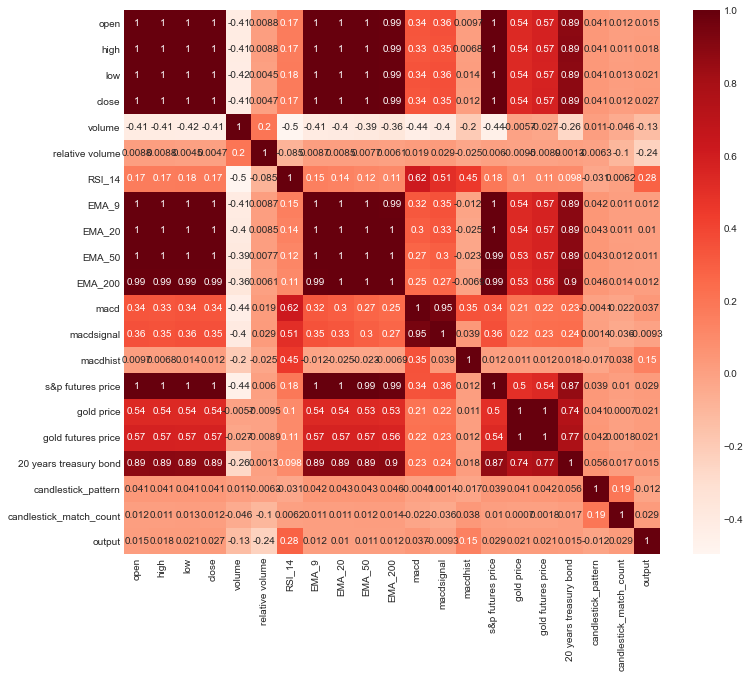

In [47]:
# Visualize the correlation map
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

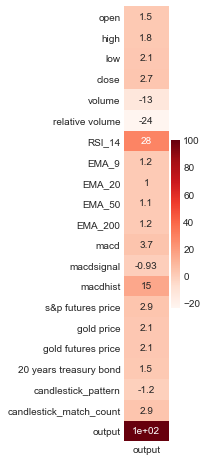

In [48]:
# Visualize the correlation map related to output only
plt.figure(figsize=(1,8))
sns.heatmap(df_scaled.corr()[["output"]]*100, annot=True, cmap=plt.cm.Reds)
plt.show()

In [186]:
# TODO: Drop columns that have near to zero correlation (i.e. less than 0.5)


In [187]:
# TODO: Drop columns that have high correlation


##### Wrapper Methods - Backward Elimination

In [89]:
X = df_scaled.drop(["next close", "output"], axis=1)
y = df_scaled["next close"]

In [90]:
# Initialize the model
model = Ridge()

# Fit the model
model.fit(X=X.to_numpy(), y=y.to_numpy())

# Get the p-values
model.coef_

array([ 5.00806525e-02,  1.67590455e-01,  2.33338061e-01,  3.20655825e-01,
       -2.23002433e-04, -5.27587317e-04,  2.38322212e-03,  7.14271444e-02,
        7.57083794e-02,  3.95722808e-02,  1.12456623e-02,  2.45493599e-03,
        1.16665092e-03,  4.36732237e-03,  2.57602743e-02, -3.19601115e-02,
        3.49787900e-02,  1.09352366e-03])

In [93]:
# Get the columns
cols = list(X.columns)

# Set the maximum p value
pmax = 1

# While length of column is bigger than zero
while(len(cols)>0):
    
    # Initialize a list for p values
    p = []
    
    #
    X_1 = X[cols]
    
    # Initialize the model
    model = Ridge()
    
    # Fit to the model
    model.fit(X=X_1, y=y)
    
    # Get the p-values inside a series
    p = pd.Series(model.coef_, index=cols)
    
    # Get the pmax
    pmax = max(p)
    
    # Get the features with pmax
    feature_with_p_max = p.idxmax()
    
    # If pmax is bigger than 0.05
    if (pmax>0.05):
        
        # Remove the feature from columns
        cols.remove(feature_with_p_max)
        
    # If pmax is less than 0.05
    else:
        
        # Break the loop
        break
        
# Set the selected features
selected_features = cols
print(selected_features)

['volume', 'RSI_14', 'macdhist']


In [94]:
# Backward Elimination - dropping columns which their pvalue is above 0.05
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

NameError: name 'sm' is not defined

##### Wrapper Methods - RFE (Recursive Feature Elimination)

In [95]:
# Rank the columns (1 being the most important one)
model = LinearRegression()
rfe = feature_selection.RFE(model, n_features_to_select=7)
X_rfe = rfe.fit_transform(X_scaled,y)  
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

NameError: name 'feature_selection' is not defined

In [ ]:
pd.DataFrame(rfe.ranking_, index=X.columns, columns=["Rank"])

In [96]:
# Get the optimal number of features
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

NameError: name 'RFE' is not defined

In [ ]:
# Feed the optial number of features as number of features to RFE and get the final set of features
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

##### Embedded Method

In [56]:
X = df_scaled.drop("next close", axis=1).to_numpy()
y = df_scaled["next close"].to_numpy()

In [63]:
n_sample = 1000
X_sample = X[:n_sample]
y_sample = y[:n_sample]

In [64]:
model_tree = GradientBoostingRegressor(n_estimators=100)
model_tree.fit(X_sample, y_sample)
model_tree.feature_importances_ 

array([2.85211588e-02, 3.36041542e-02, 9.15940862e-02, 6.20267104e-01,
       7.48716889e-04, 3.02954344e-04, 1.63878598e-04, 1.39864918e-01,
       1.36264128e-02, 9.59991793e-04, 2.80825231e-04, 5.00139823e-04,
       4.57652878e-04, 3.51275818e-04, 6.61210312e-02, 4.20700827e-04,
       9.07529625e-05, 1.46472343e-03, 6.59522458e-04])

In [65]:
model_ridge = Ridge()
model_ridge.fit(X_sample, y_sample)
model_ridge.coef_

array([ 0.08206152,  0.10354949,  0.10573465,  0.12021447, -0.00174636,
        0.00046484,  0.0029287 ,  0.09963497,  0.10035894,  0.09821065,
        0.07694535,  0.00503514,  0.00417873,  0.00357894,  0.16185937,
       -0.01033606,  0.01274268, -0.00484281,  0.03606733])

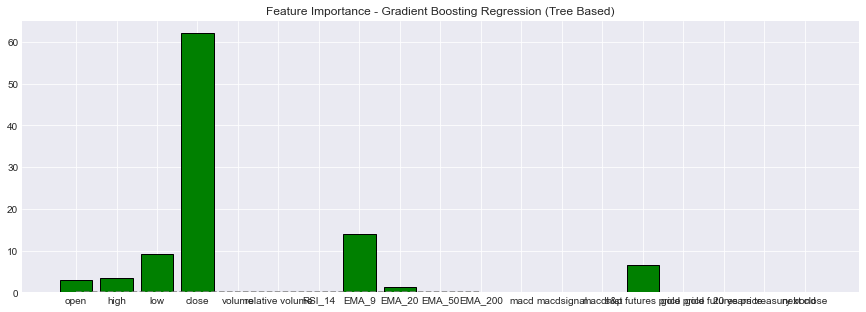

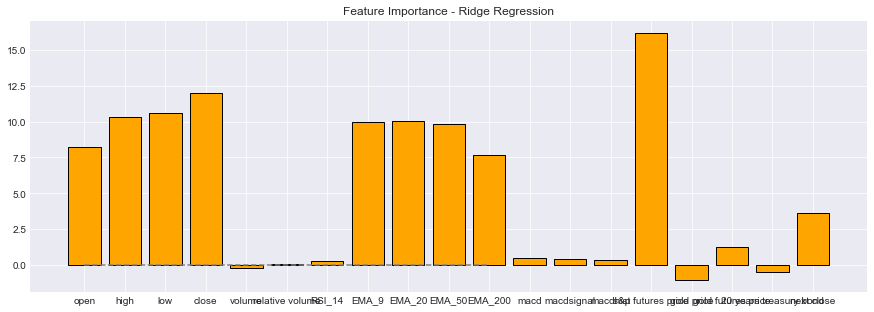

In [66]:
plt.figure(figsize=(15,5))
f1 = pd.DataFrame(model_tree.feature_importances_*100, index=list(df_scaled.drop("output", axis=1).columns.values))
plt.bar(x = list(f1.index),
        height = f1[0].values,
        color="green",
        edgecolor="black")
plt.hlines(0, 0, 10, linestyles="dashed", color="gray")
plt.title("Feature Importance - Gradient Boosting Regression (Tree Based)")
plt.show()

plt.figure(figsize=(15,5))
f2 = pd.DataFrame(model_ridge.coef_*100, index=list(df_scaled.drop("output", axis=1).columns.values))
plt.bar(x = list(f2.index),
        height = f2[0].values,
        color="orange",
        edgecolor="black")
plt.hlines(0, 0, 10, linestyles="dashed", color="gray")
plt.title("Feature Importance - Ridge Regression")
plt.show()

# Models

### Machine Learning

In [95]:
df_scaled

,open,high,low,close,volume,relative volume,RSI_14,EMA_9,EMA_20,EMA_50,EMA_200,macd,macdsignal,macdhist,s&p futures price,gold price,gold futures price,20 years treasury bond,candlestick_pattern,candlestick_match_count,output - regression,output - classification
0,-0.957,-0.961,-0.953,-0.955,-1.081,-1.282,1.464,-0.966,-0.981,-1.002,-1.029,0.355,0.264,0.344,-0.889,-1.952,-1.938,-1.396,-0.848,-0.882,-0.011,-1
1,-0.956,-0.962,-0.962,-0.967,-0.849,1.732,0.563,-0.966,-0.980,-1.001,-1.028,0.318,0.279,0.181,-0.906,-1.941,-1.927,-1.410,-0.848,-0.882,0.005,1
2,-0.969,-0.967,-0.963,-0.962,-1.022,-0.992,0.766,-0.965,-0.979,-0.999,-1.028,0.298,0.287,0.093,-0.898,-1.936,-1.922,-1.400,-0.848,-0.882,0.002,1
3,-0.962,-0.966,-0.960,-0.960,-0.976,0.153,0.831,-0.965,-0.977,-0.998,-1.027,0.281,0.290,0.030,-0.897,-1.942,-1.925,-1.398,-0.848,-0.882,0.002,1
4,-0.959,-0.963,-0.954,-0.958,-1.103,-0.949,0.934,-0.963,-0.975,-0.996,-1.026,0.269,0.289,-0.007,-0.893,-1.933,-1.921,-1.398,-0.848,-0.882,-0.001,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4110,2.926,2.951,2.933,2.972,-0.310,1.937,-0.674,3.022,3.047,3.028,2.835,0.309,1.017,-2.070,2.970,1.691,1.805,1.429,1.088,0.155,0.011,1
4111,2.985,3.018,3.010,3.026,-0.604,-0.882,-0.209,3.026,3.049,3.032,2.840,0.321,0.882,-1.625,3.026,1.713,1.807,1.467,-0.267,-0.364,-0.001,-1
4112,3.046,3.037,3.044,3.022,-0.619,-0.215,-0.248,3.029,3.051,3.035,2.846,0.311,0.772,-1.326,3.023,1.715,1.793,1.482,-0.848,-0.882,0.010,1
4113,3.051,3.062,3.076,3.073,-0.879,-1.048,0.170,3.041,3.057,3.041,2.852,0.457,0.715,-0.686,3.078,1.724,1.814,1.499,-0.848,-0.882,-0.002,-1


In [89]:
index_to_cut = int(df_scaled.shape[0]*0.90)

x_train = df_scaled.drop(["output - regression", "output - classification"], axis=1).to_numpy()[:index_to_cut]
y_train_regression = df_scaled["output - regression"].to_numpy()[:index_to_cut]
y_train_classification = df_scaled["output - classification"].to_numpy()[:index_to_cut]
print("Training set length: ", x_train.shape[0])

x_test = df_scaled.drop(["output - regression", "output - classification"], axis=1).to_numpy()[index_to_cut:]
y_test_regression = df_scaled["output - regression"].to_numpy()[index_to_cut:]
y_test_classification = df_scaled["output - classification"].to_numpy()[index_to_cut:]
print("Testing set length: ", x_test.shape[0])

Training set length:  3703
Testing set length:  412


In [90]:
print("Training From {} till {}.".format(str(df.loc[:index_to_cut, "date"].to_numpy()[0])[:10],
                                         str(df.loc[:index_to_cut, "date"].to_numpy()[-1])[:10]))

print("Testing From {} till {}.".format(str(df.loc[index_to_cut:, "date"].to_numpy()[0])[:10],
                                         str(df.loc[index_to_cut:, "date"].to_numpy()[-1])[:10]))

Training From 2004-11-18 till 2019-10-01.
Testing From 2019-10-01 till 2021-05-25.


In [91]:
# prepare a list of ml models
def get_models(models=dict()):
    
    # Linear models
    models['linear_regression'] = LinearRegression()
    models['lasso_regressor'] = Lasso()
    models['ridge_regressor'] = Ridge()
    models['elastic_net_regressor'] = ElasticNet()
    models['huber_regressor'] = HuberRegressor()
    models['lasso_lars_regressor'] = LassoLars()
    models['passive_aggressive_regressor'] = PassiveAggressiveRegressor( tol=1e-3)
    models['sgd_regressor'] = SGDRegressor(tol=1e-3)
    
    # Non-linear models
    models['knn_regressor'] = KNeighborsRegressor(n_neighbors=7)
    models['cart_decision_tree_regressor'] = DecisionTreeRegressor()
    models['extra_tree_regressor'] = ExtraTreeRegressor()
    models['support_vector_regressor'] = SVR()
    
    # Ensemble models
    n_trees = 100
    models['ada_boost_regressor'] = AdaBoostRegressor(n_estimators=n_trees)
    models['bagging_regressor'] = BaggingRegressor(n_estimators=n_trees)
    models['random_forest_regressor'] = RandomForestRegressor(n_estimators=n_trees)
    models['extra_tree_regressor_2'] = ExtraTreesRegressor(n_estimators=n_trees)
    models['gradient_boosting_regressor'] = GradientBoostingRegressor(n_estimators=n_trees)
    
    print('Defined %d models' % len(models))
    
    return models

In [92]:
models = get_models()
models

Defined 17 models


{'linear_regression': LinearRegression(),
 'lasso_regressor': Lasso(),
 'ridge_regressor': Ridge(),
 'elastic_net_regressor': ElasticNet(),
 'huber_regressor': HuberRegressor(),
 'lasso_lars_regressor': LassoLars(),
 'passive_aggressive_regressor': PassiveAggressiveRegressor(),
 'sgd_regressor': SGDRegressor(),
 'knn_regressor': KNeighborsRegressor(n_neighbors=7),
 'cart_decision_tree_regressor': DecisionTreeRegressor(),
 'extra_tree_regressor': ExtraTreeRegressor(),
 'support_vector_regressor': SVR(),
 'ada_boost_regressor': AdaBoostRegressor(n_estimators=100),
 'bagging_regressor': BaggingRegressor(n_estimators=100),
 'random_forest_regressor': RandomForestRegressor(),
 'extra_tree_regressor_2': ExtraTreesRegressor(),
 'gradient_boosting_regressor': GradientBoostingRegressor()}

In [45]:
# Loop over the keys of the dictionary
for i_key in models.keys():
    
    # Fit the model to the dataset
    models[i_key].fit(X=x_train, y=y_train_regression)
    
    # Make prediction
    preds = models[i_key].predict(x_test)
    
    # Calculate metrics
    mse = sklearn.metrics.mean_squared_error(np.array(y_test_regression), preds)
    accuracy = sklearn.metrics.accuracy_score(np.array(y_test_regression, "int"), np.array(np.round(preds), "int"))
    
    # Report
    print("====================================================")
    print("Model: ", i_key)
    print("Mean Square Error (MSE): {:.10f}".format(mse))
    print("Accuracy: %{:.2f}".format(accuracy*100))
    print("====================================================")

Model:  linear_regression
Mean Square Error (MSE): 0.0002812837
Accuracy: %100.00
Model:  lasso_regressor
Mean Square Error (MSE): 0.0002956181
Accuracy: %100.00
Model:  ridge_regressor
Mean Square Error (MSE): 0.0002932255
Accuracy: %100.00
Model:  elastic_net_regressor
Mean Square Error (MSE): 0.0002956181
Accuracy: %100.00
Model:  huber_regressor
Mean Square Error (MSE): 0.0002913585
Accuracy: %100.00
Model:  lasso_lars_regressor
Mean Square Error (MSE): 0.0002956181
Accuracy: %100.00
Model:  passive_aggressive_regressor
Mean Square Error (MSE): 0.0003611373
Accuracy: %100.00
Model:  sgd_regressor
Mean Square Error (MSE): 0.0003084218
Accuracy: %100.00
Model:  knn_regressor
Mean Square Error (MSE): 0.0003003425
Accuracy: %100.00
Model:  cart_decision_tree_regressor
Mean Square Error (MSE): 0.0006884853
Accuracy: %100.00
Model:  extra_tree_regressor
Mean Square Error (MSE): 0.0004476642
Accuracy: %100.00
Model:  support_vector_regressor
Mean Square Error (MSE): 0.0009991046
Accuracy:

In [93]:
# Loop over the keys of the dictionary
for i_key in models.keys():
    
    # Fit the model to the dataset
    models[i_key].fit(X=x_train, y=y_train_classification)
    
    # Make prediction
    preds = models[i_key].predict(x_test)
    
    # Calculate metrics
    mse = sklearn.metrics.mean_squared_error(np.array(y_test_classification), preds)
    accuracy = sklearn.metrics.accuracy_score(np.array(y_test_classification, "int"), np.array(np.round(preds), "int"))
    
    # Report
    print("====================================================")
    print("Model: ", i_key)
    print("Mean Square Error (MSE): {:.10f}".format(mse))
    print("Accuracy: %{:.2f}".format(accuracy*100))
    print("====================================================")

Model:  linear_regression
Mean Square Error (MSE): 1.0044453847
Accuracy: %1.70
Model:  lasso_regressor
Mean Square Error (MSE): 0.9747812942
Accuracy: %0.00
Model:  ridge_regressor
Mean Square Error (MSE): 0.9933130762
Accuracy: %1.46
Model:  elastic_net_regressor
Mean Square Error (MSE): 0.9747812942
Accuracy: %0.00
Model:  huber_regressor
Mean Square Error (MSE): 1.0028907158
Accuracy: %1.70
Model:  lasso_lars_regressor
Mean Square Error (MSE): 0.9747812942
Accuracy: %0.00
Model:  passive_aggressive_regressor
Mean Square Error (MSE): 18.9698659831
Accuracy: %1.46
Model:  sgd_regressor
Mean Square Error (MSE): 1.0268210342
Accuracy: %0.24
Model:  knn_regressor
Mean Square Error (MSE): 1.1301763424
Accuracy: %8.50
Model:  cart_decision_tree_regressor
Mean Square Error (MSE): 1.9417475728
Accuracy: %51.46
Model:  extra_tree_regressor
Mean Square Error (MSE): 2.1844660194
Accuracy: %45.39
Model:  support_vector_regressor
Mean Square Error (MSE): 1.0362994652
Accuracy: %6.07
Model:  ada_

In [53]:
# Fit the model to the dataset
models["lasso_regressor"].fit(X=x_train, y=y_train)

# Make prediction
preds = models["lasso_regressor"].predict(x_test)

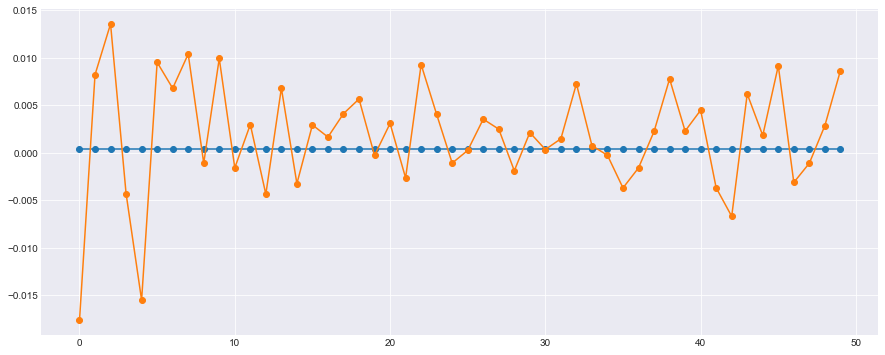

In [54]:
plt.figure(figsize=(15, 6))
plt.plot(preds[:50], "o-")
plt.plot(y_test[:50], "o-")

In [55]:
thumps_up_counter = 0
thumps_down_counter = 0

for i in range(1, len(x_test)):
    
    prediction_ = preds[i]*100
    true_output_ = y_test[i]*100
    
    true_trend = y_test[i]*100 - y_test[i-1]*100
    pred_trend = preds[i]*100 - preds[i-1]*100
    
    print("===================================================")
    print(f"PREDICTION #{i}")
    print("Prediction: {:.2f}%, True Output: {:.2f}%, Difference: {:.2f}".format(prediction_, true_output_, abs(prediction_-true_output_)))

    if ((true_trend>=0) & (pred_trend>=0)) | ((true_trend<0) & (pred_trend<0)):
        print("Correct trend 👍")
        thumps_up_counter+= 1
    else:
        print("Incorrectly trend 👎")
        thumps_down_counter+= 1
    print("===================================================")
    
print(f"Correctly predicted the trend for {thumps_up_counter} times (i.e {round(thumps_up_counter/(thumps_up_counter+thumps_down_counter), 2)*100}%) 👍")
print(f"Incorrect predicted the trend for {thumps_down_counter} times (i.e {round(thumps_down_counter/(thumps_up_counter+thumps_down_counter), 2)*100}%) 👎")

PREDICTION #310
Prediction: 0.04%, True Output: 0.14%, Difference: 0.10
Correct trend 👍
PREDICTION #311
Prediction: 0.04%, True Output: 0.51%, Difference: 0.47
Correct trend 👍
PREDICTION #312
Prediction: 0.04%, True Output: -1.36%, Difference: 1.40
Incorrectly trend 👎
PREDICTION #313
Prediction: 0.04%, True Output: 0.69%, Difference: 0.65
Correct trend 👍
PREDICTION #314
Prediction: 0.04%, True Output: 0.60%, Difference: 0.56
Incorrectly trend 👎
PREDICTION #315
Prediction: 0.04%, True Output: 1.49%, Difference: 1.45
Correct trend 👍
PREDICTION #316
Prediction: 0.04%, True Output: 0.57%, Difference: 0.53
Incorrectly trend 👎
PREDICTION #317
Prediction: 0.04%, True Output: -0.67%, Difference: 0.71
Incorrectly trend 👎
PREDICTION #318
Prediction: 0.04%, True Output: 0.02%, Difference: 0.02
Correct trend 👍
PREDICTION #319
Prediction: 0.04%, True Output: 0.27%, Difference: 0.23
Correct trend 👍
PREDICTION #320
Prediction: 0.04%, True Output: -0.35%, Difference: 0.39
Incorrectly trend 👎
PREDICTIO

In [ ]:
report = pd.DataFrame(columns=["date", "start capital", "end capital", "profit/loss", "return rate", "long or short",
                               "open price (daily)", "close price (daily)", "number of shares"])

capital = 10000
long_or_short = None
num_shares = 0

for index, i_row in df_scaled.iloc[index_to_cut:].iterrows():

    try:

        prev_capital = capital
        
        input_ = i_row[:-1].to_numpy().reshape(1, -1)
        output = i_row[-1:].values
        
        pred = models["extra_tree_regressor"].predict(input_)[0]
        
        # Buy if we predict tomorrow the price will go up
        if pred > 0:
            
            buy_price = df.loc[index+1, "open"]    
            sell_price = df.loc[index+1, "close"]
            
            num_shares = int(capital/buy_price)
            
            profit_or_loss = (sell_price-buy_price)*num_shares
            
            capital += profit_or_loss
            
            long_or_short = "long"
        
        # Short if we predict tomorrow the price will go down
        elif pred < 0:
            
            short_price = df.loc[index+1, "open"]
            buy_back_price = df.loc[index+1, "close"]
        
            num_shares = int(capital/short_price)
            
            profit_or_loss = (short_price-buy_back_price)*num_shares
            
            capital += profit_or_loss
            
            long_or_short = "short"
            
        return_rate = (capital-prev_capital)/prev_capital
            
        report = report.append({"date": df.loc[index+1, "date"], 
                                "start capital": prev_capital, 
                                "end capital": capital,
                                "profit/loss": profit_or_loss,
                                "return rate": return_rate*100,
                                "long or short": long_or_short,
                                "open price (daily)": df.loc[index, "open"], 
                                "close price (daily)": df.loc[index, "close"],
                                "number of shares": num_shares}, ignore_index=True)

    except:
        print("dough!")
        pass

In [63]:
report

,date,start capital,end capital,profit/loss,return rate,long or short,open price (daily),close price (daily),number of shares
0,2019-10-02,10000,"9,882.769",-117.231,-1.172,long,289.902,285.521,35
1,2019-10-03,"9,882.769","9,971.715",88.946,0.900,long,283.826,280.477,35
2,2019-10-04,"9,971.715","9,862.323",-109.392,-1.097,short,280.234,282.775,35
3,2019-10-07,"9,862.323","9,849.412",-12.911,-0.131,long,283.476,286.601,34
4,2019-10-08,"9,849.412","9,766.318",-83.094,-0.844,long,285.745,285.365,34
...,...,...,...,...,...,...,...,...,...
406,2021-05-19,"14,663.854","14,522.015",-141.839,-0.967,short,415.800,411.940,36
407,2021-05-20,"14,522.015","14,400.215",-121.800,-0.839,short,406.920,410.860,35
408,2021-05-21,"14,400.215","14,465.835",65.620,0.456,short,411.800,415.280,34
409,2021-05-24,"14,465.835","14,403.614",-62.221,-0.430,short,416.870,414.940,34


### DL

In [97]:
df_scaled

,open,high,low,close,volume,relative volume,RSI_14,EMA_9,EMA_20,EMA_50,EMA_200,macd,macdsignal,macdhist,s&p futures price,gold price,gold futures price,20 years treasury bond,candlestick_pattern,candlestick_match_count,output - regression,output - classification
0,-0.957,-0.961,-0.953,-0.955,-1.081,-1.282,1.464,-0.966,-0.981,-1.002,-1.029,0.355,0.264,0.344,-0.889,-1.952,-1.938,-1.396,-0.848,-0.882,-0.011,-1
1,-0.956,-0.962,-0.962,-0.967,-0.849,1.732,0.563,-0.966,-0.980,-1.001,-1.028,0.318,0.279,0.181,-0.906,-1.941,-1.927,-1.410,-0.848,-0.882,0.005,1
2,-0.969,-0.967,-0.963,-0.962,-1.022,-0.992,0.766,-0.965,-0.979,-0.999,-1.028,0.298,0.287,0.093,-0.898,-1.936,-1.922,-1.400,-0.848,-0.882,0.002,1
3,-0.962,-0.966,-0.960,-0.960,-0.976,0.153,0.831,-0.965,-0.977,-0.998,-1.027,0.281,0.290,0.030,-0.897,-1.942,-1.925,-1.398,-0.848,-0.882,0.002,1
4,-0.959,-0.963,-0.954,-0.958,-1.103,-0.949,0.934,-0.963,-0.975,-0.996,-1.026,0.269,0.289,-0.007,-0.893,-1.933,-1.921,-1.398,-0.848,-0.882,-0.001,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4110,2.926,2.951,2.933,2.972,-0.310,1.937,-0.674,3.022,3.047,3.028,2.835,0.309,1.017,-2.070,2.970,1.691,1.805,1.429,1.088,0.155,0.011,1
4111,2.985,3.018,3.010,3.026,-0.604,-0.882,-0.209,3.026,3.049,3.032,2.840,0.321,0.882,-1.625,3.026,1.713,1.807,1.467,-0.267,-0.364,-0.001,-1
4112,3.046,3.037,3.044,3.022,-0.619,-0.215,-0.248,3.029,3.051,3.035,2.846,0.311,0.772,-1.326,3.023,1.715,1.793,1.482,-0.848,-0.882,0.010,1
4113,3.051,3.062,3.076,3.073,-0.879,-1.048,0.170,3.041,3.057,3.041,2.852,0.457,0.715,-0.686,3.078,1.724,1.814,1.499,-0.848,-0.882,-0.002,-1


In [113]:
index_to_cut = int(df_scaled.shape[0]*0.90)

x_train = df_scaled.drop(["output - regression", "output - classification"], axis=1).to_numpy()[:index_to_cut]
y_train = df_scaled["output - classification"].to_numpy()[:index_to_cut]
print("Training set length: ", x_train.shape[0])

x_test = df_scaled.drop(["output - regression", "output - classification"], axis=1).to_numpy()[index_to_cut:]
y_test = df_scaled["output - classification"].to_numpy()[index_to_cut:]
print("Testing set length: ", x_test.shape[0])

Training set length:  3703
Testing set length:  412


In [114]:
# Reshape the data for model
x_train = x_train.reshape(-1, x_train.shape[1], 1)
y_train = y_train

x_test = x_test.reshape(-1, x_train.shape[1], 1)
y_test = y_test

In [131]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(32, input_shape=(x_train.shape[1],1), return_sequences=True))
model.add(keras.layers.LSTM(128, return_sequences=True))
model.add(keras.layers.LSTM(256, return_sequences=False))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 20, 32)            4352      
_________________________________________________________________
lstm_13 (LSTM)               (None, 20, 128)           82432     
_________________________________________________________________
lstm_14 (LSTM)               (None, 256)               394240    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [132]:
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"],)

In [133]:
model.fit(x=x_train, 
          y=y_train, 
          batch_size=128, 
          epochs=30, 
          validation_data = (x_test, y_test))

Epoch 1/30
29/29 [==============================] - 9s 105ms/step - loss: 0.4558 - accuracy: 0.0086 - val_loss: 0.5301 - val_accuracy: 0.0000e+00
Epoch 2/30
29/29 [==============================] - 2s 67ms/step - loss: 0.3694 - accuracy: 0.0000e+00 - val_loss: 0.4824 - val_accuracy: 0.0000e+00
Epoch 3/30
29/29 [==============================] - 2s 67ms/step - loss: 0.3935 - accuracy: 0.0000e+00 - val_loss: 0.5066 - val_accuracy: 0.0000e+00
Epoch 4/30
29/29 [==============================] - 2s 69ms/step - loss: 0.3606 - accuracy: 0.0000e+00 - val_loss: 0.5884 - val_accuracy: 0.0000e+00
Epoch 5/30
29/29 [==============================] - 2s 67ms/step - loss: 0.3439 - accuracy: 0.0000e+00 - val_loss: 0.4639 - val_accuracy: 0.0000e+00
Epoch 6/30
29/29 [==============================] - 2s 67ms/step - loss: 0.3382 - accuracy: 0.0000e+00 - val_loss: 0.5274 - val_accuracy: 0.0000e+00
Epoch 7/30
29/29 [==============================] - 2s 69ms/step - loss: 0.3463 - accuracy: 0.0000e+00 - val_

In [ ]:
preds = model.predict(x_test).flatten()

plt.figure(figsize=(15, 6))

start_index = 0
total_index_view = 50

plt.plot(preds[start_index:total_index_view], "o-")
plt.plot(y_test_regression[start_index:total_index_view], "o-")

In [111]:
thumps_up_counter = 0
thumps_down_counter = 0

for i in range(1, len(x_test)):
    
    prediction_ = preds[i]*100
    true_output_ = y_test_regression[i]*100
    
    true_trend = y_test_regression[i]*100 - y_test_regression[i-1]*100
    pred_trend = preds[i]*100 - preds[i-1]*100
    
    print("===================================================")
    print(f"PREDICTION #{i}")
    print("Prediction: {:.2f}%, True Output: {:.2f}%, Difference: {:.2f}".format(prediction_, true_output_, abs(prediction_-true_output_)))

    if ((true_trend>=0) & (pred_trend>=0)) | ((true_trend<0) & (pred_trend<0)):
        print("Correct trend 👍")
        thumps_up_counter+= 1
    else:
        print("Incorrectly trend 👎")
        thumps_down_counter+= 1
    print("===================================================")
    
print(f"Correctly predicted the trend for {thumps_up_counter} times (i.e {round(thumps_up_counter/(thumps_up_counter+thumps_down_counter), 2)*100}%) 👍")
print(f"Incorrect predicted the trend for {thumps_down_counter} times (i.e {round(thumps_down_counter/(thumps_up_counter+thumps_down_counter), 2)*100}%) 👎")

%, True Output: 0.14%, Difference: 0.13
Incorrectly trend 👎
PREDICTION #311
Prediction: 0.02%, True Output: 0.51%, Difference: 0.49
Incorrectly trend 👎
PREDICTION #312
Prediction: 0.02%, True Output: -1.36%, Difference: 1.38
Incorrectly trend 👎
PREDICTION #313
Prediction: 0.02%, True Output: 0.69%, Difference: 0.67
Incorrectly trend 👎
PREDICTION #314
Prediction: 0.02%, True Output: 0.60%, Difference: 0.58
Incorrectly trend 👎
PREDICTION #315
Prediction: 0.02%, True Output: 1.49%, Difference: 1.47
Incorrectly trend 👎
PREDICTION #316
Prediction: 0.02%, True Output: 0.57%, Difference: 0.55
Incorrectly trend 👎
PREDICTION #317
Prediction: 0.02%, True Output: -0.67%, Difference: 0.69
Incorrectly trend 👎
PREDICTION #318
Prediction: 0.02%, True Output: 0.02%, Difference: 0.00
Incorrectly trend 👎
PREDICTION #319
Prediction: 0.02%, True Output: 0.27%, Difference: 0.25
Incorrectly trend 👎
PREDICTION #320
Prediction: 0.02%, True Output: -0.35%, Difference: 0.37
Incorrectly trend 👎
PREDICTION #321
P

In [136]:
prediction_/100

0.12279942631721497

In [138]:
preds

array([0.13334084, 0.13569832, 0.1400685 , 0.13756552, 0.13685015,
       0.13818455, 0.13999748, 0.1396713 , 0.13246265, 0.13618469,
       0.13362417, 0.13174877, 0.13114181, 0.13140476, 0.13233262,
       0.13039955, 0.1295864 , 0.12940338, 0.12907785, 0.12780282,
       0.1276114 , 0.12876979, 0.12584579, 0.12718686, 0.12790957,
       0.12836665, 0.12672916, 0.12680724, 0.12716809, 0.12785128,
       0.12591606, 0.127801  , 0.12750483, 0.12669674, 0.12760699,
       0.12600449, 0.12679633, 0.12903458, 0.12695664, 0.12722373,
       0.12825921, 0.12680021, 0.12576962, 0.1282483 , 0.13131592,
       0.12967494, 0.1297693 , 0.12800011, 0.12767926, 0.13004342,
       0.12806538, 0.12776244, 0.1262089 , 0.12790093, 0.12704918,
       0.12567806, 0.12419233, 0.12711984, 0.12285265, 0.12465245,
       0.12552392, 0.12436908, 0.12550947, 0.12564707, 0.12603098,
       0.12596866, 0.12584788, 0.1255844 , 0.12551254, 0.12584326,
       0.12473175, 0.12475619, 0.12408012, 0.12432697, 0.12337

In [137]:
y_test_classification

array([-1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,
        1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,
        1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,
        1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,
       -1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
       -1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1

In [134]:
thumps_up_counter = 0
thumps_down_counter = 0

for i in range(1, len(x_test)):
    
    prediction_ = preds[i]*100
    true_output_ = y_test_classification[i]*100
    
    #true_trend = y_test_regression[i]*100 - y_test_regression[i-1]*100
    #pred_trend = preds[i]*100 - preds[i-1]*100
    
    print("===================================================")
    print(f"PREDICTION #{i}")
    print("Prediction: {:.2f}%, True Output: {:.2f}%, Difference: {:.2f}".format(prediction_, true_output_, abs(prediction_-true_output_)))

    if ((true_trend>=0) & (prediction_>=0)) | ((true_trend<0) & (pred_trend<0)):
        print("Correct trend 👍")
        thumps_up_counter+= 1
    else:
        print("Incorrectly trend 👎")
        thumps_down_counter+= 1
    print("===================================================")
    
print(f"Correctly predicted the trend for {thumps_up_counter} times (i.e {round(thumps_up_counter/(thumps_up_counter+thumps_down_counter), 2)*100}%) 👍")
print(f"Incorrect predicted the trend for {thumps_down_counter} times (i.e {round(thumps_down_counter/(thumps_up_counter+thumps_down_counter), 2)*100}%) 👎")

PREDICTION #311
Prediction: 12.08%, True Output: 0.51%, Difference: 11.57
Incorrectly trend 👎
PREDICTION #312
Prediction: 12.08%, True Output: -1.36%, Difference: 13.44
Correct trend 👍
PREDICTION #313
Prediction: 12.16%, True Output: 0.69%, Difference: 11.47
Correct trend 👍
PREDICTION #314
Prediction: 12.26%, True Output: 0.60%, Difference: 11.66
Incorrectly trend 👎
PREDICTION #315
Prediction: 12.19%, True Output: 1.49%, Difference: 10.70
Incorrectly trend 👎
PREDICTION #316
Prediction: 12.16%, True Output: 0.57%, Difference: 11.59
Correct trend 👍
PREDICTION #317
Prediction: 12.04%, True Output: -0.67%, Difference: 12.72
Correct trend 👍
PREDICTION #318
Prediction: 12.02%, True Output: 0.02%, Difference: 12.00
Incorrectly trend 👎
PREDICTION #319
Prediction: 12.07%, True Output: 0.27%, Difference: 11.80
Correct trend 👍
PREDICTION #320
Prediction: 12.07%, True Output: -0.35%, Difference: 12.42
Incorrectly trend 👎
PREDICTION #321
Prediction: 12.14%, True Output: -0.73%, Difference: 12.87
In

In [224]:
capital = 10000

preds=[0]

for index, i_row in df_scaled.iloc[index_to_cut:].iterrows():

    input_ = i_row[:-1].to_numpy().reshape(-1, x_train.shape[1], 1)
    output = i_row[-1:].values
    
    preds.append(model.predict(input_)[0][0])
    
    # Buy if we predict tomorrow the price will go up
    
    # Short if we predict tomorrow the price will go down
    

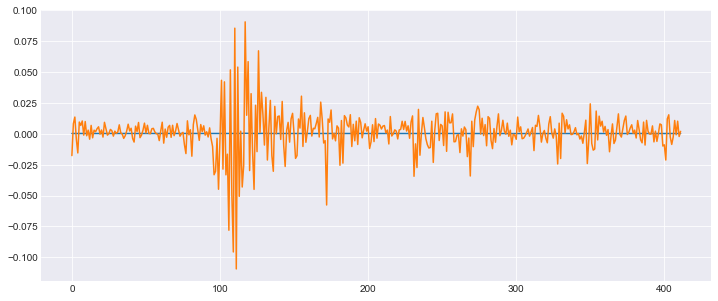

In [112]:
plt.figure(figsize=(12, 5))
plt.plot(preds)
plt.plot(y_test)